In [ ]:
import os
import pandas as pd

data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
filenames = os.listdir(data_dir)
data = {}
for name in filenames:
    if '.csv' in name and name.startswith('USD') and not name.startswith('USDT_ZEC'):
        filepath = os.path.join(data_dir, name)
        df = pd.read_csv(filepath)
        symbol = name.split('.')[0]
        data[symbol] = df
        
shapes =  []
for key in data.keys():
    shapes.append(data[key].shape + (key,))
shapes = sorted(shapes, key=lambda x: x[0], reverse=True)
symbols = [x[2] for x in shapes]

In [ ]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf


training_start = '2015-09-01 00:00:00'
training_end = '2017-09-01 00:00:00'
test_start = '2017-08-01 00:00:00'
env = TradeEnv(data, start=training_start, end=training_end,
               commission_rate=2.5e-3, price_keys=['open', 'high', 'low'])

conf = dict(
    action_spec={"type": "float", "shape": env.action_dim},
    # state_spec={"type": "float", "shape": (env.num_stocks, env.feature_dim)}
    state_spec={"type": "float", "shape": (env.num_stocks, 3)}
)

default_config = eiie_config()
conf.update(default_config)

fit_config = dict(
    start=training_start,
    end=training_end,
    num_epochs=int(2e6),
    # num_epochs=1,
    log_freq=1000,
    # log_freq = 1
    test_freq=100000,
    test_start=test_start
)

lr_spec={"lr_init": 3.0e-4, "lr_decay_step": 5 * 1000,
                 "lr_decay": 0.96, "lr_min": 3.0e-4}
# conf['lr_spec'] = lr_spec
conf['beta'] = 0.01

load_file_path = 'params/model.ckpt'
load_file_path = None
save_file_path = 'new_params/model.ckpt'
save_file_path = None

tf.reset_default_graph()
eiie = EIIE(env=env, load_file_path=load_file_path, **conf)
eiie.fit(**fit_config, save_file_path=save_file_path)

/home/tomoaki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Building tensorflow graph...


545it [00:00, 5449.03it/s]

Finished building tensorflow graph, spent time: 0.24922490119934082
Model saved in file: params/model.ckpt


35084it [00:05, 5882.96it/s]
  0%|          | 0/2000000 [00:00<?, ?it/s]
0it [00:00, ?it/s]
52it [00:00, 480.75it/s]

Finished storing data.
********action
[ 0.06943449  0.0813813   0.08414917  0.08688997  0.08215595  0.08255169
  0.08653779  0.08577333  0.08555687  0.08540353  0.08433335  0.08583254]
********action
[ 0.06943484  0.08599781  0.08522081  0.08699281  0.08292013  0.08362196
  0.08258299  0.0860245   0.08369819  0.08341156  0.08525319  0.08484111]



67it [00:00, 192.19it/s]
80it [00:00, 136.91it/s]
92it [00:00, 114.30it/s]
103it [00:00, 102.34it/s]
113it [00:00, 95.56it/s] 
123it [00:00, 91.43it/s]
132it [00:01, 83.56it/s]
141it [00:01, 83.01it/s]
150it [00:01, 83.06it/s]
159it [00:01, 82.27it/s]
168it [00:01, 81.80it/s]
177it [00:01, 81.86it/s]
186it [00:01, 80.85it/s]
195it [00:01, 81.10it/s]
204it [00:01, 81.08it/s]
213it [00:02, 78.80it/s]
222it [00:02, 79.69it/s]
231it [00:02, 80.20it/s]
240it [00:02, 80.73it/s]
249it [00:02, 80.90it/s]
258it [00:02, 81.21it/s]
267it [00:02, 81.54it/s]
276it [00:02, 81.41it/s]
285it [00:02, 80.93it/s]
294it [00:03, 77.81it/s]
303it [00:03, 79.26it/s]
312it [00:03, 80.34it/s]
321it [00:03, 80.85it/s]
330it [00:03, 80.89it/s]
339it [00:03, 81.20it/s]
348it [00:03, 81.43it/s]
357it [00:03, 81.25it/s]
366it [00:04, 81.55it/s]
375it [00:04, 77.99it/s]
384it [00:04, 79.06it/s]
392it [00:04, 79.01it/s]
401it [00:04, 79.02it/s]
410it [00:04, 80.07it/s]
419it [00:04, 80.82it/s]
428it [00:04, 81.31it/

********action
[ 0.06884168  0.08420268  0.08595962  0.08548281  0.08453386  0.08367003
  0.08475022  0.08469428  0.083592    0.08398732  0.08587515  0.08441035]



1069it [00:12, 80.17it/s]
1078it [00:12, 80.80it/s]
1087it [00:13, 81.42it/s]
1096it [00:13, 78.19it/s]
1104it [00:13, 76.81it/s]
1113it [00:13, 78.56it/s]
1122it [00:13, 79.87it/s]
1131it [00:13, 80.58it/s]
1140it [00:13, 81.30it/s]
1149it [00:13, 81.77it/s]
1158it [00:13, 82.16it/s]
1167it [00:14, 82.69it/s]
1176it [00:14, 79.18it/s]
1185it [00:14, 79.76it/s]
1194it [00:14, 80.18it/s]
1203it [00:14, 80.70it/s]
1212it [00:14, 81.70it/s]
1221it [00:14, 81.82it/s]
1230it [00:14, 81.84it/s]
1239it [00:14, 82.22it/s]
1248it [00:15, 82.20it/s]
1257it [00:15, 79.42it/s]
1266it [00:15, 80.32it/s]
1275it [00:15, 81.23it/s]
1284it [00:15, 80.78it/s]
1293it [00:15, 80.80it/s]
1302it [00:15, 80.94it/s]
1311it [00:15, 81.38it/s]
1320it [00:15, 81.71it/s]
1329it [00:16, 81.27it/s]
1338it [00:16, 77.61it/s]
1347it [00:16, 78.58it/s]
1356it [00:16, 79.76it/s]
1365it [00:16, 80.39it/s]
1374it [00:16, 80.50it/s]
1383it [00:16, 79.71it/s]
1392it [00:16, 80.35it/s]
1401it [00:16, 80.99it/s]
1410it [00:

********action
[ 0.06867669  0.08469719  0.0852597   0.08327883  0.08472762  0.08481446
  0.08469559  0.08450358  0.08478298  0.08492242  0.08516338  0.08447758]


  0%|          | 1576/2000000 [00:36<6:23:27, 86.86it/s]

********action
[ 0.06811589  0.0849997   0.08393267  0.08402441  0.08504799  0.08509224
  0.08507065  0.08435676  0.08454365  0.08454739  0.0856287   0.08463995]


  0%|          | 2576/2000000 [00:48<6:29:08, 85.55it/s]

********action
[ 0.0680934   0.08483197  0.08518206  0.08570273  0.08454629  0.08434723
  0.08399034  0.08495452  0.08433004  0.08453587  0.0847004   0.08478513]


  0%|          | 3577/2000000 [00:59<6:23:38, 86.73it/s]

********action
[ 0.06788795  0.08510825  0.08425257  0.08522084  0.08542858  0.08491037
  0.08447415  0.08493321  0.08462136  0.08366577  0.08452111  0.08497587]


  0%|          | 4569/2000000 [01:11<6:19:17, 87.68it/s]

********action
[ 0.06729861  0.08473864  0.08470358  0.08580852  0.08460306  0.0840383
  0.08499888  0.08496576  0.08387561  0.08460048  0.08543086  0.0849377 ]


  0%|          | 5577/2000000 [01:22<6:19:14, 87.65it/s]

********action
[ 0.06752104  0.0853802   0.08293884  0.0855055   0.0853448   0.08562043
  0.0846123   0.08578305  0.08533724  0.08568     0.08331593  0.08296071]


  0%|          | 6576/2000000 [01:34<6:18:10, 87.85it/s]

********action
[ 0.0667944   0.08542894  0.08498234  0.08555119  0.08423436  0.08504399
  0.08390072  0.08468916  0.08508684  0.08309897  0.08592999  0.08525909]


  0%|          | 7576/2000000 [01:45<6:35:55, 83.87it/s]

********action
[ 0.06648535  0.08531244  0.08489025  0.08518694  0.08423014  0.08495037
  0.0836886   0.08517721  0.08509438  0.08228263  0.08761904  0.08508268]


  0%|          | 8575/2000000 [01:57<6:29:16, 85.26it/s]

********action
[ 0.0656039   0.08468183  0.08426028  0.08476882  0.08452602  0.08525788
  0.08543906  0.08471203  0.08457848  0.08478393  0.08645893  0.0849288 ]


  0%|          | 9575/2000000 [02:09<6:43:37, 82.19it/s]

********action
[ 0.06561045  0.08524465  0.08424351  0.08524495  0.08432429  0.0850567
  0.08457358  0.08461489  0.08484361  0.08480837  0.08640027  0.08503462]


  1%|          | 10574/2000000 [02:20<6:28:13, 85.41it/s]

********action
[ 0.06537862  0.08530599  0.08533956  0.08477341  0.08520453  0.08536444
  0.08413322  0.08527692  0.08477036  0.08435964  0.08547214  0.08462127]


  1%|          | 11573/2000000 [02:32<6:26:16, 85.79it/s]

********action
[ 0.0653801   0.08569312  0.07736595  0.08746868  0.08621867  0.08589555
  0.08539248  0.08577057  0.08403622  0.08610427  0.08496582  0.08570854]


  1%|          | 12572/2000000 [02:43<6:17:59, 87.63it/s]

********action
[ 0.0644297   0.08484568  0.08627041  0.08569057  0.08504568  0.08365249
  0.0854163   0.08585893  0.08367264  0.08457515  0.08568195  0.08486047]


  1%|          | 13572/2000000 [02:55<6:21:51, 86.70it/s]

********action
[ 0.06423859  0.08484763  0.08589826  0.08570094  0.08475141  0.08512197
  0.08481434  0.08518822  0.08416505  0.0849663   0.08486839  0.08543888]


  1%|          | 14572/2000000 [03:06<6:17:12, 87.73it/s]

********action
[ 0.06386291  0.08528884  0.08337096  0.08540915  0.08562634  0.08417001
  0.08631366  0.08625551  0.08452827  0.08924581  0.08208188  0.08384667]


  1%|          | 15572/2000000 [03:18<6:24:18, 86.06it/s]

********action
[ 0.06352891  0.08528756  0.08573238  0.08483184  0.08537754  0.08517767
  0.08463963  0.08539271  0.08420194  0.08512633  0.0859111   0.08479238]


  1%|          | 16573/2000000 [03:29<6:16:51, 87.72it/s]

********action
[ 0.06313159  0.08545143  0.08385643  0.08593108  0.08400425  0.08527746
  0.08485469  0.08478037  0.08504752  0.08525445  0.08683194  0.08557875]


  1%|          | 17572/2000000 [03:41<6:27:15, 85.32it/s]

********action
[ 0.06341014  0.08569305  0.08505012  0.08622839  0.08560888  0.08535419
  0.08477707  0.08530729  0.08529877  0.08394046  0.08385935  0.08547226]


  1%|          | 18571/2000000 [03:53<6:16:31, 87.71it/s]

********action
[ 0.06253321  0.08532438  0.08519401  0.08704703  0.0847937   0.08466913
  0.08551718  0.0853719   0.08437946  0.08441029  0.08540507  0.08535468]


  1%|          | 19571/2000000 [04:04<6:36:44, 83.20it/s]

********action
[ 0.06269917  0.08585803  0.08460955  0.08511586  0.0844815   0.08575081
  0.08486529  0.08523112  0.08567069  0.08523989  0.0848818   0.08559629]


  1%|          | 20571/2000000 [04:16<6:23:54, 85.93it/s]

********action
[ 0.0619233   0.0850249   0.08643745  0.0857814   0.08498539  0.08437838
  0.08549917  0.08596888  0.08387837  0.08429629  0.08668493  0.08514154]


  1%|          | 21570/2000000 [04:27<6:17:37, 87.32it/s]

********action
[ 0.0617834   0.08572529  0.08495989  0.08574825  0.08595558  0.08532063
  0.08507404  0.08524141  0.08489307  0.08367974  0.08615416  0.08546464]


  1%|          | 22570/2000000 [04:39<6:48:03, 80.76it/s]

********action
[ 0.06188419  0.08610731  0.08449996  0.08450041  0.08506731  0.08613854
  0.08523401  0.08527146  0.08601293  0.08508878  0.08483234  0.08536281]


  1%|          | 23574/2000000 [04:51<6:30:46, 84.29it/s]

********action
[ 0.06120447  0.08432595  0.08516994  0.08532772  0.08227903  0.08560074
  0.0866772   0.08345105  0.08529051  0.08562817  0.08699879  0.08804647]


  1%|          | 24574/2000000 [05:03<6:24:33, 85.62it/s]

********action
[ 0.06094055  0.08592836  0.08567644  0.08642267  0.08517001  0.08554764
  0.08426917  0.08557129  0.08576437  0.08180378  0.08635601  0.08654969]


  1%|▏         | 25574/2000000 [05:14<6:18:35, 86.92it/s]

********action
[ 0.06089968  0.08614118  0.08452991  0.0844639   0.08490557  0.08630454
  0.08544709  0.08542664  0.0858563   0.08481205  0.08546419  0.08574896]


  1%|▏         | 26574/2000000 [05:26<6:28:37, 84.63it/s]

********action
[ 0.06029779  0.08589549  0.08569707  0.08486883  0.08576496  0.08584069
  0.08441621  0.08590838  0.08481283  0.08496448  0.08618615  0.08534706]


  1%|▏         | 27573/2000000 [05:37<6:14:07, 87.87it/s]

********action
[ 0.05960611  0.08509843  0.08660378  0.0880482   0.08479635  0.0838451
  0.0857556   0.08623491  0.08388253  0.08487301  0.08684181  0.08441424]


  1%|▏         | 28573/2000000 [05:49<6:30:56, 84.05it/s]

********action
[ 0.05930372  0.08512038  0.08664759  0.08810908  0.08481266  0.08385341
  0.08578813  0.086269    0.08388988  0.08489275  0.08688367  0.08442971]


  1%|▏         | 29572/2000000 [06:00<6:16:32, 87.22it/s]

********action
[ 0.05899861  0.08406786  0.08643887  0.0845153   0.08241524  0.08565126
  0.08880574  0.08386585  0.08542236  0.08970335  0.08448341  0.08563221]


  2%|▏         | 30571/2000000 [06:12<6:30:27, 84.06it/s]

********action
[ 0.05876341  0.08538645  0.08606394  0.08744171  0.08493562  0.08406356
  0.08628821  0.08593097  0.08418488  0.08479269  0.08689964  0.0852489 ]


  2%|▏         | 31572/2000000 [06:23<6:17:16, 86.96it/s]

********action
[ 0.05882039  0.08647151  0.08556061  0.08421953  0.08606534  0.08641999
  0.08485068  0.08558323  0.08562716  0.08497062  0.08531761  0.08609324]


  2%|▏         | 32571/2000000 [06:35<6:14:17, 87.61it/s]

********action
[ 0.05806249  0.08521022  0.08682824  0.08836071  0.08487918  0.08388668
  0.08592179  0.08640919  0.08391917  0.08497351  0.08705622  0.08449269]


  2%|▏         | 33570/2000000 [06:46<6:20:26, 86.15it/s]

********action
[ 0.0576426   0.08506071  0.08673374  0.08671003  0.08529689  0.08381727
  0.08666525  0.08613724  0.08397328  0.0859467   0.08662536  0.08539089]


  2%|▏         | 34571/2000000 [06:58<6:15:30, 87.23it/s]

********action
[ 0.05779282  0.08614105  0.08611568  0.08564245  0.08591625  0.08597744
  0.08502822  0.08594365  0.08483566  0.08473671  0.08638167  0.0854884 ]


  2%|▏         | 35571/2000000 [07:09<6:15:36, 87.16it/s]

********action
[ 0.05752926  0.0863487   0.08541694  0.08523793  0.0862097   0.08616749
  0.08491032  0.08594783  0.08499409  0.08496125  0.08665547  0.08562098]


  2%|▏         | 36571/2000000 [07:20<6:12:04, 87.95it/s]

********action
[ 0.05735648  0.08632628  0.0853218   0.08702783  0.08597939  0.08577905
  0.08516277  0.08562973  0.08595851  0.08414053  0.08557469  0.08574297]


  2%|▏         | 37572/2000000 [07:32<6:14:07, 87.42it/s]

********action
[ 0.0565887   0.08558825  0.0858131   0.08760346  0.08543743  0.08447092
  0.08600031  0.08606319  0.08419983  0.08549941  0.0868169   0.08591846]


  2%|▏         | 38572/2000000 [07:43<6:14:37, 87.26it/s]

********action
[ 0.05703065  0.08672231  0.08469574  0.08475852  0.0854618   0.08677357
  0.08569546  0.0856996   0.08658836  0.08546919  0.085235    0.08586983]


  2%|▏         | 39572/2000000 [07:55<6:20:10, 85.94it/s]

********action
[ 0.05675253  0.08675794  0.08470634  0.08477303  0.0854842   0.0868104
  0.08572203  0.08572405  0.08662174  0.08549083  0.08525784  0.08589912]


  2%|▏         | 40572/2000000 [08:06<6:11:23, 87.93it/s]

********action
[ 0.0557123   0.08559269  0.08654173  0.08801427  0.08496737  0.08456911
  0.08630216  0.08582056  0.08454702  0.08564727  0.08669524  0.08559034]


  2%|▏         | 41572/2000000 [08:18<6:14:33, 87.14it/s]

********action
[ 0.05648567  0.0875794   0.07903346  0.08797821  0.08772879  0.08748828
  0.08502813  0.08717144  0.08689071  0.08852115  0.08330435  0.0827904 ]


  2%|▏         | 42573/2000000 [08:29<6:11:24, 87.84it/s]

********action
[ 0.05541351  0.08517326  0.08384281  0.08525503  0.08415175  0.08652671
  0.08729359  0.08540867  0.08522205  0.08641803  0.08782304  0.0874716 ]


  2%|▏         | 43574/2000000 [08:41<6:16:06, 86.70it/s]

********action
[ 0.05583979  0.08727113  0.08401644  0.08094735  0.08732203  0.08718072
  0.08849374  0.08626252  0.08712437  0.08810803  0.08680051  0.08063331]


  2%|▏         | 44572/2000000 [08:53<6:30:16, 83.51it/s]

********action
[ 0.05509564  0.08710366  0.07879178  0.08704916  0.08696543  0.08740549
  0.08578733  0.08652522  0.08770489  0.08656154  0.08593674  0.08507308]


  2%|▏         | 45573/2000000 [09:04<6:11:37, 87.65it/s]

********action
[ 0.05463526  0.0864192   0.08593202  0.08567267  0.0864565   0.08650224
  0.085057    0.08638596  0.0853541   0.08480812  0.08679972  0.08597726]


  2%|▏         | 46575/2000000 [09:16<6:30:52, 83.29it/s]

********action
[ 0.05400467  0.08600018  0.08733995  0.08345211  0.08618342  0.08631147
  0.08608106  0.08559383  0.08614441  0.08620466  0.08701786  0.08566634]


  2%|▏         | 47575/2000000 [09:27<6:16:10, 86.50it/s]

********action
[ 0.05417906  0.08707104  0.08600113  0.08439791  0.08656772  0.08700309
  0.08514292  0.08600502  0.08608122  0.08529107  0.08565006  0.08660974]


  2%|▏         | 48575/2000000 [09:39<6:10:04, 87.88it/s]

********action
[ 0.05343991  0.08664419  0.08738038  0.08436032  0.08656581  0.08634959
  0.08541553  0.08589081  0.08567855  0.08619379  0.08723054  0.08485062]


  2%|▏         | 49575/2000000 [09:50<6:13:14, 87.10it/s]

********action
[ 0.05357771  0.08531255  0.0832824   0.08608389  0.08354285  0.08681089
  0.08829936  0.08555626  0.0852721   0.08613043  0.0884966   0.087635  ]


  3%|▎         | 50574/2000000 [10:02<6:10:07, 87.78it/s]

********action
[ 0.05330066  0.08704007  0.08606564  0.08730336  0.08511233  0.08639792
  0.08439638  0.08608339  0.08643273  0.08285493  0.08804811  0.08696448]


  3%|▎         | 51574/2000000 [10:13<6:12:33, 87.17it/s]

********action
[ 0.05272302  0.0859106   0.08693981  0.08772568  0.08560601  0.08476871
  0.08605913  0.08629587  0.08509162  0.08676393  0.08626944  0.08584619]


  3%|▎         | 52575/2000000 [10:25<6:19:00, 85.64it/s]

********action
[ 0.05229494  0.08579615  0.08791702  0.0880698   0.08575835  0.08442429
  0.08631676  0.08757132  0.08422173  0.08354498  0.08823711  0.08584743]


  3%|▎         | 53575/2000000 [10:36<6:15:07, 86.48it/s]

********action
[ 0.05197462  0.08539391  0.08808472  0.09064712  0.08564048  0.08399053
  0.08662634  0.08663441  0.08370008  0.08555657  0.08672899  0.0850222 ]


  3%|▎         | 54575/2000000 [10:47<6:07:13, 88.29it/s]

********action
[ 0.05161306  0.08813395  0.08193269  0.07894708  0.08702037  0.08811237
  0.08745322  0.08669653  0.08980819  0.08398281  0.08975484  0.08654486]


  3%|▎         | 55576/2000000 [10:59<6:13:20, 86.80it/s]

********action
[ 0.05217899  0.08700026  0.08597295  0.08773585  0.08633421  0.08648112
  0.08543564  0.08589333  0.08642825  0.08507626  0.08510237  0.08636075]


  3%|▎         | 56578/2000000 [11:10<6:10:28, 87.43it/s]

********action
[ 0.05203863  0.08715106  0.08530407  0.08801159  0.08623361  0.08624194
  0.08513626  0.08667944  0.08639538  0.08213163  0.08712618  0.08755026]


  3%|▎         | 57579/2000000 [11:22<6:10:46, 87.31it/s]

********action
[ 0.05095791  0.08589484  0.08809139  0.08828134  0.08586044  0.08445114
  0.08647308  0.0877535   0.08424579  0.08359244  0.08844569  0.08595245]


  3%|▎         | 58579/2000000 [11:33<6:08:39, 87.77it/s]

********action
[ 0.05092822  0.08629986  0.08783064  0.08452142  0.08654248  0.08639204
  0.08635268  0.08575153  0.08540291  0.08629961  0.08799649  0.08568212]


  3%|▎         | 59569/2000000 [11:45<6:31:10, 82.68it/s]

********action
[ 0.05116048  0.08702911  0.0862435   0.08789641  0.0870948   0.08664878
  0.08623463  0.08621391  0.08646102  0.08511914  0.08346345  0.0864347 ]


  3%|▎         | 60578/2000000 [11:56<6:11:06, 87.10it/s]

********action
[ 0.05077502  0.08688928  0.08547682  0.08821621  0.08711353  0.08635142
  0.08644298  0.08639956  0.08634307  0.08438467  0.08509124  0.08651613]


  3%|▎         | 61570/2000000 [12:08<6:09:00, 87.55it/s]

********action
[ 0.05030717  0.08470687  0.08391012  0.08652044  0.08344637  0.08739569
  0.08809812  0.08593947  0.08537926  0.0867212   0.09045007  0.08712523]


  3%|▎         | 62571/2000000 [12:19<6:10:10, 87.23it/s]

********action
[ 0.04988434  0.08559842  0.0865413   0.08799186  0.08245362  0.08639838
  0.0869973   0.08756538  0.08643667  0.08848813  0.08534137  0.08630322]


  3%|▎         | 63570/2000000 [12:31<6:41:05, 80.47it/s]

********action
[ 0.0493091   0.08580682  0.08809292  0.09133067  0.08550809  0.08420876
  0.0864845   0.08692322  0.08368875  0.08541809  0.08772288  0.08550615]


  3%|▎         | 64578/2000000 [12:42<6:06:31, 88.01it/s]

********action
[ 0.05009471  0.08759408  0.0853584   0.08472291  0.08572729  0.08785948
  0.08617623  0.08610222  0.08739197  0.08618108  0.08614916  0.08664251]


  3%|▎         | 65575/2000000 [12:54<6:17:29, 85.41it/s]

********action
[ 0.04931295  0.08704063  0.08676087  0.0864564   0.08746358  0.08690869
  0.0853842   0.08689003  0.08531714  0.08525476  0.08710566  0.08610511]


  3%|▎         | 66574/2000000 [13:06<6:13:23, 86.30it/s]

********action
[ 0.04916489  0.08773577  0.08647854  0.08457211  0.08711832  0.08764777
  0.08544631  0.08645941  0.08657444  0.08562498  0.08599913  0.08717831]


  3%|▎         | 67577/2000000 [13:17<6:09:36, 87.14it/s]

********action
[ 0.04875474  0.0853849   0.08795499  0.08586561  0.08241045  0.08709237
  0.08880141  0.08416245  0.08586483  0.08675821  0.08980945  0.08714064]


  3%|▎         | 68570/2000000 [13:29<6:14:54, 85.86it/s]

********action
[ 0.04832964  0.08707603  0.09114127  0.08765842  0.08625771  0.08573125
  0.08664042  0.08621738  0.08613605  0.0841308   0.08604125  0.08463974]


  3%|▎         | 69571/2000000 [13:40<6:11:22, 86.64it/s]

********action
[ 0.04824774  0.08758081  0.08704293  0.08490676  0.08704301  0.08757204
  0.08511534  0.08720225  0.08618521  0.08497763  0.08767627  0.08645006]


  4%|▎         | 70579/2000000 [13:52<6:07:26, 87.52it/s]

********action
[ 0.04763212  0.0864348   0.08872502  0.08751028  0.08727043  0.08596307
  0.08633051  0.0874213   0.08462851  0.08447499  0.08688854  0.08672047]


  4%|▎         | 71578/2000000 [14:04<6:17:24, 85.16it/s]

********action
[ 0.04843485  0.08799313  0.08088382  0.08853662  0.0878306   0.08846805
  0.08667465  0.08858038  0.08809675  0.08913423  0.08397312  0.08139385]


  4%|▎         | 72570/2000000 [14:15<6:10:04, 86.80it/s]

********action
[ 0.04730693  0.08515047  0.08735301  0.08711759  0.07977728  0.08676873
  0.08821883  0.08746431  0.08608658  0.08772057  0.08919809  0.08783764]


  4%|▎         | 73578/2000000 [14:27<6:07:45, 87.30it/s]

********action
[ 0.04751799  0.08759761  0.08579059  0.08622981  0.08735941  0.08760575
  0.0856946   0.08672263  0.08644988  0.0859288   0.08570266  0.08740027]


  4%|▎         | 74577/2000000 [14:38<6:10:30, 86.61it/s]

********action
[ 0.04759737  0.08793227  0.085498    0.08481404  0.0858845   0.08821654
  0.08640039  0.08629731  0.08770925  0.086381    0.08635685  0.08691243]


  4%|▍         | 75576/2000000 [14:49<6:04:59, 87.88it/s]

********action
[ 0.04667766  0.08558091  0.08655249  0.09041598  0.08410343  0.08710001
  0.08712914  0.08762403  0.08639336  0.08862307  0.08411375  0.08568613]


  4%|▍         | 76575/2000000 [15:01<6:09:48, 86.69it/s]

********action
[ 0.04634668  0.08565719  0.08758058  0.08568858  0.07975724  0.08680739
  0.08979461  0.08732311  0.08611358  0.08804309  0.08899828  0.08788966]


  4%|▍         | 77575/2000000 [15:13<6:04:39, 87.86it/s]

********action
[ 0.04603191  0.08714651  0.08757851  0.08526549  0.08671951  0.08733111
  0.08578677  0.08722741  0.08597402  0.08615366  0.08796839  0.08681677]


  4%|▍         | 78575/2000000 [15:24<6:06:43, 87.32it/s]

********action
[ 0.04570537  0.08680189  0.08780408  0.0896622   0.08551645  0.08510122
  0.08746602  0.08705002  0.08487391  0.08622307  0.08738709  0.08640867]


  4%|▍         | 79574/2000000 [15:35<6:03:55, 87.95it/s]

********action
[ 0.04571902  0.08488784  0.08386087  0.08693878  0.08343513  0.08797458
  0.08879975  0.08632601  0.08562071  0.08721585  0.09151004  0.08771141]


  4%|▍         | 80573/2000000 [15:47<6:11:56, 86.01it/s]

********action
[ 0.04505516  0.08597353  0.08824165  0.0892581   0.08616324  0.08448096
  0.0886973   0.08765297  0.08432061  0.08573272  0.08860131  0.08582252]


  4%|▍         | 81572/2000000 [15:59<6:08:46, 86.70it/s]

********action
[ 0.04478353  0.08631883  0.08956946  0.08829463  0.08701875  0.0837429
  0.08768511  0.08847503  0.08393478  0.08598741  0.08780658  0.08638298]


  4%|▍         | 82571/2000000 [16:10<6:10:08, 86.34it/s]

********action
[ 0.04578482  0.08768824  0.08129399  0.09441974  0.08605865  0.08944811
  0.08351839  0.08925744  0.08823603  0.07815576  0.08588939  0.09024935]


  4%|▍         | 83570/2000000 [16:22<6:05:38, 87.35it/s]

********action
[ 0.04443089  0.08736637  0.0846439   0.08744649  0.08516859  0.08689088
  0.08607811  0.08529757  0.08682393  0.08614906  0.09119451  0.08850966]


  4%|▍         | 84578/2000000 [16:33<6:06:43, 87.05it/s]

********action
[ 0.04414853  0.08723542  0.08816872  0.08593401  0.08725861  0.08734824
  0.08662461  0.08661889  0.08540976  0.08658579  0.0881951   0.08647225]


  4%|▍         | 85577/2000000 [16:45<6:10:11, 86.19it/s]

********action
[ 0.04395868  0.08571643  0.08758989  0.08673317  0.07866669  0.0867492
  0.08926716  0.08755806  0.08657496  0.08805779  0.08923239  0.08989553]


  4%|▍         | 86578/2000000 [16:56<6:05:37, 87.22it/s]

********action
[ 0.04482223  0.08832838  0.08067416  0.08922914  0.0882105   0.08886012
  0.08658606  0.0889716   0.08856254  0.08952554  0.08399777  0.08223197]


  4%|▍         | 87578/2000000 [17:07<6:02:58, 87.81it/s]

********action
[ 0.04397291  0.08849111  0.08574469  0.086508    0.08746583  0.08791971
  0.08656517  0.08677047  0.08681906  0.08594651  0.08623133  0.08756513]


  4%|▍         | 88570/2000000 [17:19<6:13:51, 85.21it/s]

********action
[ 0.0432009   0.08750781  0.08467852  0.08758475  0.08521397  0.08700397
  0.08615972  0.08535748  0.08692726  0.08622588  0.09145085  0.08868892]


  4%|▍         | 89578/2000000 [17:30<6:01:41, 88.03it/s]

********action
[ 0.04296234  0.08704103  0.08814462  0.09021533  0.08563629  0.08518643
  0.08775592  0.08733073  0.08493398  0.08643968  0.08771444  0.08663923]


  5%|▍         | 90577/2000000 [17:42<6:05:30, 87.07it/s]

********action
[ 0.04275124  0.08712865  0.0904692   0.0897961   0.08671732  0.08611839
  0.08512603  0.08727597  0.08516376  0.08747052  0.08738978  0.08459307]


  5%|▍         | 91577/2000000 [17:53<6:02:50, 87.66it/s]

********action
[ 0.04228662  0.08689574  0.08494037  0.08657762  0.08565889  0.0879963
  0.08821156  0.08638844  0.086285    0.08716226  0.08942378  0.08817345]


  5%|▍         | 92577/2000000 [18:05<6:08:50, 86.19it/s]

********action
[ 0.04233909  0.0870619   0.08905584  0.08482585  0.08739986  0.08715841
  0.08711872  0.08634107  0.08587465  0.08714458  0.08949431  0.08618567]


  5%|▍         | 93570/2000000 [18:16<6:04:28, 87.18it/s]

********action
[ 0.04244368  0.08908284  0.08671009  0.08925312  0.08601706  0.08685459
  0.08336812  0.08733138  0.08779906  0.07921919  0.09308572  0.08883513]


  5%|▍         | 94578/2000000 [18:28<6:08:19, 86.22it/s]

********action
[ 0.04208916  0.08818369  0.08783275  0.08573461  0.0877772   0.08832148
  0.08599894  0.0872465   0.086339    0.0859788   0.08757799  0.08691991]


  5%|▍         | 95578/2000000 [18:39<6:02:17, 87.61it/s]

********action
[ 0.04245357  0.08867504  0.08513485  0.08544377  0.08660381  0.08879587
  0.08710182  0.08696841  0.08840935  0.08656492  0.08640605  0.08744249]


  5%|▍         | 96577/2000000 [18:51<6:06:58, 86.45it/s]

********action
[ 0.04167912  0.08808678  0.08776811  0.08678178  0.08773953  0.08779559
  0.0859198   0.08762217  0.08579637  0.08555618  0.08844193  0.08681259]


  5%|▍         | 97576/2000000 [19:02<6:02:26, 87.48it/s]

********action
[ 0.04091293  0.08670172  0.09194147  0.08804767  0.08805034  0.08541808
  0.08755965  0.08767188  0.08456419  0.08389706  0.08841472  0.08682027]


  5%|▍         | 98557/2000000 [19:13<5:59:59, 88.03it/s]
0it [00:00, ?it/s]
56it [00:00, 486.30it/s]

********action
[ 0.04067897  0.08671827  0.09200092  0.08807445  0.08807418  0.08542482
  0.08758331  0.08769777  0.08456496  0.08389807  0.08844583  0.08683856]



71it [00:00, 196.08it/s]
84it [00:00, 139.33it/s]
96it [00:00, 115.87it/s]
107it [00:00, 103.57it/s]
117it [00:00, 96.52it/s] 
127it [00:00, 92.20it/s]
137it [00:01, 89.18it/s]
146it [00:01, 85.44it/s]
155it [00:01, 84.47it/s]
164it [00:01, 84.17it/s]
173it [00:01, 83.66it/s]
182it [00:01, 83.48it/s]
191it [00:01, 83.54it/s]
200it [00:01, 82.56it/s]
209it [00:01, 81.76it/s]
218it [00:02, 81.63it/s]
227it [00:02, 79.89it/s]
236it [00:02, 80.74it/s]
245it [00:02, 81.56it/s]
254it [00:02, 82.09it/s]
263it [00:02, 82.59it/s]
272it [00:02, 82.94it/s]
281it [00:02, 83.09it/s]
290it [00:02, 82.87it/s]
299it [00:03, 82.88it/s]
308it [00:03, 80.54it/s]
317it [00:03, 81.36it/s]
326it [00:03, 81.82it/s]
335it [00:03, 82.38it/s]
344it [00:03, 82.86it/s]
353it [00:03, 83.09it/s]
362it [00:03, 82.92it/s]
371it [00:03, 83.22it/s]
380it [00:04, 82.86it/s]
389it [00:04, 81.05it/s]
398it [00:04, 81.65it/s]
407it [00:04, 82.34it/s]
416it [00:04, 82.57it/s]
425it [00:04, 82.29it/s]
434it [00:04, 81.90it/

********action
[ 0.04017209  0.08648457  0.08566953  0.08690053  0.08553773  0.08807421
  0.0884532   0.0862093   0.08649322  0.08701498  0.09140734  0.08758329]



1073it [00:12, 81.75it/s]
1082it [00:12, 82.31it/s]
1091it [00:12, 82.49it/s]
1100it [00:12, 82.72it/s]
1109it [00:12, 82.76it/s]
1118it [00:13, 82.82it/s]
1127it [00:13, 82.19it/s]
1136it [00:13, 82.22it/s]
1145it [00:13, 82.73it/s]
1154it [00:13, 82.70it/s]
1163it [00:13, 82.55it/s]
1172it [00:13, 81.56it/s]
1181it [00:13, 81.90it/s]
1190it [00:13, 82.11it/s]
1199it [00:14, 82.09it/s]
1208it [00:14, 79.32it/s]
1217it [00:14, 79.85it/s]
1226it [00:14, 80.88it/s]
1235it [00:14, 81.47it/s]
1244it [00:14, 81.84it/s]
1253it [00:14, 82.06it/s]
1262it [00:14, 82.14it/s]
1271it [00:14, 82.13it/s]
1280it [00:15, 82.60it/s]
1289it [00:15, 81.01it/s]
1298it [00:15, 80.86it/s]
1307it [00:15, 81.41it/s]
1316it [00:15, 82.15it/s]
1325it [00:15, 82.20it/s]
1334it [00:15, 82.61it/s]
1343it [00:15, 82.67it/s]
1352it [00:15, 82.78it/s]
1361it [00:15, 82.70it/s]
1370it [00:16, 80.78it/s]
1379it [00:16, 80.87it/s]
1388it [00:16, 81.44it/s]
1397it [00:16, 82.08it/s]
1406it [00:16, 81.70it/s]
1415it [00:

********action
[ 0.04093206  0.08867192  0.0868826   0.08922272  0.08657788  0.0877611
  0.08454134  0.08728551  0.0880876   0.081646    0.08982756  0.08856373]


  5%|▌         | 100134/2000000 [19:49<6:04:58, 86.76it/s]

********action
[ 0.0408216   0.08904897  0.08558694  0.0858413   0.08769982  0.08872607
  0.0871517   0.08722448  0.08698688  0.08636674  0.08638799  0.08815747]


  5%|▌         | 101133/2000000 [20:01<6:11:36, 85.16it/s]

********action
[ 0.0398202   0.08667517  0.08962131  0.09015395  0.08667663  0.08454178
  0.08782125  0.08934695  0.08431052  0.08393353  0.09030175  0.08679693]


  5%|▌         | 102132/2000000 [20:12<6:07:40, 86.03it/s]

********action
[ 0.03951797  0.08642122  0.08961298  0.09417828  0.08599451  0.08421272
  0.08749776  0.08791775  0.08352232  0.0860002   0.08911414  0.08601013]


  5%|▌         | 103132/2000000 [20:24<6:07:56, 85.92it/s]

********action
[ 0.0396977   0.08691382  0.08666341  0.09115539  0.08461063  0.08796431
  0.08763863  0.08854056  0.08695262  0.08930212  0.08550221  0.08505857]


  5%|▌         | 104132/2000000 [20:35<6:05:56, 86.35it/s]

********action
[ 0.03969734  0.08844028  0.08717771  0.08660394  0.08810268  0.08819474
  0.08589127  0.08778425  0.08611458  0.08584201  0.08900362  0.08714756]


  5%|▌         | 105131/2000000 [20:47<6:19:07, 83.30it/s]

********action
[ 0.04138928  0.09013066  0.08387664  0.09100743  0.09117603  0.08978636
  0.08135305  0.08755288  0.0895066   0.07693913  0.08775728  0.08952466]


  5%|▌         | 106139/2000000 [20:58<6:04:55, 86.49it/s]

********action
[ 0.03954621  0.08862096  0.08696598  0.09028114  0.08822403  0.08773866
  0.0851832   0.08767821  0.08797613  0.08129722  0.08739147  0.08909681]


  5%|▌         | 107139/2000000 [21:10<6:03:15, 86.85it/s]

********action
[ 0.03870903  0.0878376   0.08910316  0.0865982   0.08771873  0.08763091
  0.08623093  0.08789322  0.08549748  0.08720591  0.08909672  0.08647805]


  5%|▌         | 108138/2000000 [21:21<6:05:11, 86.34it/s]

********action
[ 0.03849794  0.08785971  0.08913516  0.08661264  0.08773874  0.08765207
  0.08624265  0.08791492  0.0855059   0.08722291  0.08912653  0.08649084]


  5%|▌         | 109137/2000000 [21:33<6:05:46, 86.16it/s]

********action
[ 0.0382507   0.08712296  0.08921316  0.09088293  0.08568843  0.0852768
  0.08751602  0.08716363  0.08556017  0.08774547  0.08832148  0.08725829]


  6%|▌         | 110136/2000000 [21:45<6:05:55, 86.08it/s]

********action
[ 0.03823603  0.08616898  0.08817305  0.08658306  0.0834346   0.08818326
  0.08992326  0.08504613  0.08556843  0.08794705  0.09114606  0.08959004]


  6%|▌         | 111135/2000000 [21:56<6:03:49, 86.53it/s]

********action
[ 0.03781549  0.08743358  0.08938222  0.09285597  0.08654562  0.08501334
  0.08704747  0.08739956  0.08521352  0.08651018  0.08791322  0.08686985]


  6%|▌         | 112133/2000000 [22:08<7:06:29, 73.78it/s]

********action
[ 0.03761901  0.08745028  0.0894123   0.09290586  0.08655652  0.08501627
  0.08706429  0.08741598  0.0852169   0.08652281  0.0879356   0.08688413]


  6%|▌         | 113132/2000000 [22:19<6:09:35, 85.09it/s]

********action
[ 0.03758948  0.08868188  0.08946213  0.08456711  0.0881147   0.0889624
  0.08491332  0.08849675  0.0878783   0.08492399  0.08881931  0.08759064]


  6%|▌         | 114140/2000000 [22:31<6:00:49, 87.11it/s]

********action
[ 0.03811502  0.09016584  0.07473487  0.08976834  0.09000193  0.09049451
  0.08811496  0.09122615  0.09023431  0.08949532  0.08311757  0.08453121]


  6%|▌         | 115139/2000000 [22:43<6:04:44, 86.13it/s]

********action
[ 0.03700687  0.08697049  0.09010094  0.08849786  0.08712397  0.08514038
  0.08871575  0.08902389  0.08403362  0.08572424  0.09062501  0.08703686]


  6%|▌         | 116138/2000000 [22:54<6:05:26, 85.92it/s]

********action
[ 0.03676815  0.08850273  0.0899482   0.08920976  0.08452595  0.08744461
  0.08839697  0.0888821   0.08707682  0.08401173  0.08820771  0.08702525]


  6%|▌         | 117137/2000000 [23:06<6:04:09, 86.17it/s]

********action
[ 0.03773688  0.08932475  0.08000121  0.09046341  0.08917848  0.08999064
  0.0871199   0.09014681  0.08960335  0.09090339  0.08374317  0.08178796]


  6%|▌         | 118136/2000000 [23:17<6:04:21, 86.08it/s]

********action
[ 0.03671721  0.08738001  0.08640474  0.09261025  0.08400102  0.08840483
  0.08772661  0.08952137  0.0878321   0.09068608  0.08526535  0.08345049]


  6%|▌         | 119135/2000000 [23:29<6:02:53, 86.38it/s]

********action
[ 0.03674734  0.09025609  0.07434667  0.0899289   0.08990253  0.09004471
  0.08708196  0.08997041  0.09042014  0.08914765  0.0863911   0.08576257]


  6%|▌         | 120134/2000000 [23:41<6:21:28, 82.13it/s]

********action
[ 0.03619264  0.08598985  0.08961852  0.08678019  0.08150515  0.08845007
  0.09111249  0.08414084  0.08659909  0.08809572  0.09270795  0.08880749]


  6%|▌         | 121133/2000000 [23:52<6:02:59, 86.27it/s]

********action
[ 0.03565713  0.0881198   0.08933422  0.08635181  0.08812968  0.08826783
  0.08728674  0.0873192   0.08577657  0.08724127  0.08941698  0.08709881]


  6%|▌         | 122132/2000000 [24:04<6:09:19, 84.74it/s]

********action
[ 0.03552068  0.08734961  0.08961748  0.09144623  0.0858073   0.08532514
  0.0877896   0.08740546  0.08563162  0.08797614  0.08863701  0.08749375]


  6%|▌         | 123140/2000000 [24:15<5:56:29, 87.75it/s]

********action
[ 0.03532654  0.08778528  0.09213452  0.0913061   0.08724062  0.08653548
  0.08529513  0.08799683  0.08530631  0.08823837  0.08818314  0.08465167]


  6%|▌         | 124130/2000000 [24:27<6:17:13, 82.88it/s]

********action
[ 0.03559797  0.08946753  0.08788303  0.08696456  0.08857511  0.08918626
  0.08648469  0.08737714  0.08708041  0.08606508  0.08712322  0.08819506]


  6%|▋         | 125138/2000000 [24:39<5:57:15, 87.47it/s]

********action
[ 0.03505196  0.08866812  0.08883786  0.08609712  0.08773179  0.08839531
  0.08655708  0.08793028  0.08677424  0.08768961  0.0884622   0.08780437]


  6%|▋         | 126137/2000000 [24:50<5:55:33, 87.84it/s]

********action
[ 0.03498869  0.08788035  0.09015193  0.0914157   0.08762401  0.08657054
  0.08591916  0.08826536  0.08558336  0.08773366  0.0884772   0.08539   ]


  6%|▋         | 127136/2000000 [25:02<5:58:10, 87.15it/s]

********action
[ 0.03457042  0.08774996  0.09032965  0.08222932  0.08832137  0.08804979
  0.08800172  0.08703483  0.08754519  0.08835565  0.09068005  0.08713205]


  6%|▋         | 128135/2000000 [25:13<5:56:45, 87.45it/s]

********action
[ 0.03538643  0.08948315  0.08135314  0.09098467  0.08857853  0.08985721
  0.08681621  0.09102693  0.09008396  0.09150752  0.08262005  0.08230221]


  6%|▋         | 129134/2000000 [25:25<6:04:26, 85.56it/s]

********action
[ 0.03441155  0.08914067  0.08873443  0.0862119   0.08866549  0.08931021
  0.0863995   0.08798828  0.0867725   0.08632752  0.0884319   0.08760605]


  7%|▋         | 130133/2000000 [25:36<5:58:24, 86.95it/s]

********action
[ 0.03352776  0.08221278  0.09199275  0.08742157  0.07811268  0.08686163
  0.09634491  0.08809958  0.08686596  0.09562327  0.08618425  0.08675285]


  7%|▋         | 131132/2000000 [25:48<6:00:26, 86.42it/s]

********action
[ 0.03418423  0.0862162   0.08950858  0.0901403   0.08320668  0.08865049
  0.08568284  0.08908325  0.08795945  0.09228338  0.08849294  0.08459175]


  7%|▋         | 132131/2000000 [25:59<6:01:03, 86.22it/s]

********action
[ 0.03355236  0.08538149  0.08896593  0.0876312   0.07847176  0.08790759
  0.09124487  0.08913877  0.08675436  0.08866372  0.09232026  0.08996763]


  7%|▋         | 133139/2000000 [26:11<5:58:13, 86.86it/s]

********action
[ 0.03385318  0.08886673  0.08647443  0.0910482   0.08895113  0.08796269
  0.08804961  0.08800729  0.08790439  0.08504909  0.08576205  0.08807129]


  7%|▋         | 134138/2000000 [26:23<6:07:53, 84.53it/s]

********action
[ 0.03309783  0.08486988  0.08909076  0.0863925   0.08270554  0.08876117
  0.09140586  0.08608837  0.08530445  0.08891476  0.09213293  0.09123596]


  7%|▋         | 135137/2000000 [26:34<5:59:01, 86.57it/s]

********action
[ 0.03293879  0.08796331  0.08858377  0.09264626  0.08645743  0.08594284
  0.0884195   0.08855297  0.08548209  0.0862256   0.08833671  0.08845068]


  7%|▋         | 136136/2000000 [26:46<6:07:38, 84.50it/s]

********action
[ 0.03261632  0.08418591  0.09121382  0.0894814   0.07912902  0.08803798
  0.09051196  0.08958157  0.0872267   0.09052233  0.09080897  0.08668406]


  7%|▋         | 137135/2000000 [26:57<5:58:03, 86.71it/s]

********action
[ 0.03281753  0.0891457   0.0904149   0.08529621  0.08871494  0.08957498
  0.08439611  0.08903545  0.08792049  0.08516197  0.08983929  0.08768246]


  7%|▋         | 138132/2000000 [27:09<6:44:11, 76.77it/s]

********action
[ 0.03299067  0.08951728  0.08646606  0.09086714  0.0883909   0.08848154
  0.08681193  0.08848051  0.08880775  0.08395098  0.08659334  0.08864189]


  7%|▋         | 139133/2000000 [27:22<6:09:06, 84.02it/s]

********action
[ 0.03184836  0.08669075  0.09141341  0.09055914  0.08763034  0.08341425
  0.09013562  0.08921221  0.08401421  0.08735698  0.09040932  0.08731543]


  7%|▋         | 140132/2000000 [27:34<6:17:15, 82.17it/s]

********action
[ 0.03173064  0.08731635  0.09449898  0.08912098  0.08899427  0.0855987
  0.08850178  0.08870953  0.08447537  0.08384756  0.08969175  0.08751418]


  7%|▋         | 141131/2000000 [27:45<6:00:57, 85.83it/s]

********action
[ 0.0325358   0.08990647  0.0839314   0.0865522   0.08869166  0.0900894
  0.08715712  0.08778401  0.08830461  0.08744662  0.08780204  0.08979867]


  7%|▋         | 142131/2000000 [27:57<6:10:41, 83.53it/s]

********action
[ 0.03127344  0.08731177  0.08378582  0.08807889  0.08553767  0.08893996
  0.08971433  0.08651631  0.08683755  0.08783012  0.09434262  0.08983158]


  7%|▋         | 143139/2000000 [28:09<5:57:43, 86.51it/s]

********action
[ 0.03204409  0.08964317  0.08651812  0.09104002  0.08849149  0.08857472
  0.08686411  0.0885778   0.08890988  0.08391757  0.08666779  0.08875129]


  7%|▋         | 144138/2000000 [28:20<6:11:15, 83.31it/s]

********action
[ 0.03189254  0.08976854  0.08667512  0.09141244  0.08826422  0.08807006
  0.08586361  0.08877271  0.08844291  0.08033191  0.09004303  0.09046287]


  7%|▋         | 145137/2000000 [28:32<6:04:35, 84.79it/s]

********action
[ 0.03100045  0.08805393  0.08974491  0.0929696   0.08602311  0.08536629
  0.08906359  0.08858968  0.0849902   0.08734721  0.08923772  0.08761326]


  7%|▋         | 146136/2000000 [28:44<6:01:01, 85.58it/s]

********action
[ 0.03108272  0.08855958  0.08987466  0.09346378  0.08720505  0.08633301
  0.08644944  0.08873118  0.08569532  0.08752382  0.08821341  0.08686808]


  7%|▋         | 147135/2000000 [28:55<5:54:07, 87.20it/s]

********action
[ 0.03121959  0.09035964  0.0870358   0.09077756  0.08650471  0.08856187
  0.0846986   0.08908316  0.08913975  0.07904743  0.09355     0.09002191]


  7%|▋         | 148134/2000000 [29:07<6:05:14, 84.50it/s]

********action
[ 0.03047222  0.08618593  0.09322404  0.08968577  0.08465948  0.08719164
  0.08858673  0.0896142   0.08733525  0.08701646  0.08920731  0.08682099]


  7%|▋         | 149133/2000000 [29:18<5:52:49, 87.43it/s]

********action
[ 0.03017651  0.08745836  0.08881142  0.09320367  0.08726659  0.08477937
  0.08850125  0.08892236  0.08414679  0.08761635  0.09081676  0.0883005 ]


  8%|▊         | 150132/2000000 [29:30<5:51:16, 87.77it/s]

********action
[ 0.03029004  0.08950956  0.09076332  0.08349881  0.08823231  0.08933764
  0.0868043   0.08892905  0.08760756  0.08758052  0.0893466   0.08810028]


  8%|▊         | 151132/2000000 [29:41<5:56:10, 86.51it/s]

********action
[ 0.02998825  0.08885088  0.08980345  0.08608604  0.08814526  0.08906442
  0.08662088  0.08894853  0.08681561  0.08730226  0.09022554  0.08814889]


  8%|▊         | 152133/2000000 [29:53<5:56:42, 86.34it/s]

********action
[ 0.02963493  0.08687545  0.09125189  0.0967952   0.08550574  0.08431563
  0.09001572  0.08973177  0.08374995  0.08660929  0.09015504  0.08535935]


  8%|▊         | 153133/2000000 [30:04<6:04:01, 84.56it/s]

********action
[ 0.02983696  0.09001727  0.08883674  0.0857814   0.08932747  0.08989307
  0.08572683  0.08950897  0.08748712  0.08550461  0.08993349  0.08814612]


  8%|▊         | 154133/2000000 [30:16<6:03:17, 84.68it/s]

********action
[ 0.0299687   0.08976968  0.08827379  0.09099739  0.08882979  0.08874878
  0.08654965  0.08854364  0.08856896  0.08439911  0.08719479  0.08815579]


  8%|▊         | 155133/2000000 [30:27<5:52:43, 87.17it/s]

********action
[ 0.02974417  0.09063275  0.08663138  0.08755517  0.08904308  0.08981518
  0.08741439  0.08789929  0.0880431   0.08682289  0.08714648  0.08925216]


  8%|▊         | 156135/2000000 [30:39<5:54:42, 86.64it/s]

********action
[ 0.02872601  0.0885215   0.09098703  0.08455533  0.0887059   0.08900541
  0.08902898  0.08719999  0.08883467  0.08711103  0.09183445  0.08548975]


  8%|▊         | 157136/2000000 [30:50<5:49:56, 87.77it/s]

********action
[ 0.02960148  0.09044336  0.07853837  0.08937765  0.09169436  0.08837535
  0.08902968  0.09405246  0.08807376  0.09213452  0.08210195  0.08657704]


  8%|▊         | 158137/2000000 [31:01<5:52:39, 87.05it/s]

********action
[ 0.02875564  0.08739135  0.091088    0.09040491  0.08801551  0.08796922
  0.08724853  0.08924322  0.0848718   0.08759914  0.08850468  0.08890803]


  8%|▊         | 159136/2000000 [31:13<5:58:06, 85.68it/s]

********action
[ 0.02842201  0.08815861  0.09183042  0.08271708  0.08880403  0.08905179
  0.08850852  0.08720934  0.08851409  0.08840798  0.09081332  0.08756282]


  8%|▊         | 160139/2000000 [31:24<5:52:27, 87.00it/s]

********action
[ 0.02864677  0.08990002  0.08945166  0.08653439  0.0893643   0.09009978
  0.0866511   0.08855073  0.08705145  0.08652744  0.08910513  0.08811725]


  8%|▊         | 161134/2000000 [31:36<5:58:58, 85.38it/s]

********action
[ 0.02939998  0.0914048   0.08054158  0.08022953  0.09174874  0.09092412
  0.09366088  0.08816478  0.09163559  0.09360421  0.09075404  0.07793172]


  8%|▊         | 162135/2000000 [31:47<5:49:06, 87.74it/s]

********action
[ 0.02785728  0.08421437  0.0921123   0.09107897  0.07998403  0.08795568
  0.09029236  0.0894913   0.08713496  0.09201456  0.08907178  0.0887924 ]


  8%|▊         | 163136/2000000 [31:59<5:48:26, 87.86it/s]

********action
[ 0.02876193  0.0907535   0.08634995  0.08520488  0.08688857  0.09122051
  0.08808289  0.08767942  0.09032807  0.0878006   0.08786863  0.08906099]


  8%|▊         | 164135/2000000 [32:10<5:46:40, 88.26it/s]

********action
[ 0.02724998  0.08670942  0.09335123  0.09275274  0.08820356  0.08313518
  0.08933916  0.08933338  0.08328759  0.08542813  0.09445792  0.08675177]


  8%|▊         | 165134/2000000 [32:22<5:46:31, 88.25it/s]

********action
[ 0.02773928  0.09022036  0.08603269  0.09048578  0.08591349  0.08803501
  0.08680616  0.08840425  0.08869831  0.08194546  0.09472366  0.09099558]


  8%|▊         | 166138/2000000 [32:33<5:51:39, 86.91it/s]

********action
[ 0.02764309  0.0896253   0.08982921  0.08730932  0.08949052  0.08951194
  0.08564214  0.08938211  0.08642258  0.08646043  0.09071962  0.08796379]


  8%|▊         | 167139/2000000 [32:44<5:45:08, 88.51it/s]

********action
[ 0.02706033  0.08970423  0.09137575  0.08429363  0.08945054  0.08927963
  0.08745281  0.08805317  0.08757925  0.0884245   0.09112466  0.08620153]


  8%|▊         | 168134/2000000 [32:56<5:51:28, 86.86it/s]

********action
[ 0.02694115  0.08956471  0.09182754  0.09057409  0.08417987  0.08817405
  0.08985858  0.09043346  0.08770479  0.08376537  0.08934556  0.08763086]


  8%|▊         | 169136/2000000 [33:07<5:48:28, 87.57it/s]

********action
[ 0.02771616  0.09093667  0.08519232  0.08588136  0.08765731  0.09115233
  0.08856106  0.08821322  0.09048303  0.08753938  0.08750884  0.08915827]


  9%|▊         | 170140/2000000 [33:19<5:47:51, 87.67it/s]

********action
[ 0.02622735  0.08674337  0.0936045   0.09299236  0.08828826  0.08304285
  0.08946756  0.08946116  0.08320399  0.08542807  0.09476025  0.08678034]


  9%|▊         | 171136/2000000 [33:30<5:52:12, 86.54it/s]

********action
[ 0.02655463  0.08841577  0.09168631  0.08510391  0.089008    0.08852495
  0.08849467  0.08727275  0.08648942  0.08875132  0.09280977  0.08688851]


  9%|▊         | 172137/2000000 [33:42<5:55:13, 85.76it/s]

********action
[ 0.02618327  0.08768629  0.0893295   0.09433388  0.08748775  0.08464547
  0.08888638  0.08939141  0.08393566  0.08790802  0.09156283  0.08864953]


  9%|▊         | 173134/2000000 [33:53<5:56:59, 85.29it/s]

********action
[ 0.02653768  0.08987156  0.08895083  0.08729669  0.08984064  0.08988581
  0.08613847  0.08948115  0.08714757  0.08582716  0.09060092  0.08842161]


  9%|▊         | 174137/2000000 [34:05<5:50:48, 86.75it/s]

********action
[ 0.02589788  0.08918133  0.08155207  0.08974221  0.08641265  0.08957373
  0.09051349  0.08677882  0.08788891  0.08898969  0.09293367  0.09053555]


  9%|▉         | 175138/2000000 [34:16<5:51:28, 86.53it/s]

********action
[ 0.02574801  0.08529383  0.08834088  0.08502572  0.07968135  0.08847184
  0.0913574   0.08975603  0.08773232  0.09136645  0.09390509  0.09332111]


  9%|▉         | 176133/2000000 [34:27<5:46:41, 87.68it/s]

********action
[ 0.02535347  0.08768032  0.08798517  0.0863253   0.08028244  0.08766935
  0.0964599   0.08625977  0.08872055  0.09865383  0.0868194   0.08779042]


  9%|▉         | 177136/2000000 [34:39<5:47:08, 87.52it/s]

********action
[ 0.02525932  0.08815842  0.08483013  0.08691785  0.08497141  0.09003985
  0.0916336   0.08714572  0.08734482  0.0886144   0.09615479  0.08892971]


  9%|▉         | 178132/2000000 [34:50<5:44:12, 88.21it/s]

********action
[ 0.02538242  0.08825422  0.09395231  0.09115557  0.08840762  0.08711506
  0.08681437  0.08926591  0.08400065  0.08875578  0.09151371  0.08538236]


  9%|▉         | 179134/2000000 [35:02<5:50:46, 86.52it/s]

********action
[ 0.02704048  0.09404054  0.08285202  0.0891237   0.09456344  0.08918398
  0.08407897  0.09138043  0.0940606   0.07219436  0.09205138  0.08943006]


  9%|▉         | 180132/2000000 [35:13<5:45:00, 87.91it/s]

********action
[ 0.02581567  0.09226681  0.06736201  0.09233588  0.09301786  0.0934426
  0.09339669  0.09453987  0.0924889   0.09287076  0.08348727  0.07897561]


  9%|▉         | 181138/2000000 [35:25<5:50:47, 86.42it/s]

********action
[ 0.02495647  0.09138241  0.07562725  0.08908906  0.08744506  0.08895153
  0.09008572  0.08839129  0.0886384   0.09126664  0.09238739  0.0917788 ]


  9%|▉         | 182139/2000000 [35:36<5:42:46, 88.39it/s]

********action
[ 0.02562681  0.09129687  0.08643471  0.08518945  0.08700681  0.0918052
  0.08836103  0.08788583  0.09082486  0.08801375  0.08810445  0.08945021]


  9%|▉         | 183133/2000000 [35:47<5:47:23, 87.17it/s]

********action
[ 0.0253089   0.09108938  0.08658522  0.08626856  0.08690944  0.0916652
  0.0883532   0.08867548  0.08992971  0.08705827  0.08863751  0.08951917]


  9%|▉         | 184137/2000000 [35:59<5:44:16, 87.91it/s]

********action
[ 0.02476416  0.09038436  0.08876263  0.08763153  0.08980522  0.09006225
  0.08642454  0.08940583  0.08681528  0.08622254  0.09134919  0.08837249]


  9%|▉         | 185134/2000000 [36:10<5:44:03, 87.92it/s]

********action
[ 0.02455461  0.0901841   0.09014437  0.08664984  0.09026274  0.09014456
  0.08489992  0.08980134  0.08751568  0.08650567  0.09131391  0.08802333]


  9%|▉         | 186137/2000000 [36:22<5:46:59, 87.12it/s]

********action
[ 0.02443482  0.0893527   0.09158134  0.09107128  0.09057367  0.08952678
  0.08713282  0.08892127  0.08671664  0.08367401  0.08744594  0.08956871]


  9%|▉         | 187134/2000000 [36:33<5:45:22, 87.48it/s]

********action
[ 0.0242956   0.09045056  0.08881525  0.08766065  0.08986181  0.09012546
  0.08643359  0.08945894  0.08683084  0.08622497  0.09143288  0.08840939]


  9%|▉         | 188132/2000000 [36:45<5:51:41, 85.86it/s]

********action
[ 0.02450225  0.09121043  0.0836087   0.08694446  0.08960711  0.09142879
  0.08768027  0.0884868   0.08911524  0.08794427  0.08851554  0.09095604]


  9%|▉         | 189138/2000000 [36:56<5:45:46, 87.28it/s]

********action
[ 0.02390863  0.09005857  0.09021948  0.08834898  0.0898606   0.09042292
  0.08546719  0.08991805  0.08733401  0.0858707   0.09076528  0.08782558]


 10%|▉         | 190131/2000000 [37:08<6:24:55, 78.37it/s]

********action
[ 0.02342751  0.08832705  0.09091795  0.09282667  0.08722125  0.0854205
  0.08847526  0.08911586  0.08599509  0.08996147  0.09025405  0.08805732]


 10%|▉         | 191138/2000000 [37:19<5:41:49, 88.20it/s]

********action
[ 0.02330797  0.08881652  0.09545233  0.09431093  0.08797526  0.08702937
  0.0852713   0.08918379  0.08520993  0.08952962  0.0895342   0.08437879]


 10%|▉         | 192137/2000000 [37:31<5:46:20, 87.00it/s]

********action
[ 0.02304116  0.08787961  0.09395336  0.09066105  0.08938202  0.08327612
  0.09159756  0.09071901  0.08401276  0.08666584  0.09083997  0.08797156]


 10%|▉         | 193140/2000000 [37:42<5:40:22, 88.48it/s]

********action
[ 0.02301351  0.08879694  0.08994643  0.09534854  0.08673815  0.08597612
  0.08944168  0.08972919  0.08544251  0.08662824  0.08938459  0.08955403]


 10%|▉         | 194134/2000000 [37:53<5:40:57, 88.27it/s]

********action
[ 0.02284106  0.09009522  0.0800556   0.09167318  0.09142509  0.08589095
  0.09537528  0.09466716  0.08615568  0.09628892  0.0810221   0.08450975]


 10%|▉         | 195133/2000000 [38:05<5:44:30, 87.32it/s]

********action
[ 0.0230431   0.08950419  0.09183557  0.0913003   0.09079611  0.08968204
  0.08719727  0.08905505  0.08673993  0.08359554  0.08752439  0.08972652]


 10%|▉         | 196139/2000000 [38:16<5:40:50, 88.21it/s]

********action
[ 0.02252828  0.0886818   0.0920371   0.09754674  0.08721717  0.08487409
  0.08833265  0.08864114  0.08512384  0.0873628   0.08977235  0.08788198]


 10%|▉         | 197121/2000000 [38:28<5:57:10, 84.13it/s]
0it [00:00, ?it/s]
56it [00:00, 513.89it/s]

********action
[ 0.02298351  0.09207032  0.08639328  0.0864569   0.08972749  0.09141545
  0.08862687  0.08880518  0.08850317  0.08731215  0.08729284  0.0904128 ]



72it [00:00, 200.23it/s]
86it [00:00, 141.70it/s]
98it [00:00, 117.74it/s]
109it [00:00, 104.98it/s]
120it [00:00, 94.45it/s] 
130it [00:01, 89.63it/s]
139it [00:01, 87.70it/s]
148it [00:01, 86.02it/s]
157it [00:01, 85.41it/s]
166it [00:01, 84.58it/s]
175it [00:01, 84.26it/s]
184it [00:01, 84.19it/s]
193it [00:01, 84.10it/s]
202it [00:01, 83.01it/s]
211it [00:01, 81.06it/s]
220it [00:02, 81.80it/s]
229it [00:02, 82.54it/s]
238it [00:02, 82.88it/s]
247it [00:02, 82.88it/s]
256it [00:02, 83.15it/s]
265it [00:02, 81.69it/s]
274it [00:02, 81.69it/s]
283it [00:02, 81.13it/s]
292it [00:02, 79.08it/s]
300it [00:03, 79.20it/s]
309it [00:03, 80.47it/s]
318it [00:03, 81.62it/s]
327it [00:03, 82.10it/s]
336it [00:03, 82.34it/s]
345it [00:03, 82.75it/s]
354it [00:03, 82.81it/s]
363it [00:03, 82.98it/s]
372it [00:03, 81.20it/s]
381it [00:04, 82.12it/s]
390it [00:04, 82.98it/s]
399it [00:04, 83.31it/s]
408it [00:04, 83.25it/s]
417it [00:04, 83.25it/s]
426it [00:04, 83.82it/s]
435it [00:04, 83.51it/

********action
[ 0.02221924  0.0887053   0.09210037  0.09766677  0.08722516  0.08485975
  0.08835798  0.08866525  0.08511107  0.08737605  0.08981375  0.08789929]



1074it [00:12, 82.82it/s]
1083it [00:12, 83.36it/s]
1092it [00:12, 83.82it/s]
1101it [00:12, 83.88it/s]
1110it [00:12, 80.66it/s]
1119it [00:13, 81.39it/s]
1128it [00:13, 82.52it/s]
1137it [00:13, 82.92it/s]
1146it [00:13, 83.32it/s]
1155it [00:13, 82.86it/s]
1164it [00:13, 83.47it/s]
 10%|▉         | 197121/2000000 [38:41<5:53:56, 84.89it/s]
1182it [00:13, 83.36it/s]
1191it [00:13, 82.66it/s]
1200it [00:14, 80.51it/s]
1209it [00:14, 81.47it/s]
1218it [00:14, 82.22it/s]
1227it [00:14, 82.99it/s]
1236it [00:14, 83.21it/s]
1245it [00:14, 83.57it/s]
1254it [00:14, 83.58it/s]
1263it [00:14, 83.61it/s]
1272it [00:14, 81.43it/s]
1281it [00:14, 81.22it/s]
1290it [00:15, 81.81it/s]
1299it [00:15, 82.51it/s]
1308it [00:15, 82.75it/s]
1317it [00:15, 82.97it/s]
1326it [00:15, 82.91it/s]
1335it [00:15, 83.49it/s]
1344it [00:15, 83.89it/s]
1353it [00:15, 84.05it/s]
1362it [00:15, 82.39it/s]
1371it [00:16, 82.75it/s]
1380it [00:16, 82.66it/s]
1389it [00:16, 83.29it/s]
1398it [00:16, 83.52it/s]
1407

********action
[ 0.02206439  0.09013093  0.08475416  0.09010274  0.08552785  0.08887833
  0.08730301  0.08602901  0.08857047  0.08726306  0.09715232  0.09222376]


 10%|▉         | 198694/2000000 [39:03<5:39:32, 88.42it/s]

********action
[ 0.02217705  0.09053063  0.09244817  0.08546925  0.0899368   0.09112089
  0.08389903  0.09047396  0.08871436  0.08500361  0.09168849  0.08853771]


 10%|▉         | 199695/2000000 [39:14<5:40:49, 88.04it/s]

********action
[ 0.02194143  0.0906425   0.0923899   0.08306719  0.0889988   0.09039525
  0.08710533  0.08995003  0.0881159   0.08811843  0.09045173  0.08882343]


 10%|█         | 200697/2000000 [39:26<5:47:17, 86.35it/s]

********action
[ 0.02235376  0.09126484  0.08616431  0.08779885  0.08569249  0.09121851
  0.08809733  0.08865187  0.09155308  0.08863884  0.08848187  0.0900842 ]


 10%|█         | 201701/2000000 [39:37<5:39:43, 88.22it/s]

********action
[ 0.02166409  0.09081505  0.09255205  0.08456893  0.08992694  0.0912595
  0.08459111  0.09063275  0.08923689  0.08457205  0.09108067  0.08909992]


 10%|█         | 202693/2000000 [39:48<5:37:00, 88.88it/s]

********action
[ 0.02185687  0.09082261  0.08920897  0.09333767  0.08955646  0.08919423
  0.08677968  0.08874481  0.08949642  0.08403987  0.08785158  0.08911086]


 10%|█         | 203695/2000000 [40:00<5:40:09, 88.01it/s]

********action
[ 0.02153502  0.08831578  0.08889618  0.09465238  0.0812342   0.0898281
  0.08706956  0.09037739  0.08895993  0.09668063  0.08517636  0.08727442]


 10%|█         | 204700/2000000 [40:11<5:41:12, 87.69it/s]

********action
[ 0.02091154  0.08849792  0.09970958  0.09365571  0.08395302  0.08866812
  0.09042477  0.08917823  0.0861655   0.08271484  0.08837159  0.08774924]


 10%|█         | 205700/2000000 [40:22<5:38:25, 88.37it/s]

********action
[ 0.02060674  0.08801324  0.09193062  0.09224363  0.08849186  0.08285218
  0.09409376  0.09142928  0.08329015  0.08740844  0.09168701  0.08795319]


 10%|█         | 206695/2000000 [40:33<5:34:23, 89.38it/s]

********action
[ 0.02091392  0.09092647  0.09272864  0.08454475  0.09001813  0.09138171
  0.08454534  0.09074491  0.08929813  0.08452443  0.09120226  0.08917127]


 10%|█         | 207700/2000000 [40:45<5:49:30, 85.47it/s]

********action
[ 0.02027334  0.08972026  0.08484337  0.0902428   0.0873411   0.08955674
  0.09059383  0.08777372  0.0877037   0.08945171  0.09159756  0.09090191]


 10%|█         | 208696/2000000 [40:56<5:38:37, 88.17it/s]

********action
[ 0.02033127  0.08720237  0.09357211  0.09305728  0.08845304  0.08428441
  0.09155167  0.09052037  0.08234099  0.08640443  0.09330313  0.08897889]


 10%|█         | 209698/2000000 [41:07<5:37:15, 88.47it/s]

********action
[ 0.02029786  0.08528156  0.09075126  0.08846209  0.0749458   0.08890224
  0.09444298  0.09093813  0.08717563  0.0901683   0.09592122  0.092713  ]


 11%|█         | 210697/2000000 [41:19<5:56:56, 83.55it/s]

********action
[ 0.02057903  0.09222151  0.08931582  0.08469675  0.09057656  0.09194454
  0.08666698  0.08900792  0.08948756  0.08705425  0.08764084  0.09080826]


 11%|█         | 211698/2000000 [41:30<5:33:59, 89.24it/s]

********action
[ 0.02054116  0.0908005   0.08740157  0.09345547  0.09053927  0.08976727
  0.08896702  0.0887695   0.08915632  0.08642985  0.08515375  0.08901837]


 11%|█         | 212696/2000000 [41:41<5:36:49, 88.44it/s]

********action
[ 0.01941436  0.08883816  0.08635435  0.09132377  0.08930451  0.0818881
  0.0969087   0.08963101  0.08527488  0.11003379  0.08097611  0.0800523 ]


 11%|█         | 213695/2000000 [41:53<5:39:00, 87.82it/s]

********action
[ 0.02006397  0.09068874  0.08991677  0.08843921  0.09142291  0.09054209
  0.08605737  0.09026826  0.08667177  0.0860039   0.09135496  0.08857001]


 11%|█         | 214699/2000000 [42:04<5:36:18, 88.48it/s]

********action
[ 0.01964857  0.08485728  0.09209827  0.08655589  0.0739347   0.0889584
  0.09412763  0.08982246  0.08810444  0.09187068  0.09531395  0.0947077 ]


 11%|█         | 215698/2000000 [42:15<5:37:53, 88.01it/s]

********action
[ 0.0206543   0.09225071  0.07375109  0.09510002  0.09229714  0.09369416
  0.08794113  0.09421554  0.09257986  0.09627686  0.08099023  0.08024895]


 11%|█         | 216697/2000000 [42:26<5:39:49, 87.46it/s]

********action
[ 0.01933469  0.08818547  0.09668338  0.09700637  0.08798908  0.087021
  0.08417348  0.08932171  0.08365145  0.09054349  0.09191286  0.08417705]


 11%|█         | 217696/2000000 [42:38<5:41:46, 86.92it/s]

********action
[ 0.02009894  0.09202298  0.08060227  0.09340823  0.09059025  0.09246512
  0.08754755  0.09416167  0.0920811   0.09562624  0.08322085  0.07817481]


 11%|█         | 218700/2000000 [42:49<5:38:19, 87.75it/s]

********action
[ 0.01877829  0.0893949   0.0930142   0.08425777  0.08983658  0.09013171
  0.09012453  0.08756214  0.08981066  0.08752801  0.09426539  0.08529585]


 11%|█         | 219692/2000000 [43:00<5:34:27, 88.72it/s]

********action
[ 0.01887132  0.09040567  0.09218884  0.08486605  0.08958245  0.0904419
  0.08821694  0.08832536  0.08762795  0.08846419  0.09282771  0.08818161]


 11%|█         | 220696/2000000 [43:12<5:44:46, 86.01it/s]

********action
[ 0.01890355  0.08582295  0.09025988  0.08881315  0.07945667  0.08936293
  0.09923279  0.08439463  0.09040657  0.09656297  0.08736366  0.08942016]


 11%|█         | 221694/2000000 [43:23<5:49:53, 84.71it/s]

********action
[ 0.01907626  0.09132647  0.08835062  0.09334092  0.09185491  0.09001594
  0.08974912  0.0895002   0.08842423  0.08500438  0.08349548  0.0898615 ]


 11%|█         | 222696/2000000 [43:35<5:49:28, 84.76it/s]

********action
[ 0.0183379   0.08937424  0.07910452  0.09010028  0.0817646   0.08862022
  0.09025616  0.08807462  0.08674357  0.09076282  0.10659107  0.0902699 ]


 11%|█         | 223699/2000000 [43:46<5:37:38, 87.68it/s]

********action
[ 0.01924714  0.09252506  0.08651458  0.08502489  0.08717031  0.09313568
  0.08892122  0.08826743  0.09193328  0.08840632  0.08856068  0.09029341]


 11%|█         | 224693/2000000 [43:58<5:39:23, 87.18it/s]

********action
[ 0.01819219  0.09049637  0.09231879  0.08481383  0.08965714  0.09053349
  0.08825989  0.0883659   0.08765379  0.08851414  0.09297618  0.08821829]


 11%|█▏        | 225698/2000000 [44:09<5:37:30, 87.62it/s]

********action
[ 0.01810532  0.09069689  0.08456822  0.09062867  0.08541172  0.08920541
  0.08741918  0.08601969  0.08882996  0.087348    0.0987078   0.09305909]


 11%|█▏        | 226698/2000000 [44:21<5:53:25, 83.62it/s]

********action
[ 0.01806959  0.09273901  0.07312131  0.08986187  0.0877662   0.08957994
  0.09103355  0.08898081  0.08918207  0.09250194  0.09391971  0.09324399]


 11%|█▏        | 227692/2000000 [44:32<5:37:00, 87.65it/s]

********action
[ 0.01776284  0.08813311  0.0955058   0.09147353  0.08996199  0.08262977
  0.09271011  0.09161028  0.08347708  0.08674333  0.09175266  0.08823948]


 11%|█▏        | 228696/2000000 [44:44<5:34:22, 88.29it/s]

********action
[ 0.01759554  0.08737867  0.08864379  0.08998244  0.07860213  0.08811628
  0.09669434  0.08942578  0.09004248  0.09632884  0.08968741  0.08750231]


 11%|█▏        | 229698/2000000 [44:55<5:37:44, 87.36it/s]

********action
[ 0.01740622  0.08803783  0.10008359  0.09096064  0.09052765  0.08529162
  0.09006718  0.09047889  0.08351953  0.08313146  0.09206069  0.08843463]


 12%|█▏        | 230699/2000000 [45:06<5:36:23, 87.66it/s]

********action
[ 0.01764151  0.09128371  0.09338497  0.08265798  0.08939289  0.09098572
  0.08718123  0.09051691  0.08833071  0.08835475  0.09108395  0.08918563]


 12%|█▏        | 231699/2000000 [45:18<5:39:50, 86.72it/s]

********action
[ 0.01747896  0.0897182   0.09213381  0.08903173  0.0892244   0.08945701
  0.08779668  0.08785252  0.08606473  0.09059951  0.09347868  0.08716374]


 12%|█▏        | 232692/2000000 [45:29<5:37:57, 87.16it/s]

********action
[ 0.01731309  0.08914749  0.09367295  0.08499581  0.08998237  0.08927321
  0.08925007  0.08762425  0.08653811  0.0897473   0.09543371  0.08702166]


 12%|█▏        | 233695/2000000 [45:41<5:38:35, 86.95it/s]

********action
[ 0.01779109  0.09248122  0.08678984  0.08639249  0.08707842  0.09322146
  0.08890149  0.08935501  0.09095504  0.08731364  0.08928643  0.09043381]


 12%|█▏        | 234696/2000000 [45:52<5:34:09, 88.05it/s]

********action
[ 0.01663593  0.08852278  0.09185386  0.08843281  0.07961968  0.08778131
  0.0929452   0.09348964  0.08747351  0.09318007  0.09247178  0.08759341]


 12%|█▏        | 235696/2000000 [46:04<5:47:42, 84.57it/s]

********action
[ 0.01687272  0.08462416  0.09267983  0.08650067  0.07272437  0.08913875
  0.0949403   0.09012108  0.0881941   0.09239225  0.09627317  0.09553861]


 12%|█▏        | 236697/2000000 [46:15<5:38:40, 86.77it/s]

********action
[ 0.01726918  0.0933008   0.08650827  0.08647995  0.09045004  0.09247227
  0.08906896  0.08929982  0.08896457  0.0874805   0.08745096  0.09125471]


 12%|█▏        | 237698/2000000 [46:27<5:37:15, 87.09it/s]

********action
[ 0.01651303  0.09127153  0.08729158  0.09088553  0.08584581  0.08996885
  0.09002265  0.08408108  0.08937144  0.09071274  0.09219124  0.09184452]


 12%|█▏        | 238699/2000000 [46:38<5:40:55, 86.10it/s]

********action
[ 0.01696684  0.09131981  0.08752405  0.09436592  0.09102725  0.09015168
  0.08928151  0.0890413   0.0894388   0.08647591  0.08507526  0.08933161]


 12%|█▏        | 239693/2000000 [46:49<5:35:22, 87.48it/s]

********action
[ 0.01717938  0.0929722   0.08650234  0.08491892  0.08719162  0.09362321
  0.08910101  0.0883755   0.09233233  0.08851769  0.08869805  0.09058778]


 12%|█▏        | 240694/2000000 [47:01<5:40:55, 86.01it/s]

********action
[ 0.0164352   0.09003541  0.09253114  0.09859354  0.08788715  0.08643208
  0.08654848  0.09048027  0.08543603  0.08845799  0.08979131  0.0873715 ]


 12%|█▏        | 241695/2000000 [47:12<5:35:04, 87.46it/s]

********action
[ 0.01690795  0.09301317  0.08467194  0.08582916  0.08828682  0.09333408
  0.08968145  0.08907284  0.09233657  0.08806451  0.08820082  0.09060069]


 12%|█▏        | 242697/2000000 [47:24<5:38:14, 86.59it/s]

********action
[ 0.0156562   0.08990535  0.09389228  0.09366099  0.08655391  0.08634689
  0.09414957  0.08713521  0.08678487  0.09594069  0.08660429  0.08336971]


 12%|█▏        | 243697/2000000 [47:35<5:33:40, 87.72it/s]

********action
[ 0.01614432  0.09229446  0.08886387  0.0932872   0.08641297  0.09000096
  0.08351507  0.0902479   0.0900747   0.07827014  0.09811348  0.09277495]


 12%|█▏        | 244699/2000000 [47:47<5:36:43, 86.88it/s]

********action
[ 0.01549508  0.08724234  0.09479527  0.10533487  0.08629665  0.08241647
  0.09016149  0.0905036   0.08104854  0.08674891  0.09356188  0.08639491]


 12%|█▏        | 245699/2000000 [47:58<5:40:12, 85.94it/s]

********action
[ 0.01577979  0.09196459  0.07400987  0.09304509  0.09497288  0.08693527
  0.0976055   0.09813968  0.08545471  0.09898883  0.07871096  0.08439293]


 12%|█▏        | 246693/2000000 [48:09<5:34:32, 87.35it/s]

********action
[ 0.01607176  0.09260787  0.0881661   0.09547238  0.0893153   0.0893781
  0.08574932  0.08931517  0.09035441  0.07605196  0.09407548  0.09344216]


 12%|█▏        | 247696/2000000 [48:21<5:34:53, 87.21it/s]

********action
[ 0.01552806  0.08805248  0.09361776  0.09230816  0.09121673  0.08991111
  0.08706943  0.08993685  0.08317351  0.0892281   0.08996037  0.08999749]


 12%|█▏        | 248697/2000000 [48:32<5:36:31, 86.73it/s]

********action
[ 0.01526284  0.0861168   0.09020226  0.08780792  0.0758948   0.08896214
  0.10074982  0.08547286  0.08951178  0.10261162  0.08847692  0.08893033]


 12%|█▏        | 249698/2000000 [48:44<5:39:46, 85.86it/s]

********action
[ 0.01508028  0.08913764  0.09534837  0.08098882  0.09027565  0.0906503
  0.0897756   0.08766455  0.08971915  0.0894973   0.09355453  0.08830781]


 13%|█▎        | 250699/2000000 [48:55<5:33:42, 87.36it/s]

********action
[ 0.01491067  0.09080016  0.08365504  0.09199721  0.08463569  0.08934306
  0.08844861  0.08815756  0.08795579  0.08869807  0.09976038  0.09163772]


 13%|█▎        | 251693/2000000 [49:07<5:34:45, 87.04it/s]

********action
[ 0.01489657  0.0889222   0.09250689  0.09508965  0.08736917  0.08498196
  0.08911649  0.08998986  0.08571474  0.09102661  0.09183983  0.08854605]


 13%|█▎        | 252693/2000000 [49:18<5:33:03, 87.44it/s]

********action
[ 0.01546084  0.09252995  0.08601632  0.08810257  0.08541255  0.09249788
  0.08856357  0.08917485  0.09301089  0.08913691  0.08906735  0.09102634]


 13%|█▎        | 253698/2000000 [49:30<5:38:19, 86.03it/s]

********action
[ 0.01510865  0.09281892  0.08879142  0.09433507  0.0875742   0.09052508
  0.0831338   0.09005186  0.091224    0.0760663   0.09748627  0.09288444]


 13%|█▎        | 254694/2000000 [49:41<5:33:05, 87.33it/s]

********action
[ 0.01473594  0.08637926  0.08914062  0.10081732  0.08159633  0.09055693
  0.09066171  0.09225551  0.08851517  0.09540784  0.08281652  0.08711684]


 13%|█▎        | 255693/2000000 [49:53<5:35:59, 86.52it/s]

********action
[ 0.01461697  0.09177258  0.09418882  0.08224832  0.08966965  0.09143093
  0.08718196  0.09094281  0.08845067  0.08849377  0.09156992  0.08943362]


 13%|█▎        | 256693/2000000 [50:04<5:32:14, 87.45it/s]

********action
[ 0.01408646  0.08829343  0.08239447  0.08960503  0.08483959  0.09093235
  0.09265102  0.08680373  0.08726821  0.08918163  0.10137868  0.09256541]


 13%|█▎        | 257694/2000000 [50:16<5:29:15, 88.19it/s]

********action
[ 0.01505048  0.09472327  0.06982308  0.09656387  0.0926024   0.09620968
  0.08876659  0.09612799  0.0953335   0.09818561  0.08068128  0.0759322 ]


 13%|█▎        | 258694/2000000 [50:27<5:32:46, 87.21it/s]

********action
[ 0.0138672   0.08717096  0.09664015  0.09431543  0.08918291  0.08106489
  0.0934481   0.0918634   0.0822285   0.08781785  0.09415814  0.08824249]


 13%|█▎        | 259694/2000000 [50:38<5:30:55, 87.65it/s]

********action
[ 0.01394213  0.08920908  0.09574482  0.08073466  0.09040936  0.09080034
  0.08988274  0.08767179  0.08981881  0.0895846   0.09385058  0.08835103]


 13%|█▎        | 260696/2000000 [50:50<5:33:54, 86.81it/s]

********action
[ 0.01441309  0.09401303  0.08651305  0.08642766  0.09083776  0.09307271
  0.08927819  0.08954241  0.08918612  0.08751531  0.08748122  0.09171943]


 13%|█▎        | 261697/2000000 [51:01<5:28:27, 88.20it/s]

********action
[ 0.01380008  0.0895719   0.09921278  0.0977225   0.08834565  0.08708725
  0.08471394  0.09015378  0.08454283  0.09063082  0.09071444  0.08350406]


 13%|█▎        | 262698/2000000 [51:13<5:33:29, 86.82it/s]

********action
[ 0.01368043  0.08968521  0.10373535  0.09741107  0.08746085  0.08639718
  0.08398501  0.08897476  0.0826916   0.09009682  0.09032892  0.08555283]


 13%|█▎        | 263694/2000000 [51:24<5:28:52, 87.99it/s]

********action
[ 0.01362897  0.09061905  0.09401289  0.0880901   0.09010882  0.09025695
  0.08702635  0.09060797  0.08566648  0.08902004  0.09348976  0.08747261]


 13%|█▎        | 264696/2000000 [51:36<5:29:32, 87.76it/s]

********action
[ 0.01354687  0.08752128  0.09481192  0.09401827  0.08945734  0.08985379
  0.08781035  0.09127842  0.08281812  0.08800385  0.09157496  0.08930482]


 13%|█▎        | 265699/2000000 [51:47<5:32:59, 86.80it/s]

********action
[ 0.01346519  0.09011149  0.09301671  0.08944043  0.08954114  0.08974154
  0.08790045  0.08800109  0.08585631  0.09125611  0.09456655  0.08710301]


 13%|█▎        | 266691/2000000 [51:59<5:36:05, 85.95it/s]

********action
[ 0.01325482  0.08476556  0.09189031  0.08875     0.0716812   0.08930861
  0.09681475  0.09205198  0.08709438  0.09103353  0.09865616  0.09469874]


 13%|█▎        | 267693/2000000 [52:10<5:34:28, 86.32it/s]

********action
[ 0.0129802   0.08785995  0.09815045  0.09392195  0.09043839  0.08064044
  0.09235874  0.09425659  0.0813045   0.08803071  0.09189738  0.08816072]


 13%|█▎        | 268695/2000000 [52:22<5:26:36, 88.35it/s]

********action
[ 0.0132341   0.08979351  0.09524457  0.09852484  0.08918317  0.08716031
  0.08578687  0.09073114  0.08503008  0.08925977  0.09147366  0.08457797]


 13%|█▎        | 269696/2000000 [52:33<5:35:08, 86.05it/s]

********action
[ 0.01313814  0.09189447  0.09475369  0.08522482  0.09109119  0.09270677
  0.08275961  0.09192008  0.0892755   0.0843114   0.09373254  0.08919182]


 14%|█▎        | 270699/2000000 [52:44<5:29:38, 87.43it/s]

********action
[ 0.01288464  0.09396828  0.07043921  0.09047801  0.08791492  0.09003031
  0.09182774  0.08939905  0.08953764  0.09359949  0.09533729  0.09458347]


 14%|█▎        | 271701/2000000 [52:56<5:35:39, 85.82it/s]

********action
[ 0.01294964  0.08902243  0.0918849   0.09579004  0.08163207  0.09018327
  0.09023367  0.09274723  0.08931827  0.09440905  0.0837539   0.08807546]


 14%|█▎        | 272694/2000000 [53:07<5:29:12, 87.45it/s]

********action
[ 0.01264464  0.08903296  0.09856646  0.09380352  0.08942322  0.08728768
  0.0868483   0.09075751  0.08248637  0.09009356  0.09447338  0.08458234]


 14%|█▎        | 273695/2000000 [53:19<5:31:04, 86.91it/s]

********action
[ 0.01264177  0.0922602   0.06959752  0.0937153   0.09579873  0.08752546
  0.09650049  0.10028202  0.08531501  0.10472305  0.07803011  0.08361039]


 14%|█▎        | 274696/2000000 [53:30<5:30:59, 86.88it/s]

********action
[ 0.01248884  0.09164187  0.08342828  0.09294695  0.08563783  0.09049763
  0.08822139  0.08662929  0.08881856  0.0898764   0.1003262   0.08948673]


 14%|█▍        | 275697/2000000 [53:42<5:50:14, 82.05it/s]

********action
[ 0.01199947  0.0867602   0.09827269  0.09730741  0.08936734  0.08051729
  0.09149098  0.09144032  0.08083893  0.08484931  0.10045386  0.08670223]


 14%|█▍        | 276697/2000000 [53:54<5:34:23, 85.89it/s]

********action
[ 0.01225116  0.08965744  0.09523384  0.07849821  0.09064347  0.09037921
  0.09038123  0.08802756  0.08929138  0.09074609  0.09660723  0.08828321]


 14%|█▍        | 277695/2000000 [54:05<5:24:05, 88.57it/s]

********action
[ 0.01238596  0.09190881  0.09093679  0.0887465   0.09282947  0.09176487
  0.08566228  0.09134709  0.08664982  0.08564774  0.09297395  0.08914676]


 14%|█▍        | 278695/2000000 [54:17<6:02:30, 79.14it/s]

********action
[ 0.01242374  0.09415013  0.08731785  0.08859484  0.09125753  0.09275442
  0.08797564  0.08907887  0.08943982  0.08740101  0.08787261  0.09173363]


 14%|█▍        | 279694/2000000 [54:28<5:22:45, 88.83it/s]

********action
[ 0.0120952   0.0904848   0.09357756  0.10090425  0.08794913  0.08620888
  0.08634737  0.09107243  0.08504941  0.08865363  0.09030414  0.08735315]


 14%|█▍        | 280701/2000000 [54:39<5:23:55, 88.46it/s]

********action
[ 0.01208677  0.09196232  0.09098094  0.08875341  0.09289265  0.0918187
  0.08563384  0.09139349  0.08664034  0.08562122  0.09304868  0.08916753]


 14%|█▍        | 281695/2000000 [54:51<5:39:32, 84.34it/s]

********action
[ 0.01146719  0.09132282  0.07015589  0.08951361  0.08278054  0.08768732
  0.09247036  0.08874904  0.08702154  0.09018795  0.11758706  0.09105667]


 14%|█▍        | 282696/2000000 [55:02<5:23:07, 88.58it/s]

********action
[ 0.01155956  0.08934672  0.09666961  0.08010378  0.09069641  0.09112631
  0.09010499  0.0876564   0.0900225   0.0897622   0.09453045  0.08842104]


 14%|█▍        | 283699/2000000 [55:13<5:21:22, 89.01it/s]

********action
[ 0.01162744  0.09029238  0.09348181  0.08963773  0.08967871  0.08986025
  0.08791782  0.08804538  0.08569757  0.09158871  0.09514465  0.08702756]


 14%|█▍        | 284696/2000000 [55:25<5:22:16, 88.71it/s]

********action
[ 0.01167316  0.08904505  0.0879472   0.10147389  0.08186086  0.09143469
  0.09003076  0.09408573  0.09029005  0.09665862  0.08438084  0.08111911]


 14%|█▍        | 285697/2000000 [55:36<5:27:13, 87.32it/s]

********action
[ 0.01157156  0.09189964  0.09274468  0.08816817  0.09180554  0.09173535
  0.08513777  0.09138002  0.08630192  0.08617694  0.09409684  0.08898158]


 14%|█▍        | 286698/2000000 [55:47<5:23:26, 88.29it/s]

********action
[ 0.01146846  0.09263358  0.09202312  0.08708548  0.09181291  0.092996
  0.08684423  0.09029226  0.08735681  0.08641621  0.09147503  0.08959596]


 14%|█▍        | 287694/2000000 [55:58<5:21:49, 88.68it/s]

********action
[ 0.01115575  0.083806    0.09405007  0.0861719   0.06936497  0.08943729
  0.09699583  0.0907503   0.08824404  0.09363721  0.09873565  0.097651  ]


 14%|█▍        | 288694/2000000 [56:10<5:24:46, 87.82it/s]

********action
[ 0.01102716  0.08905984  0.09391425  0.09896474  0.08644743  0.08262911
  0.09285876  0.0919245   0.08234999  0.08698902  0.09647553  0.08735967]


 14%|█▍        | 289699/2000000 [56:21<5:20:54, 88.83it/s]

********action
[ 0.01164407  0.09432968  0.08401405  0.08553316  0.08848935  0.09472796
  0.09026069  0.08945154  0.09347919  0.08818047  0.08845266  0.0914371 ]


 15%|█▍        | 290697/2000000 [56:33<5:21:06, 88.72it/s]

********action
[ 0.01109105  0.09194434  0.09233706  0.08936922  0.09170844  0.09256815
  0.08475998  0.09173584  0.08752158  0.08522349  0.09322618  0.08851475]


 15%|█▍        | 291697/2000000 [56:44<5:25:57, 87.35it/s]

********action
[ 0.01115619  0.09219158  0.09102532  0.09530993  0.09102698  0.09034692
  0.08625896  0.08998935  0.09004738  0.08341223  0.08775743  0.09147774]


 15%|█▍        | 292695/2000000 [56:55<5:23:28, 87.97it/s]

********action
[ 0.01082554  0.08555794  0.08175303  0.08847215  0.08074972  0.09259448
  0.09804375  0.08746617  0.08615574  0.09238544  0.1000262   0.09596992]


 15%|█▍        | 293694/2000000 [57:06<5:21:41, 88.40it/s]

********action
[ 0.01064667  0.0859642   0.09162104  0.08719345  0.06827381  0.08992072
  0.1005275   0.09149496  0.08734309  0.0944756   0.09727533  0.09526361]


 15%|█▍        | 294698/2000000 [57:18<5:24:22, 87.62it/s]

********action
[ 0.01096235  0.09256767  0.08240697  0.09494601  0.08972232  0.0914401
  0.08848847  0.09093853  0.09046246  0.10059661  0.08750921  0.07995926]


 15%|█▍        | 295682/2000000 [57:29<5:17:59, 89.33it/s]
0it [00:00, ?it/s]
56it [00:00, 524.65it/s]

********action
[ 0.01050512  0.09040298  0.09379315  0.08976443  0.08975895  0.08992641
  0.08791528  0.08806226  0.0855719   0.09180562  0.09553371  0.08696022]



72it [00:00, 204.43it/s]
86it [00:00, 142.50it/s]
98it [00:00, 118.84it/s]
109it [00:00, 102.11it/s]
119it [00:00, 96.19it/s] 
129it [00:00, 91.30it/s]
139it [00:01, 89.30it/s]
148it [00:01, 87.76it/s]
157it [00:01, 86.95it/s]
166it [00:01, 86.30it/s]
175it [00:01, 85.70it/s]
184it [00:01, 85.23it/s]
193it [00:01, 82.52it/s]
202it [00:01, 83.15it/s]
211it [00:01, 83.56it/s]
220it [00:02, 83.98it/s]
229it [00:02, 83.97it/s]
238it [00:02, 84.05it/s]
247it [00:02, 83.88it/s]
256it [00:02, 83.70it/s]
265it [00:02, 84.01it/s]
274it [00:02, 83.20it/s]
283it [00:02, 83.89it/s]
292it [00:02, 84.03it/s]
301it [00:03, 84.32it/s]
310it [00:03, 84.34it/s]
319it [00:03, 84.48it/s]
328it [00:03, 84.66it/s]
337it [00:03, 84.46it/s]
346it [00:03, 84.60it/s]
355it [00:03, 83.55it/s]
364it [00:03, 82.97it/s]
373it [00:03, 83.42it/s]
382it [00:04, 84.03it/s]
391it [00:04, 84.14it/s]
400it [00:04, 84.36it/s]
409it [00:04, 84.62it/s]
418it [00:04, 84.58it/s]
427it [00:04, 84.30it/s]
436it [00:04, 81.47it/

********action
[ 0.01031008  0.08908965  0.10432193  0.09891953  0.0879345   0.08658624
  0.08303698  0.08902352  0.08072469  0.09199565  0.09469022  0.08336693]



1075it [00:12, 83.57it/s]
1084it [00:12, 83.58it/s]
1093it [00:12, 83.75it/s]
1102it [00:12, 82.13it/s]
1111it [00:12, 83.11it/s]
1120it [00:12, 83.07it/s]
1129it [00:13, 83.40it/s]
1138it [00:13, 83.76it/s]
1147it [00:13, 84.06it/s]
1156it [00:13, 84.09it/s]
 15%|█▍        | 295682/2000000 [57:42<5:32:40, 85.39it/s]
1174it [00:13, 84.31it/s]
1183it [00:13, 81.94it/s]
1192it [00:13, 82.46it/s]
1201it [00:13, 82.94it/s]
1210it [00:14, 83.20it/s]
1219it [00:14, 83.57it/s]
1228it [00:14, 83.53it/s]
1237it [00:14, 83.73it/s]
1246it [00:14, 83.74it/s]
1255it [00:14, 83.84it/s]
1264it [00:14, 84.13it/s]
1273it [00:14, 82.60it/s]
1282it [00:14, 82.82it/s]
1291it [00:14, 82.63it/s]
1300it [00:15, 83.13it/s]
1309it [00:15, 83.70it/s]
1318it [00:15, 83.78it/s]
1327it [00:15, 84.07it/s]
1336it [00:15, 84.18it/s]
1345it [00:15, 83.92it/s]
1354it [00:15, 80.36it/s]
1363it [00:15, 81.38it/s]
1372it [00:15, 82.20it/s]
1381it [00:16, 82.73it/s]
1390it [00:16, 83.49it/s]
1399it [00:16, 83.88it/s]
1408

********action
[ 0.01010828  0.09198331  0.07204791  0.09016021  0.07922689  0.08930633
  0.0938622   0.08910554  0.08775415  0.09254341  0.11236922  0.09153259]


 15%|█▍        | 297257/2000000 [58:04<5:22:42, 87.94it/s]

********action
[ 0.01021904  0.08745513  0.09603333  0.09498521  0.08976687  0.09013405
  0.08785021  0.09176582  0.08203874  0.08812524  0.09205113  0.08957523]


 15%|█▍        | 298256/2000000 [58:15<5:18:17, 89.11it/s]

********action
[ 0.00984649  0.08739515  0.09516922  0.10691187  0.08596043  0.08219963
  0.0905731   0.09054948  0.08004257  0.08731172  0.09636392  0.08767638]


 15%|█▍        | 299257/2000000 [58:27<5:24:27, 87.36it/s]

********action
[ 0.00996989  0.08996515  0.1067375   0.09921112  0.08737048  0.08608197
  0.08331984  0.08918077  0.08179313  0.09049196  0.0907376   0.08514065]


 15%|█▌        | 300260/2000000 [58:38<5:21:23, 88.14it/s]

********action
[ 0.00992656  0.08982888  0.0960564   0.07758874  0.09090212  0.09063935
  0.09064763  0.08801664  0.08942553  0.09102778  0.09763944  0.088301  ]


 15%|█▌        | 301259/2000000 [58:49<5:19:14, 88.69it/s]

********action
[ 0.00976405  0.09174385  0.09427688  0.08365093  0.09063908  0.09180369
  0.08869711  0.08875863  0.08780321  0.08907551  0.09524041  0.08854667]


 15%|█▌        | 302261/2000000 [59:01<5:27:55, 86.28it/s]

********action
[ 0.00956195  0.09004933  0.07579155  0.09107868  0.07952087  0.08885107
  0.09118535  0.08815603  0.08619871  0.09202698  0.11618987  0.09138963]


 15%|█▌        | 303259/2000000 [59:12<5:19:12, 88.59it/s]

********action
[ 0.0100841   0.09467819  0.08551016  0.09673757  0.09133638  0.09030254
  0.08702343  0.08966928  0.09157892  0.07549556  0.09381104  0.09377278]


 15%|█▌        | 304256/2000000 [59:23<5:17:29, 89.02it/s]

********action
[ 0.00989678  0.09365153  0.07458975  0.09271966  0.09249479  0.09329874
  0.08274644  0.09060188  0.09372848  0.09140208  0.09258542  0.09228449]


 15%|█▌        | 305255/2000000 [59:35<5:23:54, 87.20it/s]

********action
[ 0.00912566  0.08767067  0.09065304  0.08904655  0.0733379   0.08847854
  0.1037779   0.08956845  0.08770332  0.11030088  0.0850767   0.08526046]


 15%|█▌        | 306253/2000000 [59:46<5:19:35, 88.33it/s]

********action
[ 0.00942864  0.09116514  0.09539571  0.08817031  0.09052097  0.09075452
  0.08687069  0.09113041  0.08529522  0.08922693  0.09465832  0.08738306]


 15%|█▌        | 307261/2000000 [59:58<5:16:34, 89.12it/s]

********action
[ 0.00970003  0.09245268  0.08869205  0.09611709  0.09237095  0.09087717
  0.0899093   0.08953281  0.08990186  0.08599266  0.08426245  0.09019092]


 15%|█▌        | 308259/2000000 [1:00:09<5:22:59, 87.30it/s]

********action
[ 0.00917306  0.0922789   0.0957969   0.08217713  0.0917912   0.09171759
  0.08841474  0.08918545  0.08831719  0.08976547  0.09528877  0.08609352]


 15%|█▌        | 309258/2000000 [1:00:20<5:21:01, 87.78it/s]

********action
[ 0.0090996   0.09185772  0.09447636  0.08349556  0.09072263  0.09192044
  0.08871897  0.08877499  0.08779208  0.08911238  0.09547383  0.0885555 ]


 16%|█▌        | 310259/2000000 [1:00:32<5:24:02, 86.91it/s]

********action
[ 0.00922529  0.09260792  0.09614555  0.08485845  0.09166567  0.09357398
  0.08179269  0.09269257  0.08943639  0.08364417  0.09493592  0.08942151]


 16%|█▌        | 311256/2000000 [1:00:43<5:26:12, 86.28it/s]

********action
[ 0.00888269  0.08699042  0.09717394  0.10910072  0.08407014  0.08156199
  0.09384631  0.09338875  0.080283    0.08649069  0.09445249  0.08375881]


 16%|█▌        | 312258/2000000 [1:00:54<5:18:55, 88.20it/s]

********action
[ 0.00900583  0.09034377  0.0951528   0.10075651  0.08741009  0.08642402
  0.08410046  0.0923068   0.08553943  0.08824014  0.09055285  0.09016735]


 16%|█▌        | 313258/2000000 [1:01:06<5:28:38, 85.54it/s]

********action
[ 0.00947391  0.09480733  0.07148614  0.09750712  0.09453822  0.09682836
  0.08977015  0.09747051  0.09527394  0.09993742  0.08099337  0.07191351]


 16%|█▌        | 314260/2000000 [1:01:17<5:19:37, 87.90it/s]

********action
[ 0.00868447  0.09269325  0.08688047  0.09228134  0.08512407  0.09079621
  0.09107151  0.08267355  0.08994097  0.09192315  0.09419696  0.09373404]


 16%|█▌        | 315256/2000000 [1:01:29<5:30:55, 84.85it/s]

********action
[ 0.00886767  0.09320045  0.09255659  0.08702885  0.09230374  0.09361199
  0.08669174  0.09057615  0.0872323   0.08616982  0.09195658  0.08980409]


 16%|█▌        | 316262/2000000 [1:01:40<5:14:29, 89.23it/s]

********action
[ 0.00879552  0.09236909  0.09284495  0.08952481  0.09212545  0.09307474
  0.08440261  0.09213949  0.08742787  0.08487747  0.09384323  0.08857477]


 16%|█▌        | 317257/2000000 [1:01:52<5:29:52, 85.02it/s]

********action
[ 0.00879174  0.09281819  0.09143977  0.08758481  0.09273962  0.09275112
  0.08542033  0.09188169  0.08750835  0.08496902  0.09430847  0.08978696]


 16%|█▌        | 318253/2000000 [1:02:03<5:20:01, 87.58it/s]

********action
[ 0.00870067  0.09318709  0.07045185  0.09074217  0.09776476  0.08829072
  0.09706834  0.1022823   0.08756916  0.10507811  0.07493372  0.08393113]


 16%|█▌        | 319261/2000000 [1:02:14<5:16:03, 88.63it/s]

********action
[ 0.00897415  0.09521972  0.08609798  0.08399592  0.08697896  0.09610149
  0.08978846  0.08865482  0.09428901  0.08879949  0.08914779  0.09195215]


 16%|█▌        | 320257/2000000 [1:02:26<5:35:54, 83.34it/s]

********action
[ 0.0086072   0.09627206  0.05968314  0.09579331  0.09542316  0.097143
  0.09026223  0.09414848  0.09810586  0.09288445  0.08722567  0.08445144]


 16%|█▌        | 321255/2000000 [1:02:37<5:21:44, 86.96it/s]

********action
[ 0.00877614  0.09847964  0.06718774  0.09818364  0.09778284  0.09830014
  0.0914071   0.09920644  0.0978325   0.09513851  0.06844699  0.07925833]


 16%|█▌        | 322255/2000000 [1:02:48<5:15:29, 88.63it/s]

********action
[ 0.00794326  0.08724958  0.09589973  0.10897946  0.08569105  0.08151908
  0.09080674  0.09076637  0.0791839   0.08720473  0.097196    0.08756009]


 16%|█▌        | 323258/2000000 [1:03:00<5:22:08, 86.75it/s]

********action
[ 0.00824893  0.09000599  0.10361613  0.09599018  0.0784901   0.09051986
  0.08143599  0.08927964  0.09007856  0.10301323  0.08745534  0.08186609]


 16%|█▌        | 324257/2000000 [1:03:11<5:36:57, 82.89it/s]

********action
[ 0.00790044  0.09183635  0.08225295  0.09330688  0.08362155  0.08970721
  0.08865448  0.08833911  0.0878121   0.08883972  0.10477014  0.09295913]


 16%|█▋        | 325260/2000000 [1:03:22<5:15:04, 88.59it/s]

********action
[ 0.00790547  0.08964265  0.09424555  0.10281421  0.08501952  0.08332744
  0.09209558  0.09142429  0.08250996  0.08855206  0.09337705  0.08908624]


 16%|█▋        | 326260/2000000 [1:03:34<5:32:19, 83.94it/s]

********action
[ 0.00766694  0.09028131  0.09651246  0.08278202  0.09129136  0.0915819
  0.09148613  0.08737897  0.09091148  0.08750166  0.09862787  0.08397798]


 16%|█▋        | 327260/2000000 [1:03:45<5:13:59, 88.79it/s]

********action
[ 0.00777722  0.09010527  0.10909098  0.1005956   0.08721933  0.08575061
  0.08272856  0.08926866  0.0810148   0.09072348  0.09098565  0.08473982]


 16%|█▋        | 328262/2000000 [1:03:56<5:13:33, 88.86it/s]

********action
[ 0.00816263  0.09587795  0.06397326  0.09808816  0.09703993  0.0976942
  0.08710521  0.09562594  0.09843596  0.09379329  0.0807231   0.08348033]


 16%|█▋        | 329260/2000000 [1:04:08<5:20:23, 86.91it/s]

********action
[ 0.008224    0.09543391  0.083268    0.08511953  0.08853819  0.09590404
  0.09065837  0.0896651   0.09441221  0.08813895  0.08855102  0.0920866 ]


 17%|█▋        | 330257/2000000 [1:04:19<5:17:31, 87.64it/s]

********action
[ 0.00738799  0.08681667  0.10010684  0.09652007  0.08967764  0.07863691
  0.09532993  0.09320298  0.08017811  0.08753147  0.09637789  0.08823353]


 17%|█▋        | 331260/2000000 [1:04:30<5:11:51, 89.18it/s]

********action
[ 0.00748835  0.08928088  0.09448904  0.09814879  0.08705331  0.08374203
  0.08958568  0.0908189   0.08471911  0.09211095  0.09381237  0.08875052]


 17%|█▋        | 332261/2000000 [1:04:42<5:23:14, 85.99it/s]

********action
[ 0.00725042  0.08680034  0.10020692  0.09658091  0.08968696  0.07855974
  0.09538118  0.09323759  0.08011159  0.08751767  0.09643919  0.08822747]


 17%|█▋        | 333262/2000000 [1:04:53<5:15:05, 88.16it/s]

********action
[ 0.00724739  0.08765968  0.10152867  0.09572645  0.09117084  0.07835519
  0.09372634  0.09614513  0.0791862   0.08820684  0.09296011  0.08808714]


 17%|█▋        | 334259/2000000 [1:05:04<5:12:24, 88.87it/s]

********action
[ 0.00723475  0.08824027  0.10031279  0.09355452  0.09123807  0.07970595
  0.09589234  0.09397437  0.08088558  0.08634396  0.0942072   0.08841023]


 17%|█▋        | 335254/2000000 [1:05:16<5:28:47, 84.39it/s]

********action
[ 0.00723236  0.08915325  0.09526822  0.1012361   0.08602307  0.08144759
  0.09376419  0.09269424  0.08105548  0.08676047  0.09827553  0.08708945]


 17%|█▋        | 336259/2000000 [1:05:27<5:17:09, 87.43it/s]

********action
[ 0.00720105  0.08902054  0.09963375  0.09534365  0.08987332  0.08879561
  0.08603914  0.08827925  0.08451701  0.08894867  0.09809848  0.08424956]


 17%|█▋        | 337257/2000000 [1:05:38<5:14:02, 88.24it/s]

********action
[ 0.00706631  0.08953341  0.09898317  0.07833223  0.09127745  0.0918064
  0.09051363  0.08744486  0.09037355  0.09006291  0.09617765  0.08842839]


 17%|█▋        | 338256/2000000 [1:05:50<5:15:47, 87.70it/s]

********action
[ 0.00701795  0.09224232  0.0951819   0.08288905  0.0909969   0.09231751
  0.08876481  0.08879974  0.08771804  0.08921361  0.09630451  0.08855369]


 17%|█▋        | 339253/2000000 [1:06:01<5:12:53, 88.46it/s]

********action
[ 0.00754305  0.09575731  0.08591846  0.08368306  0.0868508   0.09670068
  0.08989921  0.08865781  0.09474424  0.0887989   0.08919618  0.09225022]


 17%|█▋        | 340254/2000000 [1:06:12<5:12:38, 88.48it/s]

********action
[ 0.00683499  0.08680442  0.09953029  0.10878395  0.08422713  0.07972058
  0.09259106  0.09385464  0.07938549  0.08594683  0.09868181  0.08363886]


 17%|█▋        | 341256/2000000 [1:06:24<5:22:08, 85.82it/s]

********action
[ 0.00706433  0.09299707  0.09183485  0.08875122  0.09414429  0.09286209
  0.08485468  0.09226808  0.08628203  0.08489423  0.0945743   0.08947288]


 17%|█▋        | 342261/2000000 [1:06:35<5:13:46, 88.05it/s]

********action
[ 0.00680106  0.08825017  0.09821997  0.09266485  0.0892435   0.08237258
  0.09488185  0.09448146  0.07936911  0.08585016  0.09961262  0.08825267]


 17%|█▋        | 343257/2000000 [1:06:46<5:10:23, 88.96it/s]

********action
[ 0.00646023  0.0893591   0.08084542  0.08606478  0.08252434  0.09389706
  0.09599549  0.0868905   0.08766449  0.09171186  0.10934492  0.08924189]


 17%|█▋        | 344256/2000000 [1:06:58<5:23:49, 85.22it/s]

********action
[ 0.0064961   0.09233118  0.07766737  0.05600451  0.09391969  0.09743044
  0.09815276  0.09988797  0.09512088  0.09743848  0.09881899  0.08673174]


 17%|█▋        | 345258/2000000 [1:07:09<5:12:05, 88.37it/s]

********action
[ 0.00708929  0.09520046  0.08609576  0.0847621   0.08539385  0.09492084
  0.08875616  0.09040823  0.09556407  0.08832316  0.08965307  0.09383307]


 17%|█▋        | 346259/2000000 [1:07:20<5:11:18, 88.54it/s]

********action
[ 0.00655124  0.08823586  0.09836871  0.09271788  0.08924986  0.08226939
  0.09498281  0.09456418  0.0792266   0.08581528  0.09978034  0.08823783]


 17%|█▋        | 347253/2000000 [1:07:32<5:23:33, 85.13it/s]

********action
[ 0.00672309  0.09332775  0.09186079  0.08744447  0.09324317  0.09324361
  0.0850352   0.09225646  0.08738255  0.08454915  0.09502919  0.08990454]


 17%|█▋        | 348262/2000000 [1:07:43<5:11:00, 88.51it/s]

********action
[ 0.00672124  0.09607001  0.08723772  0.0887324   0.09223178  0.0942514
  0.0877598   0.08930742  0.08981226  0.08718075  0.08780058  0.09289464]


 17%|█▋        | 349257/2000000 [1:07:54<5:10:26, 88.62it/s]

********action
[ 0.00657475  0.09300699  0.09059973  0.09405068  0.09484207  0.09131284
  0.08898509  0.09095228  0.08679121  0.08169758  0.09043343  0.09075338]


 18%|█▊        | 350255/2000000 [1:08:06<5:13:24, 87.73it/s]

********action
[ 0.00673836  0.09548355  0.08647302  0.08587455  0.08665166  0.09667936
  0.08951171  0.09033208  0.09289343  0.08708606  0.09017925  0.09209702]


 18%|█▊        | 351261/2000000 [1:08:17<5:09:08, 88.89it/s]

********action
[ 0.00623281  0.08917569  0.10852428  0.10167803  0.08776639  0.08598655
  0.08175676  0.08911827  0.07885914  0.09267965  0.09616438  0.08205803]


 18%|█▊        | 352262/2000000 [1:08:29<5:08:07, 89.13it/s]

********action
[ 0.00610316  0.09181048  0.07587297  0.09263285  0.0924735   0.08204652
  0.10398623  0.10203159  0.08415721  0.12368957  0.06693771  0.07825813]


 18%|█▊        | 353260/2000000 [1:08:40<5:13:09, 87.64it/s]

********action
[ 0.00628258  0.09339823  0.08160358  0.09440527  0.08987467  0.09321294
  0.08500393  0.09330786  0.09187651  0.09317708  0.08558262  0.09227468]


 18%|█▊        | 354260/2000000 [1:08:51<5:11:21, 88.09it/s]

********action
[ 0.00602338  0.08918858  0.10413317  0.09474105  0.09308737  0.08522597
  0.08723357  0.09103386  0.08173598  0.08167148  0.09379784  0.09212776]


 18%|█▊        | 355259/2000000 [1:09:03<5:08:11, 88.95it/s]

********action
[ 0.00585829  0.08829508  0.09640741  0.09644426  0.08927649  0.07862628
  0.10013687  0.09481473  0.07940102  0.08699542  0.09546804  0.08827612]


 18%|█▊        | 356256/2000000 [1:09:14<5:16:20, 86.60it/s]

********action
[ 0.00620761  0.09609008  0.08878958  0.09708866  0.0862128   0.09106796
  0.08090926  0.09266399  0.092661    0.06768937  0.10551953  0.09510017]


 18%|█▊        | 357255/2000000 [1:09:25<5:10:27, 88.19it/s]

********action
[ 0.00613908  0.09621963  0.09102974  0.08261836  0.09310981  0.09566978
  0.08601899  0.09020137  0.09117897  0.08660696  0.08764706  0.09356023]


 18%|█▊        | 358255/2000000 [1:09:36<5:10:29, 88.13it/s]

********action
[ 0.005856    0.08916873  0.10322508  0.09619799  0.08981187  0.08672801
  0.08617207  0.09171059  0.08013147  0.09089067  0.09711722  0.08299029]


 18%|█▊        | 359257/2000000 [1:09:48<5:14:22, 86.99it/s]

********action
[ 0.00611839  0.0952171   0.06816629  0.08927293  0.09728257  0.08991598
  0.09302638  0.10739921  0.09134998  0.11050682  0.06511368  0.08663069]


 18%|█▊        | 360262/2000000 [1:09:59<5:09:53, 88.19it/s]

********action
[ 0.00589412  0.09399468  0.09330337  0.0868307   0.09298007  0.09448691
  0.08634451  0.09091931  0.08692673  0.08566771  0.09262579  0.09002602]


 18%|█▊        | 361253/2000000 [1:10:10<5:10:16, 88.03it/s]

********action
[ 0.00566369  0.08963922  0.09718996  0.10880098  0.08662471  0.08206344
  0.08955388  0.08971375  0.082504    0.08738222  0.09262885  0.08823531]


 18%|█▊        | 362262/2000000 [1:10:22<5:14:20, 86.84it/s]

********action
[ 0.00611316  0.09599514  0.09557579  0.10048356  0.09560708  0.09449798
  0.08828052  0.08080769  0.09380671  0.0997315   0.08160209  0.06749876]


 18%|█▊        | 363254/2000000 [1:10:33<5:07:56, 88.58it/s]

********action
[ 0.00550469  0.08645869  0.09967668  0.09838908  0.08889976  0.08093427
  0.09492961  0.09315646  0.0774944   0.08553119  0.09909714  0.089928  ]


 18%|█▊        | 364253/2000000 [1:10:45<5:08:45, 88.30it/s]

********action
[ 0.00563257  0.09342325  0.09795465  0.08417857  0.09228911  0.09460671
  0.08028227  0.09359457  0.08946943  0.08254628  0.0964661   0.08955647]


 18%|█▊        | 365260/2000000 [1:10:56<5:10:39, 87.70it/s]

********action
[ 0.00546587  0.08997039  0.09349859  0.10482553  0.0856833   0.0838519
  0.09152173  0.09241935  0.08310179  0.08620057  0.09162091  0.0918401 ]


 18%|█▊        | 366257/2000000 [1:11:07<5:08:00, 88.40it/s]

********action
[ 0.00540118  0.09056924  0.09900387  0.08215762  0.09155583  0.09214723
  0.0890673   0.08881237  0.08718996  0.08860563  0.09982411  0.08566564]


 18%|█▊        | 367257/2000000 [1:11:19<5:11:07, 87.47it/s]

********action
[ 0.00574092  0.09590998  0.08634425  0.08571557  0.08650512  0.09718148
  0.08953427  0.09041625  0.09313712  0.08696764  0.09024852  0.09229892]


 18%|█▊        | 368260/2000000 [1:11:30<5:09:52, 87.77it/s]

********action
[ 0.00538045  0.09372803  0.09798031  0.0795268   0.09049928  0.09315632
  0.08651685  0.09256557  0.08840746  0.08857521  0.09357879  0.09008493]


 18%|█▊        | 369258/2000000 [1:11:41<5:07:45, 88.32it/s]

********action
[ 0.00523187  0.09315077  0.08229344  0.0927726   0.08359642  0.09004845
  0.08697979  0.08487628  0.08924399  0.08671045  0.10789029  0.09720559]


 19%|█▊        | 370257/2000000 [1:11:53<5:10:06, 87.59it/s]

********action
[ 0.00527466  0.09064005  0.09679801  0.1041      0.08698377  0.08575135
  0.08305701  0.09315801  0.08467588  0.0880999   0.09102349  0.09043787]


 19%|█▊        | 371256/2000000 [1:12:04<5:15:51, 85.94it/s]

********action
[ 0.0052057   0.09092753  0.09576349  0.09045927  0.09007153  0.09013372
  0.08765659  0.08794822  0.08445977  0.09308997  0.09803551  0.08624867]


 19%|█▊        | 372260/2000000 [1:12:15<5:06:13, 88.59it/s]

********action
[ 0.00515521  0.09093256  0.09578905  0.09046698  0.09007362  0.09013444
  0.08765073  0.08794443  0.08444219  0.09310587  0.09806846  0.08623657]


 19%|█▊        | 373261/2000000 [1:12:27<5:12:15, 86.83it/s]

********action
[ 0.00541623  0.0953052   0.08469899  0.08809114  0.08373729  0.09530742
  0.08899764  0.08976734  0.09636001  0.08961063  0.08984021  0.09286788]


 19%|█▊        | 374254/2000000 [1:12:38<5:14:35, 86.13it/s]

********action
[ 0.00539127  0.09591065  0.08570553  0.08435262  0.08500085  0.09559126
  0.08873829  0.0905684   0.09632181  0.08827951  0.08971887  0.09442098]


 19%|█▉        | 375259/2000000 [1:12:49<5:07:18, 88.12it/s]

********action
[ 0.00491303  0.08697949  0.10046094  0.10543835  0.0843959   0.08043391
  0.09376155  0.09556664  0.07995991  0.08625824  0.09751391  0.08431812]


 19%|█▉        | 376256/2000000 [1:13:01<5:04:42, 88.81it/s]

********action
[ 0.00513358  0.0968363   0.08712161  0.08870716  0.09257651  0.09482861
  0.08758076  0.08932173  0.08988953  0.0869951   0.08768602  0.09332309]


 19%|█▉        | 377262/2000000 [1:13:12<5:09:48, 87.30it/s]

********action
[ 0.00528028  0.096806    0.08548468  0.08298384  0.08652423  0.09787624
  0.09006231  0.08859938  0.09562002  0.08872936  0.08922914  0.09280458]


 19%|█▉        | 378259/2000000 [1:13:23<5:08:18, 87.67it/s]

********action
[ 0.00483699  0.09010973  0.09531541  0.10305348  0.08628505  0.08451886
  0.09003507  0.09148344  0.08442017  0.08730408  0.09197468  0.09066296]


 19%|█▉        | 379259/2000000 [1:13:35<5:10:29, 87.00it/s]

********action
[ 0.00491178  0.09662233  0.05069757  0.09723012  0.09569338  0.09654871
  0.09054473  0.09107766  0.09933746  0.08897184  0.09746835  0.09089601]


 19%|█▉        | 380259/2000000 [1:13:46<5:06:37, 88.04it/s]

********action
[ 0.00492329  0.09490635  0.09280609  0.0963056   0.09169834  0.09137421
  0.0853314   0.09203902  0.09045978  0.08335227  0.08611637  0.09068728]


 19%|█▉        | 381253/2000000 [1:13:57<5:04:34, 88.58it/s]

********action
[ 0.0048073   0.09359174  0.0963142   0.09742776  0.07861902  0.09056504
  0.08069107  0.09009699  0.0907108   0.10777009  0.08833569  0.0810703 ]


 19%|█▉        | 382252/2000000 [1:14:09<5:11:30, 86.55it/s]

********action
[ 0.00464096  0.08621136  0.09953646  0.09733125  0.0922249   0.09054799
  0.0892191   0.09021687  0.07794949  0.08818911  0.09211517  0.09181737]


 19%|█▉        | 383257/2000000 [1:14:20<5:07:54, 87.51it/s]

********action
[ 0.0044884   0.08610874  0.09748267  0.10212614  0.08638383  0.07988551
  0.09943913  0.09489419  0.07859626  0.08620114  0.0991805   0.08521347]


 19%|█▉        | 384258/2000000 [1:14:31<5:03:51, 88.62it/s]

********action
[ 0.00448301  0.08929373  0.09577873  0.10028301  0.08656646  0.08255409
  0.08970413  0.09120831  0.08371443  0.09266988  0.09509218  0.08865201]


 19%|█▉        | 385254/2000000 [1:14:43<5:08:37, 87.20it/s]

********action
[ 0.00461193  0.09464492  0.09292389  0.08784192  0.09358072  0.09352189
  0.08518012  0.09236261  0.08555166  0.08428705  0.09645374  0.08903952]


 19%|█▉        | 386260/2000000 [1:14:54<5:03:29, 88.62it/s]

********action
[ 0.00457491  0.09354468  0.09095275  0.09478999  0.0957023   0.09162254
  0.08896893  0.09124181  0.08642031  0.08075471  0.09047349  0.09095356]


 19%|█▉        | 387254/2000000 [1:15:05<5:05:25, 88.01it/s]

********action
[ 0.00478346  0.09896412  0.05751533  0.1008541   0.10121825  0.10072654
  0.08858534  0.10336564  0.10005281  0.10219533  0.06239095  0.07934804]


 19%|█▉        | 388259/2000000 [1:15:17<5:15:42, 85.08it/s]

********action
[ 0.00439028  0.09553649  0.09216437  0.09632748  0.08592083  0.08856144
  0.07679882  0.08871472  0.09075489  0.0634889   0.11953466  0.09780719]


 19%|█▉        | 389256/2000000 [1:15:28<5:12:43, 85.84it/s]

********action
[ 0.00415763  0.0886945   0.08116152  0.08663636  0.08088048  0.09353575
  0.09841065  0.08640051  0.08654754  0.09034763  0.11131399  0.09191341]


 20%|█▉        | 390257/2000000 [1:15:39<5:04:09, 88.21it/s]

********action
[ 0.00449617  0.09584614  0.06524944  0.09273791  0.09996606  0.08940714
  0.09284778  0.10700843  0.08879824  0.10521551  0.07379008  0.08463708]


 20%|█▉        | 391258/2000000 [1:15:51<5:07:11, 87.28it/s]

********action
[ 0.00419697  0.09014504  0.09914906  0.07369374  0.09157803  0.09131651
  0.09134591  0.08759774  0.08956721  0.09182235  0.10160413  0.08798339]


 20%|█▉        | 392254/2000000 [1:16:02<5:05:54, 87.59it/s]

********action
[ 0.00412814  0.08813783  0.10697753  0.10787519  0.08793138  0.08546411
  0.08056355  0.09088935  0.07900629  0.09308609  0.09576926  0.08017126]


 20%|█▉        | 393255/2000000 [1:16:13<5:01:45, 88.74it/s]

********action
[ 0.00416242  0.09563657  0.0922022   0.09643741  0.0858426   0.08852466
  0.07657099  0.08868922  0.09075597  0.06308983  0.12014455  0.09794356]


 20%|█▉        | 394240/2000000 [1:16:25<5:08:30, 86.75it/s]
0it [00:00, ?it/s]
56it [00:00, 509.22it/s]

********action
[ 0.00402295  0.09189019  0.09677102  0.08639905  0.09186517  0.09252393
  0.08881961  0.08918591  0.08431928  0.08873276  0.09724392  0.08822625]



72it [00:00, 203.45it/s]
86it [00:00, 142.86it/s]
98it [00:00, 118.37it/s]
109it [00:00, 105.91it/s]
120it [00:00, 94.45it/s] 
130it [00:01, 91.28it/s]
140it [00:01, 88.51it/s]
149it [00:01, 86.65it/s]
158it [00:01, 85.44it/s]
167it [00:01, 84.30it/s]
176it [00:01, 84.20it/s]
185it [00:01, 83.88it/s]
194it [00:01, 84.15it/s]
203it [00:01, 82.42it/s]
212it [00:01, 82.74it/s]
221it [00:02, 83.14it/s]
230it [00:02, 83.31it/s]
239it [00:02, 83.65it/s]
248it [00:02, 84.04it/s]
257it [00:02, 84.02it/s]
266it [00:02, 84.24it/s]
275it [00:02, 84.26it/s]
284it [00:02, 83.22it/s]
293it [00:02, 83.03it/s]
302it [00:03, 83.36it/s]
311it [00:03, 83.68it/s]
320it [00:03, 83.39it/s]
329it [00:03, 83.51it/s]
338it [00:03, 83.85it/s]
347it [00:03, 84.14it/s]
356it [00:03, 84.49it/s]
365it [00:03, 83.86it/s]
374it [00:03, 82.18it/s]
383it [00:04, 82.73it/s]
392it [00:04, 82.79it/s]
401it [00:04, 83.04it/s]
410it [00:04, 83.17it/s]
419it [00:04, 83.20it/s]
428it [00:04, 83.53it/s]
437it [00:04, 83.88it/

********action
[ 0.00434359  0.09706306  0.04851824  0.09967758  0.10069335  0.10165644
  0.09739663  0.10419573  0.09910077  0.09987254  0.07181364  0.07566843]



1067it [00:12, 82.68it/s]
1076it [00:12, 83.07it/s]
1085it [00:12, 83.89it/s]
1094it [00:12, 84.06it/s]
1103it [00:12, 84.29it/s]
1112it [00:12, 82.40it/s]
1121it [00:12, 80.66it/s]
1130it [00:13, 81.68it/s]
1139it [00:13, 82.67it/s]
1148it [00:13, 83.26it/s]
1157it [00:13, 83.80it/s]
1166it [00:13, 83.78it/s]
1175it [00:13, 83.78it/s]
1184it [00:13, 84.02it/s]
1193it [00:13, 84.06it/s]
1202it [00:13, 82.81it/s]
1211it [00:14, 83.16it/s]
1220it [00:14, 83.53it/s]
1229it [00:14, 83.72it/s]
1238it [00:14, 83.74it/s]
1247it [00:14, 83.94it/s]
1256it [00:14, 84.28it/s]
1265it [00:14, 84.26it/s]
1274it [00:14, 83.77it/s]
1283it [00:14, 80.81it/s]
1292it [00:15, 81.86it/s]
1301it [00:15, 82.49it/s]
1310it [00:15, 82.83it/s]
1319it [00:15, 82.99it/s]
1328it [00:15, 83.35it/s]
1337it [00:15, 83.56it/s]
1346it [00:15, 83.48it/s]
1355it [00:15, 83.57it/s]
1364it [00:15, 82.73it/s]
1373it [00:15, 83.12it/s]
1382it [00:16, 83.29it/s]
1391it [00:16, 83.39it/s]
1400it [00:16, 83.66it/s]
1409it [00:

********action
[ 0.00387464  0.09311745  0.06534949  0.09056723  0.07514863  0.0891602
  0.09594462  0.08907659  0.08687024  0.09401347  0.1245114   0.09236608]


 20%|█▉        | 395819/2000000 [1:17:00<5:02:11, 88.47it/s]

********action
[ 0.00401297  0.09041477  0.10011788  0.10637811  0.08932142  0.08607268
  0.08399108  0.09211751  0.08263359  0.08943948  0.09355749  0.08194314]


 20%|█▉        | 396818/2000000 [1:17:11<5:02:15, 88.40it/s]

********action
[ 0.00385294  0.09347512  0.09866478  0.07971123  0.09281431  0.09283067
  0.08831996  0.0892154   0.08803453  0.09001319  0.09790406  0.08516385]


 20%|█▉        | 397822/2000000 [1:17:23<5:08:43, 86.50it/s]

********action
[ 0.00403134  0.09492385  0.06370703  0.08888867  0.09561023  0.08810905
  0.09125036  0.11031422  0.08910546  0.11394687  0.07449739  0.08561547]


 20%|█▉        | 398818/2000000 [1:17:34<5:02:48, 88.13it/s]

********action
[ 0.00367111  0.08940937  0.0855801   0.09826172  0.08961598  0.0839604
  0.10190743  0.08607325  0.08537934  0.11320432  0.08111893  0.08181801]


 20%|█▉        | 399822/2000000 [1:17:45<5:02:35, 88.14it/s]

********action
[ 0.00399905  0.09477374  0.08885903  0.10006153  0.09287117  0.0911331
  0.08599288  0.08965998  0.09100212  0.08465961  0.08477108  0.09221675]


 20%|██        | 400813/2000000 [1:17:56<5:00:20, 88.74it/s]

********action
[ 0.00405536  0.09661427  0.08525893  0.0838908   0.08455347  0.09625185
  0.0886773   0.09069352  0.09707315  0.088189    0.0897456   0.0949967 ]


 20%|██        | 401823/2000000 [1:18:08<5:03:43, 87.70it/s]

********action
[ 0.00363865  0.08914288  0.10239906  0.09621681  0.09462648  0.08693957
  0.08880045  0.09376545  0.07964941  0.08022454  0.09321213  0.0913846 ]


 20%|██        | 402823/2000000 [1:18:19<5:00:26, 88.60it/s]

********action
[ 0.00353965  0.08748453  0.11380371  0.0935092   0.09223882  0.08209521
  0.09196243  0.09285374  0.07861771  0.07933819  0.09611684  0.08843996]


 20%|██        | 403819/2000000 [1:18:31<5:09:11, 86.04it/s]

********action
[ 0.00363328  0.08989125  0.09945111  0.08268096  0.09162646  0.09006286
  0.09006611  0.0870366   0.0847564   0.09159087  0.10362819  0.08557591]


 20%|██        | 404821/2000000 [1:18:42<5:04:40, 87.26it/s]

********action
[ 0.00406826  0.07918304  0.10135794  0.10027993  0.09600729  0.09291262
  0.09407251  0.07036511  0.09819636  0.07272633  0.09168341  0.09914725]


 20%|██        | 405816/2000000 [1:18:53<5:04:25, 87.28it/s]

********action
[ 0.00351564  0.09006407  0.10815829  0.10587776  0.08779865  0.08569442
  0.08190528  0.09127603  0.08136846  0.09205814  0.09240247  0.0798808 ]


 20%|██        | 406819/2000000 [1:19:05<4:58:39, 88.91it/s]

********action
[ 0.00364187  0.10007378  0.05209859  0.09666985  0.09511514  0.09840034
  0.09112565  0.10185833  0.09928507  0.09114143  0.0880026   0.08258738]


 20%|██        | 407820/2000000 [1:19:16<5:03:50, 87.34it/s]

********action
[ 0.00343154  0.08957486  0.09876053  0.11279874  0.0860012   0.08064079
  0.08962557  0.08972388  0.08116022  0.08700399  0.09331933  0.08795937]


 20%|██        | 408823/2000000 [1:19:27<4:58:12, 88.93it/s]

********action
[ 0.00346537  0.09596563  0.09234196  0.0968006   0.08555982  0.08838341
  0.07577893  0.08858681  0.09074432  0.0617246   0.12225097  0.09839762]


 20%|██        | 409818/2000000 [1:19:39<4:58:40, 88.74it/s]

********action
[ 0.00360079  0.09459366  0.07968409  0.0983761   0.09006434  0.09277858
  0.08809489  0.09226934  0.09117596  0.10771139  0.08626615  0.07538477]


 21%|██        | 410819/2000000 [1:19:50<5:04:49, 86.89it/s]

********action
[ 0.00342189  0.09410515  0.09968989  0.08335658  0.09278083  0.09551301
  0.07864535  0.09436717  0.0893522   0.08131441  0.09790666  0.08954688]


 21%|██        | 411818/2000000 [1:20:01<5:01:35, 87.77it/s]

********action
[ 0.0035468   0.0981686   0.05632175  0.10122291  0.09977258  0.10064609
  0.08629376  0.09795776  0.10163333  0.09540778  0.07789032  0.08113831]


 21%|██        | 412820/2000000 [1:20:13<4:58:23, 88.65it/s]

********action
[ 0.00328397  0.08839294  0.09188867  0.10788709  0.08949232  0.0951033
  0.07921888  0.09142949  0.07984728  0.08843522  0.09043799  0.09458283]


 21%|██        | 413820/2000000 [1:20:24<5:04:42, 86.76it/s]

********action
[ 0.0035586   0.09616945  0.06892858  0.10031942  0.09319931  0.0965947
  0.08995611  0.10295302  0.09568648  0.10694399  0.07187485  0.07381549]


 21%|██        | 414823/2000000 [1:20:35<4:57:43, 88.74it/s]

********action
[ 0.0032355   0.09112184  0.09698448  0.09081289  0.09012012  0.09010779
  0.08731811  0.08771603  0.08354837  0.09382     0.09960984  0.08560505]


 21%|██        | 415819/2000000 [1:20:46<4:58:09, 88.56it/s]

********action
[ 0.0029723   0.08941588  0.08021928  0.08812109  0.0842956   0.09398204
  0.09589722  0.08545152  0.08844394  0.09026925  0.10966739  0.0912644 ]


 21%|██        | 416821/2000000 [1:20:58<5:02:50, 87.13it/s]

********action
[ 0.00316051  0.09382184  0.09676617  0.08643098  0.08992441  0.09268745
  0.08523235  0.09128369  0.08657924  0.09007684  0.09400345  0.09003304]


 21%|██        | 417819/2000000 [1:21:09<4:57:28, 88.65it/s]

********action
[ 0.00297031  0.08577501  0.1048498   0.09925347  0.08988617  0.07473937
  0.0976059   0.09464706  0.0767597   0.08666743  0.0991554   0.08769042]


 21%|██        | 418816/2000000 [1:21:20<4:56:43, 88.81it/s]

********action
[ 0.00311441  0.07867286  0.09852876  0.09356577  0.06120448  0.09114133
  0.1004729   0.07346211  0.0887007   0.09391273  0.1087116   0.10851239]


 21%|██        | 419817/2000000 [1:21:32<4:59:41, 87.88it/s]

********action
[ 0.00302523  0.09015792  0.10025744  0.0721867   0.09172893  0.09146888
  0.09150016  0.08733494  0.08950825  0.09202623  0.1030499   0.08775546]


 21%|██        | 420817/2000000 [1:21:43<5:01:57, 87.16it/s]

********action
[ 0.00309935  0.0942362   0.09284978  0.08836691  0.09573154  0.09412441
  0.08330687  0.09326026  0.08538005  0.08343189  0.09663644  0.08957624]


 21%|██        | 421816/2000000 [1:21:54<4:55:30, 89.01it/s]

********action
[ 0.0029343   0.08898254  0.11478154  0.10567689  0.08719103  0.08476823
  0.07957719  0.0889506   0.07584295  0.09339235  0.09807552  0.07982692]


 21%|██        | 422821/2000000 [1:22:06<5:00:43, 87.41it/s]

********action
[ 0.00289948  0.08897721  0.11488117  0.10573987  0.08717965  0.08474654
  0.07954116  0.08894584  0.07579386  0.09340139  0.09810391  0.07978989]


 21%|██        | 423821/2000000 [1:22:17<5:04:31, 86.26it/s]

********action
[ 0.00305008  0.0953875   0.07884584  0.09468022  0.08847452  0.08881654
  0.0954646   0.10299829  0.08979914  0.0941183   0.07720032  0.09116464]


 21%|██        | 424817/2000000 [1:22:29<5:09:25, 84.85it/s]

********action
[ 0.00285502  0.08894406  0.1074397   0.09820723  0.08981287  0.08584788
  0.08519731  0.0922608   0.07764927  0.09130847  0.09929379  0.08118355]


 21%|██▏       | 425815/2000000 [1:22:40<4:57:39, 88.14it/s]

********action
[ 0.00285568  0.09394183  0.09702707  0.08635305  0.08992037  0.09277072
  0.08507851  0.09132715  0.08647025  0.09007898  0.09415064  0.09002578]


 21%|██▏       | 426820/2000000 [1:22:51<4:53:58, 89.19it/s]

********action
[ 0.00281826  0.08639258  0.10107263  0.09874599  0.09049134  0.09063257
  0.08729715  0.09325824  0.07780138  0.08798223  0.09346719  0.09004037]


 21%|██▏       | 427818/2000000 [1:23:03<4:59:57, 87.36it/s]

********action
[ 0.00276934  0.08473352  0.07510961  0.09196087  0.07434896  0.09522104
  0.10288203  0.0873772   0.08408841  0.09178745  0.11409755  0.09562401]


 21%|██▏       | 428820/2000000 [1:23:14<4:56:29, 88.32it/s]

********action
[ 0.00283778  0.09220685  0.09865674  0.09697998  0.09636898  0.09245507
  0.08681557  0.09115981  0.08474848  0.07828037  0.0868428   0.09264751]


 21%|██▏       | 429821/2000000 [1:23:25<4:53:53, 89.04it/s]

********action
[ 0.00278978  0.09398937  0.09610477  0.08787891  0.09401658  0.09376568
  0.08272136  0.09300796  0.084459    0.08402527  0.0982618   0.08897956]


 22%|██▏       | 430821/2000000 [1:23:37<5:04:49, 85.80it/s]

********action
[ 0.0024994   0.08933962  0.07973382  0.08804788  0.08395655  0.09416325
  0.09622058  0.08519071  0.08832775  0.0902821   0.11088821  0.09135015]


 22%|██▏       | 431817/2000000 [1:23:48<4:59:21, 87.31it/s]

********action
[ 0.00273097  0.0887983   0.09044544  0.10672185  0.0732961   0.09127563
  0.08584595  0.09643346  0.0902743   0.10841245  0.07868925  0.08707626]


 22%|██▏       | 432823/2000000 [1:23:59<4:53:45, 88.91it/s]

********action
[ 0.0027529   0.09772108  0.09091233  0.08799357  0.09458572  0.09687932
  0.08594139  0.08945622  0.08798362  0.08459457  0.08831118  0.09286807]


 22%|██▏       | 433817/2000000 [1:24:11<5:11:45, 83.73it/s]

********action
[ 0.00270035  0.08397043  0.09922419  0.09954064  0.07348001  0.09267673
  0.08177696  0.094837    0.09040859  0.10962664  0.09194462  0.07981384]


 22%|██▏       | 434821/2000000 [1:24:22<4:56:36, 87.95it/s]

********action
[ 0.0028142   0.10069129  0.05233609  0.10785002  0.08982463  0.10231187
  0.0847249   0.10414154  0.09979615  0.11753759  0.07648207  0.06148965]


 22%|██▏       | 435814/2000000 [1:24:33<4:53:39, 88.78it/s]

********action
[ 0.00266427  0.09612653  0.0936835   0.09784248  0.09218774  0.09168294
  0.08435944  0.09254391  0.09056891  0.08195543  0.08549772  0.09088704]


 22%|██▏       | 436817/2000000 [1:24:45<5:04:19, 85.61it/s]

********action
[ 0.00265331  0.10008182  0.04603588  0.09977831  0.09885722  0.09966077
  0.0872252   0.10036749  0.10178324  0.09069446  0.08887794  0.08398435]


 22%|██▏       | 437820/2000000 [1:24:56<4:58:33, 87.20it/s]

********action
[ 0.0024261   0.09454045  0.0698605   0.09392186  0.0810485   0.08909364
  0.09338922  0.08989528  0.08752047  0.09299207  0.11287554  0.0924364 ]


 22%|██▏       | 438814/2000000 [1:25:07<4:55:33, 88.04it/s]

********action
[ 0.00251754  0.09408863  0.09507067  0.08976035  0.09382045  0.0952535
  0.08194725  0.09374692  0.0863365   0.08244345  0.09670059  0.08831421]


 22%|██▏       | 439815/2000000 [1:25:19<5:04:38, 85.36it/s]

********action
[ 0.00237838  0.09345177  0.09782796  0.08003722  0.09175687  0.09359773
  0.08855649  0.08850022  0.08702592  0.08925432  0.09946492  0.08814825]


 22%|██▏       | 440814/2000000 [1:25:30<4:58:10, 87.15it/s]

********action
[ 0.0025192   0.09873703  0.08668316  0.0884903   0.09334533  0.09621933
  0.08695498  0.0892112   0.0899382   0.08634448  0.08724613  0.09431072]


 22%|██▏       | 441820/2000000 [1:25:41<4:52:26, 88.80it/s]

********action
[ 0.00243743  0.09576483  0.09372906  0.0873055   0.09450429  0.09440599
  0.08414583  0.09293779  0.08467732  0.08311402  0.09811744  0.08886044]


 22%|██▏       | 442817/2000000 [1:25:53<4:55:21, 87.87it/s]

********action
[ 0.00243268  0.09536791  0.08962113  0.10076687  0.09741493  0.09189402
  0.0915519   0.09125987  0.08809325  0.07948911  0.08008945  0.09201881]


 22%|██▏       | 443820/2000000 [1:26:04<4:54:31, 88.06it/s]

********action
[ 0.00219727  0.08787443  0.08090533  0.08824884  0.08228792  0.09418472
  0.09720705  0.08685694  0.08570059  0.0909487   0.1079768   0.09561139]


 22%|██▏       | 444817/2000000 [1:26:15<4:54:07, 88.12it/s]

********action
[ 0.00242137  0.09558734  0.08881648  0.10186946  0.09345304  0.09128135
  0.08531871  0.08966479  0.09113135  0.08375517  0.08405641  0.09264451]


 22%|██▏       | 445817/2000000 [1:26:27<4:55:48, 87.56it/s]

********action
[ 0.00221174  0.08910858  0.09743359  0.10314669  0.08570195  0.08072109
  0.08969061  0.09157088  0.08212847  0.09323649  0.09672979  0.08832017]


 22%|██▏       | 446821/2000000 [1:26:38<4:57:42, 86.95it/s]

********action
[ 0.00226836  0.09996352  0.09297508  0.09874488  0.08728616  0.08775289
  0.07128455  0.0913343   0.09256201  0.05503893  0.12265538  0.09813401]


 22%|██▏       | 447815/2000000 [1:26:49<4:53:10, 88.24it/s]

********action
[ 0.00205685  0.09252743  0.08397008  0.07660883  0.09109396  0.10298177
  0.09120851  0.08337928  0.10509992  0.06317919  0.10688896  0.10100508]


 22%|██▏       | 448820/2000000 [1:27:01<4:56:08, 87.30it/s]

********action
[ 0.00206636  0.08863533  0.089487    0.10181221  0.08491561  0.08276311
  0.09983943  0.08660682  0.08567967  0.11765332  0.07985687  0.08068438]


 22%|██▏       | 449822/2000000 [1:27:12<4:52:43, 88.26it/s]

********action
[ 0.00212329  0.09012984  0.10143479  0.07056634  0.09184945  0.09158958
  0.0916243   0.08701218  0.08939802  0.09220774  0.10459775  0.08746671]


 23%|██▎       | 450823/2000000 [1:27:23<4:51:05, 88.70it/s]

********action
[ 0.00228463  0.10123296  0.0526018   0.10402279  0.1029949   0.10359904
  0.08983795  0.09997208  0.10334408  0.09687444  0.07334157  0.06989377]


 23%|██▎       | 451819/2000000 [1:27:35<4:55:44, 87.25it/s]

********action
[ 0.00220238  0.09696595  0.08714699  0.0873854   0.09443562  0.09728377
  0.08579578  0.09056278  0.09077039  0.08651518  0.08621512  0.09472063]


 23%|██▎       | 452817/2000000 [1:27:46<4:55:02, 87.40it/s]

********action
[ 0.00227954  0.10235451  0.0459668   0.10837619  0.10134834  0.1041673
  0.08551919  0.10406918  0.10117049  0.11734493  0.0699571   0.05744645]


 23%|██▎       | 453819/2000000 [1:27:57<4:50:03, 88.84it/s]

********action
[ 0.00215625  0.096286    0.09309795  0.10117942  0.09337184  0.09209009
  0.0843095   0.09144773  0.09147089  0.07848686  0.08592372  0.09017973]


 23%|██▎       | 454820/2000000 [1:28:09<5:00:08, 85.80it/s]

********action
[ 0.00217897  0.09833998  0.07699803  0.0861285   0.09314747  0.0988116
  0.08778925  0.0901742   0.09169647  0.08766493  0.09031574  0.09675492]


 23%|██▎       | 455815/2000000 [1:28:20<4:54:02, 87.53it/s]

********action
[ 0.00197555  0.09422121  0.07796539  0.09690492  0.08260159  0.0916365
  0.087531    0.08437988  0.08829072  0.09083945  0.1139591   0.08969472]


 23%|██▎       | 456823/2000000 [1:28:32<4:51:19, 88.29it/s]

********action
[ 0.00203546  0.0955051   0.09245119  0.0877841   0.09371904  0.09482726
  0.08401113  0.09277505  0.08521729  0.08286472  0.09926809  0.08954163]


 23%|██▎       | 457817/2000000 [1:28:43<5:01:49, 85.16it/s]

********action
[ 0.00193106  0.08698736  0.10103691  0.09787275  0.09070121  0.08854095
  0.08710183  0.09452351  0.07817995  0.08868354  0.09272322  0.09171763]


 23%|██▎       | 458816/2000000 [1:28:54<4:51:54, 87.99it/s]

********action
[ 0.00184124  0.07443749  0.10464571  0.10537387  0.05627502  0.08721362
  0.09659433  0.09768073  0.08563332  0.11227767  0.08835689  0.08967011]


 23%|██▎       | 459822/2000000 [1:29:06<4:56:43, 86.51it/s]

********action
[ 0.00194984  0.0949826   0.09591569  0.08403249  0.09539387  0.09505951
  0.07919419  0.09365204  0.08714144  0.08395798  0.09983541  0.088885  ]


 23%|██▎       | 460821/2000000 [1:29:17<4:54:28, 87.11it/s]

********action
[ 0.00203162  0.09739693  0.08291155  0.08752329  0.08164105  0.09742428
  0.08882736  0.08974741  0.09901126  0.08943348  0.08998576  0.09406599]


 23%|██▎       | 461815/2000000 [1:29:28<4:49:34, 88.53it/s]

********action
[ 0.00188196  0.08853908  0.08807874  0.11380502  0.07555339  0.09313214
  0.09063254  0.09848888  0.09105999  0.1037801   0.08009295  0.07495512]


 23%|██▎       | 462815/2000000 [1:29:40<4:47:31, 89.10it/s]

********action
[ 0.00189065  0.09754314  0.08885841  0.10120998  0.08538368  0.09188979
  0.076234    0.09178721  0.09349665  0.06207915  0.11155694  0.09807038]


 23%|██▎       | 463821/2000000 [1:29:51<4:52:53, 87.41it/s]

********action
[ 0.00181394  0.09550163  0.10264277  0.07998531  0.09323546  0.09675878
  0.07837529  0.09542436  0.09020782  0.07831718  0.09684988  0.09088756]


 23%|██▎       | 464818/2000000 [1:30:02<4:48:03, 88.83it/s]

********action
[ 0.00177552  0.09125833  0.09846108  0.0911951   0.09007031  0.08995659
  0.08678853  0.08732501  0.08229692  0.09464951  0.10153516  0.0846879 ]


 23%|██▎       | 465818/2000000 [1:30:14<4:47:46, 88.85it/s]

********action
[ 0.00184552  0.09730865  0.08703172  0.08724333  0.09464143  0.0976468
  0.08559201  0.09057236  0.09080528  0.08632878  0.08604813  0.09493595]


 23%|██▎       | 466819/2000000 [1:30:25<4:49:41, 88.21it/s]

********action
[ 0.00165782  0.08471458  0.10380515  0.125982    0.07982434  0.07552254
  0.09698439  0.09630438  0.07336328  0.08397274  0.09853149  0.07933725]


 23%|██▎       | 467815/2000000 [1:30:36<4:47:18, 88.88it/s]

********action
[ 0.00177558  0.09536664  0.09355079  0.08614489  0.09527554  0.09521066
  0.0826382   0.0936167   0.08624541  0.08198441  0.09822918  0.089962  ]


 23%|██▎       | 468820/2000000 [1:30:48<4:57:51, 85.68it/s]

********action
[ 0.0017962   0.10056862  0.08480211  0.08399939  0.09346853  0.0982445
  0.08972737  0.09044085  0.08979812  0.08591256  0.08598951  0.09525226]


 23%|██▎       | 469819/2000000 [1:30:59<4:51:08, 87.60it/s]

********action
[ 0.00182826  0.0984608   0.08386759  0.08246654  0.08316784  0.0979728
  0.08835776  0.09089312  0.09905396  0.08777435  0.08967439  0.09648257]


 24%|██▎       | 470820/2000000 [1:31:10<4:46:53, 88.83it/s]

********action
[ 0.00164929  0.09534442  0.1020366   0.07582105  0.09078844  0.09450338
  0.08501345  0.0937904   0.08761421  0.08795733  0.09535705  0.09012443]


 24%|██▎       | 471817/2000000 [1:31:22<4:46:04, 89.03it/s]

********action
[ 0.0018083   0.09957713  0.0643215   0.10401803  0.09244402  0.09951029
  0.08343077  0.10708932  0.09829596  0.10915045  0.06935085  0.07100344]


 24%|██▎       | 472816/2000000 [1:31:33<4:48:43, 88.15it/s]

********action
[ 0.0015939   0.08974705  0.10216825  0.08110021  0.09195506  0.08992804
  0.08995167  0.0862215   0.08328164  0.09207335  0.10769245  0.0842869 ]


 24%|██▎       | 473818/2000000 [1:31:44<4:46:01, 88.93it/s]

********action
[ 0.00149403  0.09213061  0.06380946  0.08922186  0.07481074  0.08678497
  0.08896191  0.09090212  0.08539439  0.09589232  0.13660172  0.09399585]


 24%|██▎       | 474818/2000000 [1:31:56<4:45:39, 88.99it/s]

********action
[ 0.00148219  0.086036    0.11021354  0.09969183  0.09213966  0.07149507
  0.09648885  0.10034899  0.07265262  0.08779982  0.09483164  0.08681977]


 24%|██▍       | 475819/2000000 [1:32:07<4:53:41, 86.50it/s]

********action
[ 0.00147147  0.08452802  0.10644304  0.12214188  0.08052962  0.07365987
  0.09423539  0.09611166  0.07304884  0.08337507  0.10458583  0.07986937]


 24%|██▍       | 476821/2000000 [1:32:18<4:48:48, 87.90it/s]

********action
[ 0.00155163  0.0946195   0.09731857  0.08751449  0.09470996  0.09437766
  0.08151722  0.09344444  0.08347558  0.08291144  0.09981985  0.08873963]


 24%|██▍       | 477817/2000000 [1:32:30<4:52:30, 86.73it/s]

********action
[ 0.00162413  0.10184599  0.04193687  0.10000278  0.1018073   0.10429671
  0.09192358  0.1083594   0.10277849  0.10018653  0.0706361   0.07460203]


 24%|██▍       | 478822/2000000 [1:32:41<4:50:03, 87.40it/s]

********action
[ 0.00143826  0.08892377  0.09840646  0.10487603  0.08511055  0.07954515
  0.08962134  0.09173107  0.08109701  0.09350851  0.0976911   0.08805075]


 24%|██▍       | 479815/2000000 [1:32:52<4:46:19, 88.49it/s]

********action
[ 0.00158875  0.09902557  0.084966    0.08409473  0.08498362  0.10091793
  0.08933588  0.09072234  0.0947236   0.08562615  0.09044211  0.0935733 ]


 24%|██▍       | 480814/2000000 [1:33:04<4:47:00, 88.22it/s]

********action
[ 0.00137882  0.08431624  0.10089922  0.1073681   0.08469073  0.07583851
  0.10341923  0.09696288  0.07398938  0.08468722  0.10332247  0.08312723]


 24%|██▍       | 481818/2000000 [1:33:15<4:50:14, 87.18it/s]

********action
[ 0.00135625  0.08643883  0.09544667  0.114931    0.08613543  0.0759373
  0.09140476  0.09378561  0.07389329  0.0880926   0.1026075   0.08997075]


 24%|██▍       | 482823/2000000 [1:33:26<4:44:43, 88.81it/s]

********action
[ 0.00127298  0.08946615  0.07710452  0.0979853   0.09338109  0.07567652
  0.11440881  0.1002313   0.07988585  0.14501722  0.05439235  0.07117788]


 24%|██▍       | 483820/2000000 [1:33:38<4:51:01, 86.83it/s]

********action
[ 0.00143391  0.09609389  0.08968778  0.10243858  0.09856956  0.09203941
  0.09166759  0.09139171  0.08766951  0.07778624  0.07897255  0.09224929]


 24%|██▍       | 484816/2000000 [1:33:49<4:46:23, 88.18it/s]

********action
[ 0.00140447  0.09625228  0.0931492   0.08747721  0.09740704  0.09814826
  0.08361682  0.08763736  0.08827629  0.08413123  0.09074404  0.09175584]


 24%|██▍       | 485817/2000000 [1:34:00<4:46:40, 88.03it/s]

********action
[ 0.00112849  0.08174594  0.07706682  0.08120114  0.0851486   0.06664217
  0.1225885   0.08426967  0.07288649  0.19733319  0.06269059  0.06729838]


 24%|██▍       | 486819/2000000 [1:34:12<4:54:45, 85.56it/s]

********action
[ 0.00123167  0.0844738   0.10935336  0.1016494   0.08980004  0.07086635
  0.09955379  0.09575176  0.07328063  0.08558889  0.10159189  0.08685853]


 24%|██▍       | 487822/2000000 [1:34:23<4:47:01, 87.81it/s]

********action
[ 0.00118753  0.08684039  0.12513188  0.09816615  0.07930575  0.0774416
  0.09313154  0.09326797  0.08167915  0.11050529  0.07655711  0.07678554]


 24%|██▍       | 488816/2000000 [1:34:34<4:44:03, 88.67it/s]

********action
[ 0.00130767  0.09595162  0.09199675  0.09910481  0.08301102  0.09018008
  0.07809193  0.09371317  0.09208576  0.06132913  0.11516144  0.09806662]


 24%|██▍       | 489816/2000000 [1:34:46<5:01:16, 83.54it/s]

********action
[ 0.00133551  0.09792387  0.08681012  0.0869681   0.09500504  0.09830025
  0.08520636  0.09057553  0.09085415  0.08597289  0.08573225  0.09531599]


 25%|██▍       | 490823/2000000 [1:34:57<4:46:45, 87.71it/s]

********action
[ 0.00120175  0.07944728  0.09422046  0.09221005  0.05113164  0.08953218
  0.10169023  0.0952573   0.08474999  0.09850175  0.11128856  0.10076872]


 25%|██▍       | 491817/2000000 [1:35:08<4:45:04, 88.18it/s]

********action
[ 0.00122048  0.08996905  0.09813322  0.11078685  0.08427905  0.08159181
  0.09016605  0.09219075  0.0815789   0.08611713  0.09320193  0.09076484]


 25%|██▍       | 492801/2000000 [1:35:19<4:41:10, 89.34it/s]
0it [00:00, ?it/s]
55it [00:00, 540.56it/s]

********action
[ 0.00125272  0.09641719  0.09323061  0.08739349  0.09761278  0.0983717
  0.08343714  0.08756021  0.08820841  0.08394773  0.09077693  0.09179103]



72it [00:00, 201.37it/s]
86it [00:00, 142.34it/s]
99it [00:00, 117.23it/s]
111it [00:00, 105.16it/s]
122it [00:00, 97.75it/s] 
132it [00:01, 91.05it/s]
142it [00:01, 89.05it/s]
151it [00:01, 87.07it/s]
160it [00:01, 85.88it/s]
169it [00:01, 85.32it/s]
178it [00:01, 84.89it/s]
187it [00:01, 84.39it/s]
196it [00:01, 84.27it/s]
205it [00:01, 84.50it/s]
214it [00:02, 82.48it/s]
223it [00:02, 82.45it/s]
232it [00:02, 82.85it/s]
241it [00:02, 83.34it/s]
250it [00:02, 83.40it/s]
259it [00:02, 83.68it/s]
268it [00:02, 84.19it/s]
277it [00:02, 84.10it/s]
286it [00:02, 84.31it/s]
295it [00:02, 84.20it/s]
304it [00:03, 81.79it/s]
313it [00:03, 82.19it/s]
322it [00:03, 82.59it/s]
331it [00:03, 83.07it/s]
340it [00:03, 83.38it/s]
349it [00:03, 83.52it/s]
358it [00:03, 83.44it/s]
367it [00:03, 83.67it/s]
376it [00:03, 84.04it/s]
385it [00:04, 81.20it/s]
394it [00:04, 81.53it/s]
403it [00:04, 82.33it/s]
412it [00:04, 83.06it/s]
421it [00:04, 83.29it/s]
430it [00:04, 83.58it/s]
439it [00:04, 83.50it/

********action
[ 0.0012633   0.09802849  0.08677135  0.08691873  0.09506626  0.0984116
  0.08513834  0.09057459  0.09086057  0.08590987  0.08567733  0.09537947]



1069it [00:12, 82.95it/s]
1078it [00:12, 83.48it/s]
1087it [00:12, 83.88it/s]
1096it [00:12, 84.20it/s]
1105it [00:12, 83.92it/s]
1114it [00:12, 84.13it/s]
1123it [00:12, 84.30it/s]
1132it [00:13, 79.53it/s]
1141it [00:13, 80.72it/s]
1150it [00:13, 81.83it/s]
1159it [00:13, 82.45it/s]
1168it [00:13, 82.73it/s]
1177it [00:13, 83.25it/s]
1186it [00:13, 83.79it/s]
1195it [00:13, 83.91it/s]
1204it [00:13, 83.19it/s]
1213it [00:14, 82.43it/s]
1222it [00:14, 83.05it/s]
1231it [00:14, 83.59it/s]
1240it [00:14, 83.81it/s]
1249it [00:14, 81.60it/s]
 25%|██▍       | 492801/2000000 [1:35:34<4:52:19, 85.93it/s]
1267it [00:14, 82.77it/s]
1276it [00:14, 82.93it/s]
1285it [00:14, 83.62it/s]
1294it [00:15, 81.30it/s]
1303it [00:15, 82.29it/s]
1312it [00:15, 82.89it/s]
1321it [00:15, 83.44it/s]
1330it [00:15, 83.66it/s]
1339it [00:15, 83.77it/s]
1348it [00:15, 83.99it/s]
1357it [00:15, 84.32it/s]
1366it [00:15, 84.22it/s]
1375it [00:16, 82.68it/s]
1384it [00:16, 82.90it/s]
1393it [00:16, 82.24it/s]
14

********action
[ 0.00121418  0.09687985  0.09452744  0.08659815  0.09540648  0.09526324
  0.08290616  0.09344741  0.08361316  0.08173364  0.09986639  0.08854395]


 25%|██▍       | 494379/2000000 [1:35:55<4:58:59, 83.93it/s]

********action
[ 0.00124672  0.09565312  0.10173991  0.11041094  0.09941582  0.0994583
  0.06102355  0.07440893  0.09520791  0.08744904  0.08275132  0.09123443]


 25%|██▍       | 495377/2000000 [1:36:06<4:44:23, 88.18it/s]

********action
[ 0.00121052  0.0981088   0.08674133  0.08688054  0.09511307  0.09849691
  0.08508579  0.0905737   0.09086522  0.08586102  0.08563491  0.09542812]


 25%|██▍       | 496375/2000000 [1:36:17<4:43:13, 88.48it/s]

********action
[ 0.00111389  0.07772365  0.09698502  0.08451524  0.06391367  0.09150956
  0.11285582  0.06914681  0.08492368  0.09294385  0.12278455  0.10158419]


 25%|██▍       | 497379/2000000 [1:36:29<4:47:21, 87.15it/s]

********action
[ 0.00115575  0.09592991  0.09402823  0.08561967  0.09584323  0.09575433
  0.08177908  0.09395625  0.08578032  0.08107599  0.09919963  0.08987762]


 25%|██▍       | 498378/2000000 [1:36:40<4:43:37, 88.24it/s]

********action
[ 0.00122111  0.10336716  0.06340498  0.08207086  0.09998964  0.09612773
  0.10559852  0.08804851  0.0982031   0.10379554  0.09576699  0.06240594]


 25%|██▍       | 499375/2000000 [1:36:52<4:50:48, 86.00it/s]

********action
[ 0.00106802  0.07650372  0.09834966  0.08792874  0.05835475  0.09138801
  0.10760425  0.0693863   0.08601614  0.09344175  0.11965507  0.1103036 ]


 25%|██▌       | 500380/2000000 [1:37:03<4:43:20, 88.21it/s]

********action
[ 0.00106138  0.08676444  0.1034124   0.09794789  0.0954631   0.09144112
  0.08425625  0.09173433  0.07447408  0.08932412  0.09292921  0.0911917 ]


 25%|██▌       | 501380/2000000 [1:37:14<4:42:04, 88.55it/s]

********action
[ 0.00108793  0.09154991  0.09440324  0.09922894  0.1008888   0.09351151
  0.09062681  0.09048656  0.08251114  0.07809063  0.08647159  0.09114296]


 25%|██▌       | 502375/2000000 [1:37:26<5:03:18, 82.29it/s]

********action
[ 0.00105751  0.09569764  0.09697026  0.08296908  0.09620687  0.09581549
  0.07743337  0.09413279  0.08659238  0.08291265  0.10157891  0.08863301]


 25%|██▌       | 503382/2000000 [1:37:38<4:51:55, 85.44it/s]

********action
[ 0.00098139  0.08872833  0.09926257  0.10641406  0.08455894  0.0784791
  0.08953513  0.09184898  0.08015509  0.09371655  0.09853698  0.08778285]


 25%|██▌       | 504376/2000000 [1:37:49<4:47:08, 86.81it/s]

********action
[ 0.00106017  0.09541474  0.08824502  0.10333824  0.09526059  0.09203228
  0.09015299  0.08966942  0.08993676  0.0824705   0.08157696  0.09084239]


 25%|██▌       | 505378/2000000 [1:38:01<4:51:04, 85.58it/s]

********action
[ 0.00105126  0.10206917  0.08415593  0.08315248  0.09391473  0.09936757
  0.089588    0.0904303   0.08970521  0.0852471   0.08538868  0.09592952]


 25%|██▌       | 506378/2000000 [1:38:12<4:52:09, 85.20it/s]

********action
[ 0.00107857  0.06289721  0.09661788  0.10199321  0.09371611  0.09629698
  0.11655019  0.06689708  0.09753018  0.07696308  0.09020673  0.09925268]


 25%|██▌       | 507378/2000000 [1:38:24<4:52:36, 85.02it/s]

********action
[ 0.00104533  0.09997943  0.08444982  0.08349182  0.08441681  0.10208172
  0.08918718  0.09074108  0.09515925  0.08510458  0.09043176  0.09391119]


 25%|██▌       | 508380/2000000 [1:38:36<4:49:26, 85.89it/s]

********action
[ 0.00089456  0.08169589  0.09092622  0.08456001  0.05644893  0.08754949
  0.12412956  0.08058314  0.08918486  0.13081425  0.08591252  0.08730054]


 25%|██▌       | 509383/2000000 [1:38:47<4:46:53, 86.59it/s]

********action
[ 0.0008759   0.09778053  0.06180261  0.0944962   0.08518908  0.09132802
  0.09593419  0.08847296  0.088108    0.09665642  0.10234044  0.0970157 ]


 26%|██▌       | 510383/2000000 [1:38:58<4:40:17, 88.58it/s]

********action
[ 0.00096189  0.10116197  0.0859416   0.08799915  0.09420371  0.09793614
  0.08591706  0.08886862  0.08980087  0.08526409  0.0864882   0.09545661]


 26%|██▌       | 511384/2000000 [1:39:10<4:50:17, 85.47it/s]

********action
[ 0.00081449  0.08271199  0.11168879  0.10890556  0.08908059  0.06867978
  0.09477177  0.0943276   0.06934951  0.07947632  0.11776336  0.08243024]


 26%|██▌       | 512377/2000000 [1:39:21<4:39:32, 88.69it/s]

********action
[ 0.00084915  0.08453626  0.10791266  0.1161439   0.08078436  0.07443804
  0.09573095  0.0988699   0.07359317  0.08379969  0.10271122  0.08063062]


 26%|██▌       | 513382/2000000 [1:39:33<4:42:57, 87.56it/s]

********action
[ 0.00085871  0.08954246  0.10417558  0.0798783   0.09209926  0.08971765
  0.08977503  0.085529    0.08208862  0.0923464   0.11075307  0.08323593]


 26%|██▌       | 514380/2000000 [1:39:44<4:43:03, 87.47it/s]

********action
[ 0.00088075  0.09590095  0.09727842  0.08264459  0.09644024  0.09603128
  0.07690419  0.09426596  0.08641834  0.08259223  0.10209543  0.08854762]


 26%|██▌       | 515380/2000000 [1:39:56<4:49:35, 85.44it/s]

********action
[ 0.00086279  0.09670892  0.07148299  0.09910229  0.09171085  0.09548674
  0.08772916  0.1018343   0.09225196  0.09283572  0.07689676  0.09309745]


 26%|██▌       | 516379/2000000 [1:40:07<4:42:53, 87.41it/s]

********action
[ 0.0008013   0.09273382  0.10084379  0.08458658  0.09271861  0.09378328
  0.08799502  0.08860334  0.081411    0.08794431  0.10149335  0.08708563]


 26%|██▌       | 517382/2000000 [1:40:19<4:51:33, 84.75it/s]

********action
[ 0.00082417  0.08735823  0.10591699  0.11141653  0.06820561  0.09124887
  0.08985051  0.09316114  0.08938293  0.10328242  0.07601919  0.08333337]


 26%|██▌       | 518378/2000000 [1:40:30<4:43:32, 87.09it/s]

********action
[ 0.00076606  0.08028845  0.09748548  0.086733    0.04481805  0.08750934
  0.10555102  0.09293997  0.08542298  0.09837682  0.11026474  0.10984407]


 26%|██▌       | 519381/2000000 [1:40:42<4:51:18, 84.71it/s]

********action
[ 0.00078767  0.08151618  0.09511825  0.08540583  0.06814431  0.09333113
  0.10685736  0.0749418   0.07879374  0.09378009  0.11653904  0.10478456]


 26%|██▌       | 520377/2000000 [1:40:53<4:42:27, 87.31it/s]

********action
[ 0.00087827  0.10153695  0.08266614  0.07892005  0.08423748  0.10326397
  0.09016667  0.08762006  0.09939411  0.08762319  0.08872429  0.09496883]


 26%|██▌       | 521382/2000000 [1:41:05<4:47:13, 85.80it/s]

********action
[ 0.00074986  0.0951044   0.0747414   0.09852133  0.08060229  0.0917116
  0.08669117  0.08277179  0.08748319  0.09085806  0.12145445  0.08931053]


 26%|██▌       | 522376/2000000 [1:41:16<4:38:27, 88.44it/s]

********action
[ 0.0007247   0.08885014  0.09950434  0.11910758  0.07997843  0.0762919
  0.09420083  0.09321623  0.07488114  0.08714986  0.09792297  0.0881719 ]


 26%|██▌       | 523382/2000000 [1:41:28<4:46:26, 85.92it/s]

********action
[ 0.00079555  0.09747737  0.08578492  0.10570655  0.09286594  0.09160231
  0.08464697  0.09252409  0.0930829   0.07135778  0.0894509   0.09470464]


 26%|██▌       | 524377/2000000 [1:41:39<4:39:22, 88.03it/s]

********action
[ 0.00076271  0.0973782   0.08989082  0.10108407  0.09873892  0.09331606
  0.08491246  0.0934066   0.08764841  0.07413995  0.08403104  0.09469075]


 26%|██▋       | 525381/2000000 [1:41:51<4:36:47, 88.80it/s]

********action
[ 0.00067922  0.07612099  0.1101774   0.08370899  0.05596846  0.08805424
  0.10576046  0.09503502  0.08443519  0.10876676  0.0962797   0.09501365]


 26%|██▋       | 526376/2000000 [1:42:02<4:51:29, 84.26it/s]

********action
[ 0.00068866  0.08803073  0.11584821  0.10197404  0.08931922  0.08362305
  0.08286119  0.09290821  0.07250367  0.09169134  0.10328561  0.0772661 ]


 26%|██▋       | 527383/2000000 [1:42:13<4:44:23, 86.30it/s]

********action
[ 0.00065028  0.07004378  0.10893727  0.1094361   0.04902893  0.08578797
  0.09781693  0.09913254  0.0837687   0.11871934  0.08732032  0.08935782]


 26%|██▋       | 528379/2000000 [1:42:25<4:42:01, 86.97it/s]

********action
[ 0.00077273  0.10166612  0.07690709  0.08095294  0.08731835  0.10261728
  0.09180312  0.08957389  0.09935252  0.08622049  0.08769201  0.09512344]


 26%|██▋       | 529382/2000000 [1:42:36<4:38:36, 87.97it/s]

********action
[ 0.00063748  0.09226678  0.06594235  0.09449114  0.08269767  0.09351613
  0.09887129  0.08265722  0.08619329  0.09049565  0.11268473  0.09954636]


 27%|██▋       | 530381/2000000 [1:42:48<4:43:47, 86.31it/s]

********action
[ 0.00067026  0.08386377  0.10418016  0.11270832  0.06854305  0.09124257
  0.08736793  0.09958472  0.09071681  0.10866097  0.07210395  0.08035757]


 27%|██▋       | 531384/2000000 [1:42:59<4:40:03, 87.40it/s]

********action
[ 0.00070692  0.09663659  0.07790617  0.10451218  0.08983345  0.09096861
  0.08236874  0.09290667  0.09093018  0.12296126  0.07917155  0.0710976 ]


 27%|██▋       | 532382/2000000 [1:43:11<4:39:58, 87.37it/s]

********action
[ 0.00063199  0.07468628  0.09915219  0.08742084  0.0550774   0.09121253
  0.10967394  0.0669561   0.08520485  0.09362221  0.12356788  0.11279389]


 27%|██▋       | 533378/2000000 [1:43:22<4:36:30, 88.40it/s]

********action
[ 0.00069172  0.10096362  0.07331627  0.08489492  0.09395214  0.1015521
  0.08694135  0.09009106  0.09201574  0.08658493  0.09030831  0.09868789]


 27%|██▋       | 534376/2000000 [1:43:33<4:36:48, 88.24it/s]

********action
[ 0.00063581  0.10137463  0.09557708  0.10523751  0.08258561  0.09076294
  0.07251828  0.0920966   0.09401488  0.04874958  0.11225752  0.10418961]


 27%|██▋       | 535384/2000000 [1:43:45<4:36:45, 88.20it/s]

********action
[ 0.00056875  0.0846075   0.10366052  0.10947323  0.08585559  0.07115078
  0.09784312  0.10323467  0.07035288  0.07683823  0.11025542  0.08615936]


 27%|██▋       | 536382/2000000 [1:43:56<4:37:10, 88.01it/s]

********action
[ 0.00058491  0.08097991  0.10086011  0.10755961  0.05787252  0.08878446
  0.09344241  0.10033357  0.08767556  0.11241634  0.08049287  0.08899775]


 27%|██▋       | 537381/2000000 [1:44:08<4:45:47, 85.30it/s]

********action
[ 0.00060277  0.10148175  0.09561964  0.10538635  0.08247737  0.0907387
  0.07231864  0.09209255  0.09402814  0.04840276  0.11252665  0.10432458]


 27%|██▋       | 538382/2000000 [1:44:19<4:37:53, 87.66it/s]

********action
[ 0.00054478  0.08598372  0.11288877  0.09716912  0.09251177  0.06959367
  0.10301548  0.09843451  0.07141325  0.08309223  0.09897416  0.08637856]


 27%|██▋       | 539381/2000000 [1:44:31<4:36:35, 88.02it/s]

********action
[ 0.00055609  0.09306277  0.1046077   0.08666206  0.09140598  0.09232654
  0.083432    0.09281323  0.0803186   0.08855507  0.10185459  0.08440536]


 27%|██▋       | 540381/2000000 [1:44:42<4:38:36, 87.32it/s]

********action
[ 0.00053578  0.08838105  0.10059904  0.10885236  0.08365531  0.07678038
  0.08936216  0.09199869  0.07864763  0.09400898  0.0998553   0.08732327]


 27%|██▋       | 541378/2000000 [1:44:53<4:38:27, 87.31it/s]

********action
[ 0.00052278  0.0884467   0.07583505  0.08936401  0.07451519  0.09448645
  0.09680386  0.08411849  0.0865568   0.09121767  0.11625496  0.10187801]


 27%|██▋       | 542375/2000000 [1:45:05<4:39:58, 86.77it/s]

********action
[ 0.00055426  0.09626158  0.09454747  0.08694904  0.09852941  0.09622353
  0.07956875  0.09474867  0.08295272  0.07989416  0.10057943  0.08919103]


 27%|██▋       | 543382/2000000 [1:45:16<4:34:43, 88.37it/s]

********action
[ 0.00051047  0.08965728  0.10144654  0.11230292  0.08490192  0.07407477
  0.08988333  0.09537549  0.07217637  0.08983403  0.1004262   0.0894106 ]


 27%|██▋       | 544380/2000000 [1:45:28<4:41:08, 86.29it/s]

********action
[ 0.00049463  0.08556992  0.11013423  0.10106919  0.09484621  0.08590049
  0.08556172  0.09087305  0.07514302  0.08266836  0.0986506   0.08908855]


 27%|██▋       | 545378/2000000 [1:45:39<4:40:04, 86.56it/s]

********action
[ 0.00055849  0.10012627  0.03035343  0.10477449  0.10675196  0.10849549
  0.10079678  0.11288746  0.10383587  0.10560223  0.06056308  0.06525445]


 27%|██▋       | 546377/2000000 [1:45:50<4:39:07, 86.80it/s]

********action
[ 0.00050992  0.0974008   0.09743039  0.10557215  0.07839761  0.08969628
  0.07081782  0.09270661  0.09274866  0.04860764  0.12202946  0.10408265]


 27%|██▋       | 547376/2000000 [1:46:02<4:44:08, 85.20it/s]

********action
[ 0.00048202  0.08972912  0.10626852  0.06401061  0.09206431  0.09179188
  0.09186491  0.08541676  0.08862955  0.09270209  0.11105251  0.08598774]


 27%|██▋       | 548380/2000000 [1:46:13<4:32:41, 88.72it/s]

********action
[ 0.00047253  0.08638766  0.0203795   0.18366054  0.08472405  0.09621582
  0.10354722  0.10014356  0.05534806  0.09639019  0.07358994  0.09914094]


 27%|██▋       | 549378/2000000 [1:46:25<4:37:17, 87.19it/s]

********action
[ 0.00047447  0.07485975  0.09923162  0.09205066  0.04573933  0.09057845
  0.1097898   0.06571234  0.08580908  0.09265653  0.12385784  0.11924016]


 28%|██▊       | 550377/2000000 [1:46:36<4:34:25, 88.04it/s]

********action
[ 0.00049469  0.09792788  0.07257235  0.09721896  0.08702746  0.08746252
  0.0980879   0.11145008  0.08900302  0.09697483  0.07048071  0.09129968]


 28%|██▊       | 551375/2000000 [1:46:47<4:35:50, 87.53it/s]

********action
[ 0.00042019  0.0901733   0.10589935  0.07580963  0.09310855  0.09337594
  0.09289962  0.08392978  0.09140136  0.08473147  0.11106463  0.0771862 ]


 28%|██▊       | 552376/2000000 [1:46:59<4:46:17, 84.28it/s]

********action
[ 0.00048144  0.09980315  0.08605366  0.0860272   0.09607893  0.10030515
  0.08392502  0.09050363  0.09092668  0.08477788  0.08467688  0.0964404 ]


 28%|██▊       | 553377/2000000 [1:47:10<4:31:44, 88.72it/s]

********action
[ 0.00044457  0.10346678  0.09370428  0.10129761  0.08534886  0.0854461
  0.06321987  0.09086218  0.09230542  0.04342202  0.1398509   0.10063135]


 28%|██▊       | 554383/2000000 [1:47:22<4:34:14, 87.86it/s]

********action
[ 0.0003995   0.08659527  0.0743181   0.08379197  0.07318199  0.09540112
  0.1053033   0.08273292  0.08275525  0.09004144  0.13191213  0.09356705]


 28%|██▊       | 555377/2000000 [1:47:33<4:30:21, 89.05it/s]

********action
[ 0.00039267  0.08482447  0.13353585  0.09521762  0.09275728  0.07610229
  0.09280219  0.09430394  0.07052777  0.07304698  0.09995285  0.08653605]


 28%|██▊       | 556376/2000000 [1:47:45<4:40:14, 85.86it/s]

********action
[ 0.0004462   0.1030537   0.08529193  0.08753626  0.09481528  0.09924614
  0.08502376  0.08851888  0.08961375  0.08433198  0.08581921  0.09630293]


 28%|██▊       | 557378/2000000 [1:47:56<4:31:46, 88.47it/s]

********action
[ 0.00043395  0.09836838  0.04972574  0.08660603  0.10267389  0.08705248
  0.09565774  0.12556711  0.08986638  0.13775542  0.04540886  0.08088406]


 28%|██▊       | 558375/2000000 [1:48:08<4:44:32, 84.44it/s]

********action
[ 0.00042456  0.10282375  0.09253008  0.07587954  0.09631847  0.10166047
  0.08215022  0.09030959  0.09233214  0.0830232   0.08537723  0.09717079]


 28%|██▊       | 559382/2000000 [1:48:19<4:35:04, 87.29it/s]

********action
[ 0.00037938  0.08743151  0.10338341  0.1160567   0.08097664  0.07151157
  0.09801296  0.09605014  0.07033601  0.08307965  0.10972132  0.08306079]


 28%|██▊       | 560374/2000000 [1:48:31<4:37:29, 86.47it/s]

********action
[ 0.00037683  0.08754531  0.11949268  0.10352098  0.08900672  0.08259574
  0.08179564  0.09308358  0.07033625  0.0917586   0.1049189   0.07556867]


 28%|██▊       | 561382/2000000 [1:48:42<4:34:10, 87.45it/s]

********action
[ 0.000426    0.10041814  0.07976733  0.08624128  0.07803426  0.1004829
  0.08816376  0.08932137  0.10297115  0.08871053  0.08984233  0.09562093]


 28%|██▊       | 562380/2000000 [1:48:54<4:32:53, 87.80it/s]

********action
[ 0.00038873  0.09803121  0.09399053  0.08653349  0.0996562   0.1005969
  0.08154777  0.08669378  0.08743495  0.08201323  0.09104199  0.09207125]


 28%|██▊       | 563381/2000000 [1:49:05<4:30:07, 88.64it/s]

********action
[ 0.00036983  0.08770974  0.10573696  0.09908555  0.10196349  0.0917163
  0.09114644  0.09304728  0.07487623  0.08157463  0.08501687  0.08775672]


 28%|██▊       | 564376/2000000 [1:49:16<4:32:29, 87.81it/s]

********action
[ 0.00037925  0.10308746  0.09257499  0.07558767  0.09643344  0.10189734
  0.08196998  0.09029214  0.09235833  0.08285289  0.08526351  0.09730297]


 28%|██▊       | 565382/2000000 [1:49:28<4:39:54, 85.42it/s]

********action
[ 0.00036474  0.10635096  0.03404824  0.100609    0.09724098  0.10333509
  0.09052811  0.10994027  0.10502892  0.09085028  0.08549905  0.0762044 ]


 28%|██▊       | 566375/2000000 [1:49:40<4:38:47, 85.71it/s]

********action
[ 0.00037001  0.10351319  0.08512948  0.08741896  0.09495866  0.09956142
  0.08480196  0.08842784  0.08956244  0.08410043  0.08565123  0.09650446]


 28%|██▊       | 567375/2000000 [1:49:52<4:30:36, 88.23it/s]

********action
[ 0.00034823  0.09600078  0.10030187  0.08636314  0.09627359  0.09572423
  0.07832673  0.09432887  0.0808062   0.07991865  0.10370146  0.08790627]


 28%|██▊       | 568383/2000000 [1:50:03<4:38:27, 85.69it/s]

********action
[ 0.00031791  0.09566151  0.10623877  0.07205789  0.09451564  0.09481271
  0.08681315  0.08806017  0.08595835  0.08957957  0.10459968  0.08138461]


 28%|██▊       | 569382/2000000 [1:50:15<4:40:35, 84.97it/s]

********action
[ 0.0003057   0.09233578  0.06281368  0.09491473  0.08149454  0.0937518
  0.10007194  0.08130897  0.08529814  0.09024598  0.11656117  0.10089755]


 29%|██▊       | 570381/2000000 [1:50:27<4:52:51, 81.36it/s]

********action
[ 0.00037426  0.10030672  0.05240256  0.10936297  0.09935585  0.10542525
  0.08583257  0.10828148  0.10180964  0.11601479  0.06376145  0.05707246]


 29%|██▊       | 571380/2000000 [1:50:39<4:28:09, 88.79it/s]

********action
[ 0.00033577  0.09655797  0.08509423  0.11044763  0.09548369  0.09080233
  0.09028781  0.09150686  0.08999273  0.07710955  0.08173371  0.09064767]


 29%|██▊       | 572384/2000000 [1:50:50<4:30:08, 88.08it/s]

********action
[ 0.00031778  0.09697468  0.09896021  0.08079901  0.09769039  0.09718098
  0.07396817  0.09494849  0.08539902  0.08077255  0.10497244  0.08801619]


 29%|██▊       | 573379/2000000 [1:51:01<4:27:32, 88.87it/s]

********action
[ 0.00032112  0.10251995  0.0912794   0.0864078   0.09740551  0.10119939
  0.08316147  0.08882713  0.08632226  0.08097792  0.08716789  0.09441014]


 29%|██▊       | 574375/2000000 [1:51:13<4:38:10, 85.42it/s]

********action
[ 0.00027721  0.08145093  0.10529231  0.11434186  0.08197597  0.0702087
  0.10852913  0.09934453  0.06767441  0.08224719  0.10875122  0.07990654]


 29%|██▉       | 575377/2000000 [1:51:24<4:27:58, 88.60it/s]

********action
[ 0.00027481  0.07440244  0.09708068  0.08556578  0.04359181  0.08672256
  0.11442832  0.09626205  0.08028775  0.09317616  0.11976105  0.10844664]


 29%|██▉       | 576383/2000000 [1:51:36<4:32:44, 86.99it/s]

********action
[ 0.00026995  0.08829773  0.11333978  0.06588484  0.09268989  0.09388195
  0.09068558  0.08370999  0.09009727  0.08975158  0.10536548  0.08602596]


 29%|██▉       | 577382/2000000 [1:51:47<4:37:26, 85.46it/s]

********action
[ 0.00029293  0.09805836  0.0897458   0.10738145  0.10189681  0.09222758
  0.09175687  0.09156223  0.08616377  0.07263392  0.07556832  0.0927119 ]


 29%|██▉       | 578377/2000000 [1:51:59<4:41:37, 84.13it/s]

********action
[ 0.0002544   0.07270459  0.0951447   0.07340001  0.05233687  0.08737982
  0.10235142  0.09451012  0.08385119  0.10475853  0.12018238  0.11312599]


 29%|██▉       | 579379/2000000 [1:52:11<4:40:50, 84.31it/s]

********action
[ 0.00026675  0.08541185  0.10819726  0.10024897  0.09705411  0.09148588
  0.08217483  0.09196389  0.06970401  0.08865547  0.09375876  0.09107817]


 29%|██▉       | 580381/2000000 [1:52:23<4:44:46, 83.08it/s]

********action
[ 0.00029876  0.1023769   0.08041489  0.07897241  0.07973581  0.10158034
  0.08724946  0.09095574  0.1032847   0.08641849  0.08914854  0.09956388]


 29%|██▉       | 581375/2000000 [1:52:34<4:40:41, 84.23it/s]

********action
[ 0.00023898  0.07250299  0.09520046  0.0732158   0.05200231  0.08731539
  0.10245689  0.09452657  0.08375101  0.10490294  0.12052125  0.11336542]


 29%|██▉       | 582381/2000000 [1:52:46<4:37:23, 85.17it/s]

********action
[ 0.00023878  0.08374815  0.10659605  0.10068037  0.08628871  0.07173921
  0.10133222  0.10428406  0.06336901  0.0834039   0.11397097  0.08434858]


 29%|██▉       | 583378/2000000 [1:52:57<4:29:09, 87.72it/s]

********action
[ 0.00024094  0.07132119  0.10047182  0.08633161  0.04942866  0.09071858
  0.11337546  0.06258644  0.08357427  0.09378351  0.13085638  0.11731115]


 29%|██▉       | 584384/2000000 [1:53:09<4:27:17, 88.27it/s]

********action
[ 0.00024771  0.1031992   0.09626069  0.10780989  0.08061485  0.0902527
  0.06900382  0.09194462  0.09416857  0.04292526  0.11705226  0.10652044]


 29%|██▉       | 585382/2000000 [1:53:20<4:29:54, 87.35it/s]

********action
[ 0.00019693  0.0794771   0.09071179  0.08391529  0.0491298   0.08210828
  0.13324025  0.08842815  0.08050043  0.16315833  0.07459528  0.07453832]


 29%|██▉       | 586379/2000000 [1:53:31<4:31:37, 86.74it/s]

********action
[ 0.00026475  0.10263281  0.08018008  0.07873765  0.07950272  0.10181459
  0.08716719  0.09095009  0.10356317  0.0863189   0.08910402  0.09976398]


 29%|██▉       | 587380/2000000 [1:53:43<4:30:45, 86.95it/s]

********action
[ 0.00020902  0.0807042   0.11488071  0.14003359  0.07514418  0.06572494
  0.09531096  0.09798083  0.06480014  0.0792807   0.11151278  0.07441796]


 29%|██▉       | 588379/2000000 [1:53:54<4:35:51, 85.29it/s]

********action
[ 0.00021903  0.08932061  0.10139155  0.12076632  0.08138622  0.07759373
  0.08991322  0.092658    0.07769973  0.08424675  0.09438869  0.09041612]


 29%|██▉       | 589381/2000000 [1:54:06<4:33:18, 86.02it/s]

********action
[ 0.00020756  0.09529155  0.10328496  0.07329752  0.09258445  0.09563236
  0.0871923   0.08694801  0.08462318  0.08851589  0.10607527  0.08634693]


 30%|██▉       | 590382/2000000 [1:54:18<4:35:21, 85.32it/s]

********action
[ 0.00020582  0.08688335  0.11694929  0.10519911  0.08856136  0.08565336
  0.08010839  0.08554895  0.0759919   0.08740297  0.11191016  0.0755853 ]


 30%|██▉       | 591359/2000000 [1:54:29<4:49:40, 81.05it/s]
0it [00:00, ?it/s]
55it [00:00, 527.69it/s]

********action
[ 0.00021597  0.09724673  0.09538045  0.08604756  0.09995976  0.09725906
  0.0774722   0.09543459  0.08153453  0.07790054  0.10269348  0.08885507]



71it [00:00, 196.43it/s]
85it [00:00, 137.32it/s]
97it [00:00, 113.28it/s]
108it [00:00, 101.57it/s]
118it [00:00, 95.59it/s] 
128it [00:01, 90.92it/s]
138it [00:01, 86.46it/s]
147it [00:01, 85.52it/s]
156it [00:01, 85.48it/s]
165it [00:01, 84.97it/s]
174it [00:01, 84.90it/s]
183it [00:01, 84.50it/s]
192it [00:01, 84.28it/s]
201it [00:01, 84.14it/s]
210it [00:01, 84.12it/s]
219it [00:02, 76.43it/s]
227it [00:02, 76.16it/s]
236it [00:02, 77.62it/s]
245it [00:02, 79.50it/s]
254it [00:02, 80.38it/s]
263it [00:02, 80.91it/s]
272it [00:02, 80.90it/s]
281it [00:02, 81.53it/s]
290it [00:03, 80.49it/s]
299it [00:03, 81.10it/s]
308it [00:03, 82.07it/s]
317it [00:03, 82.51it/s]
326it [00:03, 82.51it/s]
335it [00:03, 82.42it/s]
344it [00:03, 82.59it/s]
353it [00:03, 83.30it/s]
362it [00:03, 83.63it/s]
371it [00:03, 82.91it/s]
380it [00:04, 78.86it/s]
389it [00:04, 80.37it/s]
398it [00:04, 81.08it/s]
407it [00:04, 81.75it/s]
416it [00:04, 82.09it/s]
425it [00:04, 82.07it/s]
434it [00:04, 82.52it/

********action
[ 0.00018397  0.08989864  0.10849515  0.07376456  0.09338811  0.09364625
  0.09305503  0.08275188  0.09128499  0.08375029  0.11462836  0.07515268]



1072it [00:13, 76.43it/s]
1081it [00:13, 78.13it/s]
1089it [00:13, 77.26it/s]
1097it [00:13, 76.33it/s]
1106it [00:13, 77.88it/s]
1115it [00:13, 78.78it/s]
1123it [00:13, 79.04it/s]
1131it [00:13, 79.26it/s]
1139it [00:13, 78.19it/s]
1147it [00:14, 75.99it/s]
1156it [00:14, 78.13it/s]
1165it [00:14, 79.89it/s]
1174it [00:14, 79.01it/s]
1182it [00:14, 78.05it/s]
1190it [00:14, 78.36it/s]
1199it [00:14, 79.85it/s]
1208it [00:14, 81.05it/s]
1217it [00:14, 81.75it/s]
1226it [00:15, 78.58it/s]
1234it [00:15, 77.44it/s]
1242it [00:15, 77.09it/s]
1251it [00:15, 78.93it/s]
1260it [00:15, 80.75it/s]
 30%|██▉       | 591359/2000000 [1:54:45<4:33:22, 85.88it/s]
1278it [00:15, 82.69it/s]
1287it [00:15, 83.48it/s]
1296it [00:15, 82.02it/s]
1305it [00:16, 78.02it/s]
1314it [00:16, 78.79it/s]
1323it [00:16, 79.74it/s]
1332it [00:16, 78.59it/s]
1341it [00:16, 79.42it/s]
1350it [00:16, 80.39it/s]
1359it [00:16, 79.70it/s]
1367it [00:16, 78.46it/s]
1376it [00:16, 80.04it/s]
1385it [00:17, 80.23it/s]
13

********action
[ 0.000206    0.09878899  0.09793093  0.08337591  0.0968454   0.10003158
  0.08179217  0.09190297  0.08265401  0.07981007  0.09667897  0.08998298]


 30%|██▉       | 592937/2000000 [1:55:06<4:31:48, 86.28it/s]

********action
[ 0.00018895  0.08680933  0.11737502  0.10542829  0.0885057   0.08555432
  0.07994986  0.08546254  0.07577477  0.08734516  0.11223959  0.07536646]


 30%|██▉       | 593944/2000000 [1:55:17<4:35:45, 84.98it/s]

********action
[ 0.00019692  0.09884676  0.09798811  0.08332369  0.09689049  0.10009997
  0.08172563  0.09190833  0.08259071  0.07972677  0.09672795  0.0899747 ]


 30%|██▉       | 594941/2000000 [1:55:29<4:33:16, 85.69it/s]

********action
[ 0.00018626  0.09771739  0.10944763  0.06900682  0.09071247  0.0963746
  0.08167915  0.09544553  0.08551257  0.0862156   0.09815408  0.08954792]


 30%|██▉       | 595938/2000000 [1:55:40<4:27:23, 87.52it/s]

********action
[ 0.00017482  0.08911485  0.10397752  0.11762656  0.08345177  0.07057213
  0.08954076  0.09627072  0.06843375  0.08934168  0.10265429  0.08884119]


 30%|██▉       | 596943/2000000 [1:55:52<4:41:35, 83.05it/s]

********action
[ 0.00016085  0.08984944  0.1089177   0.07343515  0.09342903  0.09368564
  0.09307646  0.08255843  0.09126163  0.08358794  0.11521388  0.07482389]


 30%|██▉       | 597942/2000000 [1:56:03<4:26:46, 87.60it/s]

********action
[ 0.00017369  0.09129774  0.10396458  0.09238644  0.08937538  0.0888384
  0.08432716  0.08539241  0.07713918  0.09748693  0.10886759  0.08075055]


 30%|██▉       | 598942/2000000 [1:56:14<4:23:23, 88.65it/s]

********action
[ 0.00015851  0.10013658  0.05308728  0.09608854  0.0830355   0.09115222
  0.09789041  0.08730258  0.08657813  0.09854524  0.10696102  0.09906396]


 30%|██▉       | 599943/2000000 [1:56:26<4:29:51, 86.47it/s]

********action
[  1.43935453e-04   8.79521817e-02   4.69901860e-02   8.71072933e-02
   5.96865378e-02   8.37475434e-02   9.08364654e-02   8.55110064e-02
   7.50198141e-02   9.02007222e-02   2.06954598e-01   8.58497769e-02]


 30%|███       | 600939/2000000 [1:56:37<4:24:04, 88.30it/s]

********action
[ 0.00016568  0.09832357  0.09829618  0.10841968  0.07537388  0.08877378
  0.06648811  0.09260012  0.09254618  0.04195838  0.13050991  0.10654459]


 30%|███       | 601683/2000000 [1:56:46<4:22:51, 88.66it/s]

In [ ]:
test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'


eiie.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

env.dfs['close'].columns

Index(['USDT_ETC', 'USDT_XMR', 'USDT_BCH', 'USDT_LTC', 'USDT_BTC', 'USDT_STR',
       'USDT_NXT', 'USDT_ETH', 'USDT_XRP', 'USDT_REP', 'USDT_DASH'],
      dtype='object')

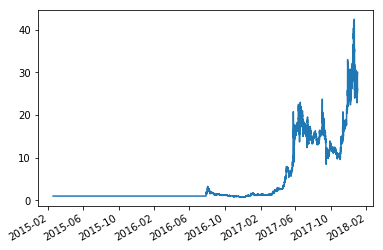

In [5]:
env.dfs['close']['USDT_ETC'].plot()

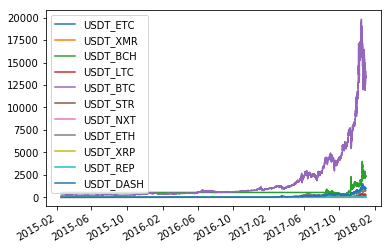

In [6]:
env.dfs['close'].plot()


In [2]:
import os
import pandas as pd

data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
filenames = os.listdir(data_dir)
data = {}
for name in filenames:
    if '.csv' in name and name.startswith('USD') and not name.startswith('USDT_ZEC'):
        filepath = os.path.join(data_dir, name)
        df = pd.read_csv(filepath)
        symbol = name.split('.')[0]
        data[symbol] = df
        
shapes =  []
for key in data.keys():
    shapes.append(data[key].shape + (key,))
shapes = sorted(shapes, key=lambda x: x[0], reverse=True)
symbols = [x[2] for x in shapes]

In [3]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf


training_start = '2015-09-01 00:00:00'
training_end = '2017-09-01 00:00:00'
# training_end = '2017-06-01 00:00:00'

commission_rate  = 2.5e-3
env = TradeEnv(data, start=training_start, end=training_end,
               commission_rate=commission_rate, price_keys=['open', 'high', 'low'])

conf = dict(
    action_spec={"type": "float", "shape": env.action_dim},
    # state_spec={"type": "float", "shape": (env.num_stocks, env.feature_dim)}
    state_spec={"type": "float", "shape": (env.num_stocks, 3)}
)

default_config = eiie_config()
conf.update(default_config)

fit_config = dict(
    start=training_start,
    end=training_end,
    num_epochs=int(2e6),
    # num_epochs=1,
    log_freq=100,
    # log_freq = 1
)

lr_spec={"lr_init": 3.0e-3, "lr_decay_step": 5 * 1000,
                 "lr_decay": 0.96, "lr_min": 3.0e-3}
# conf['lr_spec'] = lr_spec

load_file_path = 'new_params/model.ckpt'
# load_file_path = None

tf.reset_default_graph()
eiie = EIIE(env=env, load_file_path=load_file_path, **conf)
eiie.fit(**fit_config, save_file_path='test_params/model.ckpt')

Building tensorflow graph...
INFO:tensorflow:Restoring parameters from new_params/model.ckpt


[2018-01-12 19:17:43,005] Restoring parameters from new_params/model.ckpt
0it [00:00, ?it/s]

Model restored.
Finished building tensorflow graph, spent time: 0.30239439010620117
Model saved in file: test_params/model.ckpt


35084it [00:05, 5979.52it/s]
  0%|          | 7/2000000 [00:00<8:47:58, 63.13it/s]

Finished storing data.


  0%|          | 790/2000000 [00:09<6:42:48, 82.72it/s]

prev_activation
[-0.83433926 -1.51288843 -1.60519314 -0.36781216 -1.20201445 -1.35015726
 -1.84133434 -1.10278511 -1.36648369 -1.44991064 -1.14963758 -1.77720928]
********action
1.0 [ 0.1132789   0.02957345  0.02428932  0.1074861   0.11670087  0.11401445
  0.09956335  0.10159528  0.10000724  0.11337177  0.05219534  0.027924  ]
######ratio
5.17382 [ 0.43115166  0.43115166  0.43115166  0.43115166  0.43115166  0.43115166
  0.43115166  0.43115166  0.43115166  0.43115166  0.43115166  0.43115166]


  0%|          | 1798/2000000 [00:21<6:30:12, 85.35it/s]

prev_activation
[-0.83507472 -1.90655041 -1.50940371 -0.54610676 -1.62141228 -1.66234493
 -1.66411662 -1.74560332 -1.52578235 -1.81777477 -1.49795151 -1.5868957 ]
********action
1.0 [ 0.13142629  0.0529865   0.0827827   0.1846976   0.0727461   0.06361081
  0.06308448  0.06679188  0.08444096  0.04961023  0.07065728  0.07716519]
######ratio
4.87664 [ 0.40638641  0.40638641  0.40638641  0.40638641  0.40638641  0.40638641
  0.40638641  0.40638641  0.40638641  0.40638641  0.40638641  0.40638641]


  0%|          | 2794/2000000 [00:33<6:28:31, 85.68it/s]

prev_activation
[-0.83591789 -1.75677371 -1.59590721 -0.65380782 -1.55534124 -1.65823913
 -1.41092134 -1.75677371 -3.56108046 -1.75677371 -1.39440489 -2.01402855]
********action
1.0 [ 0.14090988  0.06305912  0.08025588  0.17699856  0.07866415  0.0683558
  0.08666924  0.06668282  0.02331116  0.06514036  0.09090856  0.05904447]
######ratio
5.57453 [ 0.46454445  0.46454445  0.46454445  0.46454445  0.46454445  0.46454445
  0.46454445  0.46454445  0.46454445  0.46454445  0.46454445  0.46454445]


  0%|          | 3793/2000000 [00:44<6:21:46, 87.15it/s]

prev_activation
[-0.83681989 -1.8168602  -2.61215281 -0.73017794 -1.65201092 -1.86458993
 -1.8168602  -1.83722687 -1.8168602  -1.8168602  -1.45560622 -1.81955457]
********action
1.0 [ 0.16382182  0.0678041   0.03454323  0.18946424  0.07552584  0.06310676
  0.07108203  0.05980349  0.06561346  0.06101777  0.08775257  0.06046469]
######ratio
5.15466 [ 0.42955524  0.42955524  0.42955524  0.42955524  0.42955524  0.42955524
  0.42955524  0.42955524  0.42955524  0.42955524  0.42955524  0.42955524]


  0%|          | 4791/2000000 [00:55<6:25:19, 86.30it/s]

prev_activation
[-0.83779836 -1.92793095 -1.31423843 -0.77400839 -1.87457621 -1.65727031
 -1.9450866  -2.04670048 -1.64789164 -1.94204676 -1.80973852 -1.73796809]
********action
1.0 [ 0.15977709  0.05733493  0.10834723  0.17580099  0.06042479  0.0730171
  0.05909849  0.04752805  0.07533263  0.05442332  0.06210992  0.06680546]
######ratio
3.81549 [ 0.3179571  0.3179571  0.3179571  0.3179571  0.3179571  0.3179571
  0.3179571  0.3179571  0.3179571  0.3179571  0.3179571  0.3179571]


  0%|          | 5790/2000000 [01:07<6:24:01, 86.55it/s]

prev_activation
[-0.83881068 -0.89545071 -1.95517242 -0.80691433 -1.88214028 -1.91788042
 -1.684044   -1.691589   -1.91947401 -1.70249879 -1.50586736 -1.87213981]
********action
1.0 [ 0.1539052   0.11093582  0.05280541  0.16631059  0.05621916  0.05674022
  0.06886844  0.06998828  0.053913    0.06800927  0.08145883  0.06084581]
######ratio
3.76469 [ 0.31372392  0.31372392  0.31372392  0.31372392  0.31372392  0.31372392
  0.31372392  0.31372392  0.31372392  0.31372392  0.31372392  0.31372392]


  0%|          | 6798/2000000 [01:19<6:26:21, 85.98it/s]

prev_activation
[-0.8397634  -2.40517354 -2.58335209 -0.85599917 -2.35127139 -2.67414045
 -2.38824105 -2.15807724 -2.37732005 -2.21364069 -2.44117332 -2.62590623]
********action
1.0 [ 0.24325764  0.05408782  0.04127616  0.24870506  0.05512941  0.03714496
  0.05331915  0.06301862  0.05171334  0.06884968  0.04452327  0.03897484]
######ratio
5.52868 [ 0.46072349  0.46072349  0.46072349  0.46072349  0.46072349  0.46072349
  0.46072349  0.46072349  0.46072349  0.46072349  0.46072349  0.46072349]


  0%|          | 7790/2000000 [01:30<6:33:19, 84.42it/s]

prev_activation
[-0.84078622 -1.86726594 -1.98221755 -0.89696842 -1.66993642 -1.98133159
 -2.09277964 -2.24508262 -1.95066261 -2.14951897 -2.12199926 -1.8599844 ]
********action
1.0 [ 0.18050618  0.07242356  0.05754124  0.17619073  0.09495264  0.06257471
  0.0574671   0.05457922  0.06809796  0.05334006  0.05475638  0.06757023]
######ratio
3.43568 [ 0.28630662  0.28630662  0.28630662  0.28630662  0.28630662  0.28630662
  0.28630662  0.28630662  0.28630662  0.28630662  0.28630662  0.28630662]


  0%|          | 8789/2000000 [01:42<6:41:18, 82.70it/s]

prev_activation
[-0.84180188 -1.9680295  -2.15510964 -0.91140395 -1.96223164 -1.84180427
 -2.00427485 -1.98114991 -2.08800721 -2.15551257 -2.35484648 -1.9349966 ]
********action
1.0 [ 0.19408043  0.06377205  0.05762085  0.19025961  0.06765838  0.07614452
  0.06401554  0.0645733   0.05642892  0.05537094  0.04680473  0.06327073]
######ratio
4.20095 [ 0.350079  0.350079  0.350079  0.350079  0.350079  0.350079  0.350079
  0.350079  0.350079  0.350079  0.350079  0.350079]


  0%|          | 9797/2000000 [01:53<6:22:12, 86.78it/s]

prev_activation
[-0.84282351 -1.96843529 -2.1895864  -0.94479764 -1.9955287  -1.97172713
 -2.27560639 -2.21052885 -1.58514786 -2.03021455 -1.61171436 -1.7863133 ]
********action
1.0 [ 0.18457289  0.06264943  0.05081737  0.17482898  0.05965247  0.0602031
  0.04466407  0.05359926  0.09379419  0.05781484  0.08786169  0.06954168]
######ratio
3.81179 [ 0.31764922  0.31764922  0.31764922  0.31764922  0.31764922  0.31764922
  0.31764922  0.31764922  0.31764922  0.31764922  0.31764922  0.31764922]


  1%|          | 10796/2000000 [02:05<6:29:04, 85.21it/s]

prev_activation
[-0.84388006 -2.04868817 -1.30419445 -0.9761219  -2.07151556 -1.9983058
 -1.87512994 -2.11210513 -2.00501871 -2.10287952 -2.2897706  -1.44780707]
********action
1.0 [ 0.18383428  0.05499397  0.10472344  0.16228071  0.05313928  0.05646958
  0.06584917  0.05313308  0.05847573  0.0566101   0.04356652  0.10692412]
######ratio
4.05014 [ 0.33751124  0.33751124  0.33751124  0.33751124  0.33751124  0.33751124
  0.33751124  0.33751124  0.33751124  0.33751124  0.33751124  0.33751124]


  1%|          | 11795/2000000 [02:16<6:23:21, 86.44it/s]

prev_activation
[-0.84491158 -2.01967859 -2.12345576 -1.01038456 -2.20960426 -2.31718493
 -2.31291604 -2.04652882 -2.0879128  -2.09091902 -1.66290021 -2.42298484]
********action
1.0 [ 0.18792917  0.05920975  0.06799741  0.1632518   0.06628159  0.05593719
  0.0568361   0.06320505  0.07707644  0.06446161  0.08456066  0.0532532 ]
######ratio
4.33891 [ 0.3615762  0.3615762  0.3615762  0.3615762  0.3615762  0.3615762
  0.3615762  0.3615762  0.3615762  0.3615762  0.3615762  0.3615762]


  1%|          | 12795/2000000 [02:28<6:38:21, 83.14it/s]

prev_activation
[-0.84600073 -1.15920806 -0.67782754 -1.01649022 -1.23094058 -1.32748461
 -1.15804791  0.10706168 -0.95400125 -1.03494072 -1.65746856 -1.01634049]
********action
1.0 [ 0.09363699  0.06064866  0.10589406  0.07934012  0.05945504  0.05247622
  0.06329174  0.22574274  0.0779094   0.06972513  0.04285082  0.06902905]
######ratio
6.27947 [ 0.52328932  0.52328932  0.52328932  0.52328932  0.52328932  0.52328932
  0.52328932  0.52328932  0.52328932  0.52328932  0.52328932  0.52328932]


  1%|          | 13794/2000000 [02:39<6:58:51, 79.03it/s]

prev_activation
[-0.84714478 -2.43766165 -2.54990482 -1.03300714 -2.75922084 -2.31710386
 -3.21795869 -3.43196154 -2.60971642 -2.4785471  -2.34080029 -2.64910913]
********action
1.0 [ 0.25823897  0.05969212  0.05623048  0.21780461  0.04735146  0.06458798
  0.03835896  0.029013    0.05167081  0.05632633  0.07212146  0.04860384]
######ratio
2.6362 [ 0.21968347  0.21968347  0.21968347  0.21968347  0.21968347  0.21968347
  0.21968347  0.21968347  0.21968347  0.21968347  0.21968347  0.21968347]


  1%|          | 14791/2000000 [02:51<6:22:08, 86.58it/s]

prev_activation
[-0.848248   -2.02994537 -1.586725   -1.05516672 -2.01154304 -1.98219323
 -1.25367856 -2.99916506 -1.83871412 -2.00954485 -1.67747355 -1.85701036]
********action
1.0 [ 0.17298824  0.05403823  0.07653481  0.1466243   0.05413523  0.05512701
  0.12199271  0.05915591  0.06848507  0.05445823  0.07700266  0.05945753]
######ratio
3.53448 [ 0.29454026  0.29454026  0.29454026  0.29454026  0.29454026  0.29454026
  0.29454026  0.29454026  0.29454026  0.29454026  0.29454026  0.29454026]


  1%|          | 15789/2000000 [03:03<6:39:45, 82.73it/s]

prev_activation
[-0.84942186 -2.0447433  -1.87819171 -1.08100724 -2.20046544 -2.07229304
 -2.03974175 -1.95150375 -1.78384757 -1.87408924 -1.69321084 -1.99017096]
********action
1.0 [ 0.17779151  0.05755607  0.07258204  0.15824819  0.05241164  0.05442776
  0.05933301  0.07352324  0.07889044  0.06957431  0.08241786  0.06324388]
######ratio
4.68925 [ 0.39077124  0.39077124  0.39077124  0.39077124  0.39077124  0.39077124
  0.39077124  0.39077124  0.39077124  0.39077124  0.39077124  0.39077124]


  1%|          | 16789/2000000 [03:15<6:41:35, 82.31it/s]

prev_activation
[-0.85056782 -2.04279494 -1.89119506 -1.09207559 -1.98281908 -2.07602525
 -1.3235147  -1.98806882 -1.94274092 -1.90873432 -1.69304943 -2.05625272]
********action
1.0 [ 0.18509594  0.05628438  0.06246617  0.14728829  0.05859887  0.05565285
  0.11727057  0.05704956  0.05859673  0.06428991  0.07996181  0.05744494]
######ratio
5.20817 [ 0.43401414  0.43401414  0.43401414  0.43401414  0.43401414  0.43401414
  0.43401414  0.43401414  0.43401414  0.43401414  0.43401414  0.43401414]


  1%|          | 17794/2000000 [03:27<6:34:28, 83.75it/s]

prev_activation
[-0.85173929 -3.62724209 -3.39067078 -1.12226629 -3.76904964 -1.6137104
 -9.22482491 -2.99036312 -3.30535984 -5.37678432 -2.78535819 -3.88002014]
********action
1.0 [ 0.26520991  0.03000259  0.05274237  0.20859206  0.04617709  0.10674047
  0.00732586  0.0891191   0.05517386  0.04103788  0.05706939  0.04080932]
######ratio
0.212706 [ 0.01772549  0.01772549  0.01772549  0.01772549  0.01772549  0.01772549
  0.01772549  0.01772549  0.01772549  0.01772549  0.01772549  0.01772549]


  1%|          | 18793/2000000 [03:39<6:22:37, 86.30it/s]

prev_activation
[-0.85288739 -2.26406217 -1.24231172 -1.13879776 -1.95486164 -2.04765701
 -2.28712749 -2.12246108 -2.04675794 -1.89830828 -1.7180202  -2.34508967]
********action
1.0 [ 0.19477707  0.04906497  0.12154421  0.15203962  0.06568573  0.0578727
  0.04575358  0.05813685  0.05857977  0.06827043  0.08362511  0.04465001]
######ratio
3.97409 [ 0.33117437  0.33117437  0.33117437  0.33117437  0.33117437  0.33117437
  0.33117437  0.33117437  0.33117437  0.33117437  0.33117437  0.33117437]


  1%|          | 19792/2000000 [03:50<6:33:58, 83.77it/s]

prev_activation
[-0.8539772  -1.88432837 -1.68726277 -1.15881515 -2.01607275 -1.89506626
 -2.31493878 -2.67850351 -1.88977599 -2.30590081 -1.97187662 -1.27519751]
********action
1.0 [ 0.18633397  0.06457958  0.07968757  0.14249125  0.05803381  0.06570478
  0.04125765  0.04463243  0.06514449  0.04224791  0.06241605  0.14747047]
######ratio
2.41845 [ 0.20153765  0.20153765  0.20153765  0.20153765  0.20153765  0.20153765
  0.20153765  0.20153765  0.20153765  0.20153765  0.20153765  0.20153765]


  1%|          | 20791/2000000 [04:02<6:24:31, 85.79it/s]

prev_activation
[-0.85511208 -2.01563811 -2.20538926 -1.14314222 -2.02421498 -2.003901
 -1.80248213 -2.36099029 -1.83482647 -2.04727888 -2.31226707 -2.07782149]
********action
1.0 [ 0.21657473  0.06287657  0.04778913  0.1622908   0.06580734  0.06619493
  0.07865848  0.04913362  0.07354392  0.06785958  0.0468893   0.06238168]
######ratio
3.96777 [ 0.33064726  0.33064726  0.33064726  0.33064726  0.33064726  0.33064726
  0.33064726  0.33064726  0.33064726  0.33064726  0.33064726  0.33064726]


  1%|          | 21797/2000000 [04:14<6:44:58, 81.41it/s]

prev_activation
[-0.85619444 -2.07683182 -1.45655107 -1.16472888 -1.49479771 -1.73534226
 -1.92419648 -1.16899419 -2.05378318 -2.14852738 -2.36240911 -1.95555878]
********action
1.0 [ 0.16323486  0.05386883  0.08920082  0.12033117  0.09519947  0.07023911
  0.06145643  0.14539042  0.05096093  0.04954032  0.04612635  0.0544513 ]
######ratio
4.4489 [ 0.37074131  0.37074131  0.37074131  0.37074131  0.37074131  0.37074131
  0.37074131  0.37074131  0.37074131  0.37074131  0.37074131  0.37074131]


  1%|          | 22793/2000000 [04:26<6:36:59, 83.01it/s]

prev_activation
[-0.85728222 -2.01589799 -2.04051495 -1.18635857 -2.05860043 -1.94286489
 -2.11227107 -2.0439384  -1.99725509 -1.96022701 -1.93106937 -2.06871891]
********action
1.0 [ 0.20488274  0.06432018  0.0625388   0.1487768   0.06153329  0.06923419
  0.05915924  0.06272963  0.06547408  0.06753089  0.06990518  0.06391501]
######ratio
4.13152 [ 0.344293  0.344293  0.344293  0.344293  0.344293  0.344293  0.344293
  0.344293  0.344293  0.344293  0.344293  0.344293]


  1%|          | 23791/2000000 [04:37<6:45:06, 81.30it/s]

prev_activation
[-0.8584193  -2.05907345 -2.60583901 -1.20249104 -2.55425692 -2.72097921
 -2.25211787 -2.66715908 -3.58955145 -2.63708687 -1.72127247 -2.45310783]
********action
1.0 [ 0.25771791  0.07742621  0.04629699  0.18752229  0.05698204  0.04461415
  0.06652861  0.04173812  0.01784851  0.04236684  0.10893655  0.05202184]
######ratio
3.87651 [ 0.32304251  0.32304251  0.32304251  0.32304251  0.32304251  0.32304251
  0.32304251  0.32304251  0.32304251  0.32304251  0.32304251  0.32304251]


  1%|          | 24790/2000000 [04:49<6:22:26, 86.08it/s]

prev_activation
[-0.85950226 -1.62647331 -1.72651279 -1.19201589 -2.02483463 -2.17469692
 -1.59468806 -0.88431156 -1.80493701 -1.63346517 -1.77470386 -1.84080756]
********action
1.0 [ 0.16055161  0.07171506  0.06636942  0.1147809   0.04900748  0.04086612
  0.07896892  0.1599018   0.0624311   0.07184184  0.0646957   0.05887006]
######ratio
6.08817 [ 0.5073477  0.5073477  0.5073477  0.5073477  0.5073477  0.5073477
  0.5073477  0.5073477  0.5073477  0.5073477  0.5073477  0.5073477]


  1%|▏         | 25798/2000000 [05:01<6:19:23, 86.73it/s]

prev_activation
[-0.86068839 -2.24465418 -2.38404989 -1.21185648 -2.11633539 -2.18876362
 -2.40999079 -2.28606558 -2.42893791 -2.16498518 -2.29760122 -1.17956245]
********action
1.0 [ 0.21558115  0.05585179  0.04845444  0.15261039  0.06197284  0.05705107
  0.04950541  0.04971456  0.04715917  0.06318794  0.05188871  0.14702255]
######ratio
4.28273 [ 0.35689402  0.35689402  0.35689402  0.35689402  0.35689402  0.35689402
  0.35689402  0.35689402  0.35689402  0.35689402  0.35689402  0.35689402]


  1%|▏         | 26797/2000000 [05:12<6:21:04, 86.30it/s]

prev_activation
[-0.86188209 -2.30254865 -0.9885754  -1.04174662 -2.25868678 -2.220263
 -2.25722218 -2.18274355 -2.37665296 -1.40049028 -2.63474107 -1.99262905]
********action
1.0 [ 0.19828755  0.04637295  0.1566045   0.15335791  0.04792307  0.04545252
  0.04861709  0.05144603  0.04100406  0.12351966  0.03128649  0.0561282 ]
######ratio
5.33714 [ 0.44476175  0.44476175  0.44476175  0.44476175  0.44476175  0.44476175
  0.44476175  0.44476175  0.44476175  0.44476175  0.44476175  0.44476175]


  1%|▏         | 27796/2000000 [05:24<6:27:07, 84.91it/s]

prev_activation
[-0.86296004 -2.10005665 -2.51340365 -1.25214601 -2.07192779 -2.04423547
 -2.2736454  -2.24814105 -2.18814349 -1.87756515 -2.25370955 -2.31527781]
********action
1.0 [ 0.22463697  0.06139833  0.04322632  0.154658    0.06789706  0.07037793
  0.06067282  0.0567197   0.06575736  0.0773076   0.06078788  0.05655992]
######ratio
4.30424 [ 0.35868675  0.35868675  0.35868675  0.35868675  0.35868675  0.35868675
  0.35868675  0.35868675  0.35868675  0.35868675  0.35868675  0.35868675]


  1%|▏         | 28795/2000000 [05:35<6:18:53, 86.71it/s]

prev_activation
[-0.86404979 -2.11064172 -1.92754984 -1.25610733 -1.91529298 -2.02343941
 -2.35064197 -2.15539169 -2.06235123 -2.07749534 -1.68560719 -2.06832242]
********action
1.0 [ 0.20870918  0.05939291  0.06390788  0.14261021  0.06926696  0.0657543
  0.0438994   0.06086665  0.06250401  0.06041948  0.10246199  0.060207  ]
######ratio
3.59349 [ 0.29945734  0.29945734  0.29945734  0.29945734  0.29945734  0.29945734
  0.29945734  0.29945734  0.29945734  0.29945734  0.29945734  0.29945734]


  1%|▏         | 29795/2000000 [05:46<6:28:06, 84.61it/s]

prev_activation
[-0.86517912 -2.22143936 -2.25447655 -1.27214229 -2.36345387 -2.17197752
 -2.6652112  -3.05185843 -2.38831091 -2.39966583 -2.00742149 -2.50002289]
********action
1.0 [ 0.26313478  0.06391209  0.06008576  0.17640914  0.04999727  0.06788193
  0.04252888  0.03452072  0.05576293  0.05736422  0.08176374  0.04663857]
######ratio
2.57506 [ 0.21458851  0.21458851  0.21458851  0.21458851  0.21458851  0.21458851
  0.21458851  0.21458851  0.21458851  0.21458851  0.21458851  0.21458851]


  2%|▏         | 30794/2000000 [05:58<6:19:42, 86.43it/s]

prev_activation
[-0.86642224 -1.57669473 -1.45992827 -1.31012487 -2.01640415 -1.74697495
 -1.92380071 -0.93166363 -1.29486227 -2.12228942 -1.33303118 -2.06539011]
********action
1.0 [ 0.16191165  0.08569606  0.07819759  0.10486213  0.05142469  0.06137078
  0.05001038  0.12100793  0.09966691  0.04880788  0.08909734  0.04794669]
######ratio
3.83201 [ 0.31933391  0.31933391  0.31933391  0.31933391  0.31933391  0.31933391
  0.31933391  0.31933391  0.31933391  0.31933391  0.31933391  0.31933391]


  2%|▏         | 31794/2000000 [06:09<6:19:43, 86.39it/s]

prev_activation
[-0.86767507 -2.03429413 -2.6469841  -1.32435012 -1.68463373 -1.88433838
 -1.49694228 -2.05790114 -2.44331408 -1.55499029 -1.71808434 -2.05709243]
********action
1.0 [ 0.19254896  0.05956142  0.03307962  0.1258003   0.08634126  0.07057455
  0.09913811  0.05818526  0.04026499  0.09444644  0.08216147  0.05789763]
######ratio
5.58471 [ 0.46539226  0.46539226  0.46539226  0.46539226  0.46539226  0.46539226
  0.46539226  0.46539226  0.46539226  0.46539226  0.46539226  0.46539226]


  2%|▏         | 32793/2000000 [06:21<6:19:08, 86.47it/s]

prev_activation
[-0.86894804 -1.88610721 -2.12216544 -1.35698652 -2.06621242 -1.89277649
 -2.63287568  0.21549296 -1.55358863 -2.14241433 -2.12756324 -1.97185636]
********action
1.0 [ 0.13158573  0.04633477  0.04064917  0.08089651  0.03850727  0.04722856
  0.02262051  0.40703607  0.06526217  0.03758962  0.03718872  0.04510084]
######ratio
5.83849 [ 0.48654065  0.48654065  0.48654065  0.48654065  0.48654065  0.48654065
  0.48654065  0.48654065  0.48654065  0.48654065  0.48654065  0.48654065]


  2%|▏         | 33792/2000000 [06:32<6:24:26, 85.24it/s]

prev_activation
[-0.87019217 -2.03398538 -2.60852075 -1.36564493 -1.81368089 -1.78184223
 -0.67134941 -2.66398787 -2.75441909 -1.31493497 -1.72365856 -2.03398538]
********action
1.0 [ 0.17436363  0.05413775  0.03155524  0.11081696  0.06268674  0.06899323
  0.20587873  0.02916485  0.02592951  0.1079995   0.07433608  0.05413781]
######ratio
6.08775 [ 0.50731224  0.50731224  0.50731224  0.50731224  0.50731224  0.50731224
  0.50731224  0.50731224  0.50731224  0.50731224  0.50731224  0.50731224]


  2%|▏         | 34791/2000000 [06:44<6:16:40, 86.95it/s]

prev_activation
[-0.87129521 -2.02512908 -1.89307761 -1.37548876 -1.89126348 -1.8279326
 -1.82263207 -1.83393621 -1.85876942 -2.11541152 -1.71753263 -2.25187397]
********action
1.0 [ 0.19611053  0.06089556  0.06779699  0.12029319  0.06585366  0.07266846
  0.08747694  0.07452989  0.0643043   0.05486861  0.08321807  0.05198375]
######ratio
3.86512 [ 0.32209349  0.32209349  0.32209349  0.32209349  0.32209349  0.32209349
  0.32209349  0.32209349  0.32209349  0.32209349  0.32209349  0.32209349]


  2%|▏         | 35791/2000000 [06:55<6:21:22, 85.84it/s]

prev_activation
[-0.87244231 -2.24715853 -2.11701393 -1.38862932 -2.08827972 -2.12009192
 -2.1375947  -1.08032012 -2.30479383 -2.19035149 -2.45495462 -2.57702351]
********action
1.0 [ 0.20587108  0.05437298  0.06093388  0.12326989  0.0611516   0.05953369
  0.05982702  0.18845899  0.04904788  0.05358426  0.04455861  0.03939006]
######ratio
5.44015 [ 0.45334622  0.45334622  0.45334622  0.45334622  0.45334622  0.45334622
  0.45334622  0.45334622  0.45334622  0.45334622  0.45334622  0.45334622]


  2%|▏         | 36790/2000000 [07:07<6:23:01, 85.43it/s]

prev_activation
[-0.87357163 -1.4491328  -2.02479839 -1.41869891 -2.04829216 -1.82795131
 -2.16126251 -2.00977421 -2.01797199 -2.01673937 -2.07007647 -2.01884031]
********action
1.0 [ 0.19350642  0.13049436  0.06478234  0.11580645  0.06074653  0.07499211
  0.04986795  0.06505311  0.06198676  0.05955341  0.06132674  0.06188383]
######ratio
2.82535 [ 0.23544607  0.23544607  0.23544607  0.23544607  0.23544607  0.23544607
  0.23544607  0.23544607  0.23544607  0.23544607  0.23544607  0.23544607]


  2%|▏         | 37798/2000000 [07:19<6:24:51, 84.97it/s]

prev_activation
[-0.87464929 -1.92348742 -1.81823516 -1.41863227 -2.05249023 -2.10624433
 -1.91791844 -1.99970078 -2.07361627 -1.90928364 -1.36260223 -2.0002563 ]
********action
1.0 [ 0.20009613  0.0658407   0.07056345  0.11759941  0.0598456   0.05759855
  0.07024293  0.06589439  0.05848919  0.07020064  0.10151637  0.06211257]
######ratio
4.07263 [ 0.3393856  0.3393856  0.3393856  0.3393856  0.3393856  0.3393856
  0.3393856  0.3393856  0.3393856  0.3393856  0.3393856  0.3393856]


  2%|▏         | 38797/2000000 [07:30<6:17:18, 86.63it/s]

prev_activation
[-0.87586129 -2.07656693 -2.35909629 -1.45186305 -1.97795868 -2.01237607
 -1.30735373 -2.009727   -2.10740972 -1.9149754  -1.71918416 -2.01575184]
********action
1.0 [ 0.19789556  0.05926741  0.03935184  0.11360146  0.0645104   0.06406128
  0.13068661  0.05224381  0.05912976  0.06948559  0.08501002  0.06475628]
######ratio
5.1083 [ 0.42569169  0.42569169  0.42569169  0.42569169  0.42569169  0.42569169
  0.42569169  0.42569169  0.42569169  0.42569169  0.42569169  0.42569169]


  2%|▏         | 39796/2000000 [07:42<6:19:36, 86.06it/s]

prev_activation
[-0.87709361 -2.41033292 -2.25939298 -1.466645   -2.53541446 -2.00436473
 -2.67779613 -2.17922854 -2.66719961 -2.50703692 -2.38054037 -2.99243927]
********action
1.0 [ 0.2750037   0.05744218  0.07201605  0.15253618  0.04943806  0.08488046
  0.04726275  0.06680511  0.04478024  0.05188867  0.06146462  0.03648198]
######ratio
3.45023 [ 0.28751886  0.28751886  0.28751886  0.28751886  0.28751886  0.28751886
  0.28751886  0.28751886  0.28751886  0.28751886  0.28751886  0.28751886]


  2%|▏         | 40795/2000000 [07:53<6:16:00, 86.84it/s]

prev_activation
[-0.87811893 -2.1460495  -2.28375578 -1.47747958 -1.94478714 -1.89409935
 -1.45993102 -2.02639866 -2.02848816 -1.34585345 -1.70442736 -1.93459499]
********action
1.0 [ 0.18318567  0.05079898  0.04398424  0.10180368  0.0629379   0.06587607
  0.10053319  0.05689101  0.05731152  0.13306424  0.0800941   0.06351945]
######ratio
5.88676 [ 0.49056306  0.49056306  0.49056306  0.49056306  0.49056306  0.49056306
  0.49056306  0.49056306  0.49056306  0.49056306  0.49056306  0.49056306]


  2%|▏         | 41794/2000000 [08:05<6:25:50, 84.59it/s]

prev_activation
[-0.87935323 -2.00876784 -2.58972979 -1.51857162 -2.277385   -1.89278364
 -2.40308452 -1.96607709 -2.32379031 -2.20113277 -1.66499329 -1.94559145]
********action
1.0 [ 0.21416679  0.07843442  0.04232463  0.11802794  0.05604062  0.07909722
  0.04736679  0.0873394   0.05495021  0.06013498  0.09330115  0.06881586]
######ratio
3.73504 [ 0.31125349  0.31125349  0.31125349  0.31125349  0.31125349  0.31125349
  0.31125349  0.31125349  0.31125349  0.31125349  0.31125349  0.31125349]


  2%|▏         | 42794/2000000 [08:16<6:15:24, 86.89it/s]

prev_activation
[-0.88055873 -1.88363254 -1.67337167 -1.53379881 -1.92190635 -2.05894041
 -1.82964242 -1.78949559 -1.40719759 -1.74154079 -1.38358748 -1.95879447]
********action
1.0 [ 0.17637247  0.06457778  0.08127257  0.09326784  0.05930882  0.0542651
  0.06575772  0.06277813  0.10192425  0.07989015  0.10144726  0.05913787]
######ratio
4.06543 [ 0.33878565  0.33878565  0.33878565  0.33878565  0.33878565  0.33878565
  0.33878565  0.33878565  0.33878565  0.33878565  0.33878565  0.33878565]


  2%|▏         | 43794/2000000 [08:28<6:18:13, 86.20it/s]

prev_activation
[-0.88180041 -2.14489722 -1.79412413 -1.5405798  -0.33338743 -1.95102453
 -1.9263041  -1.73584104 -2.04905128 -2.17422104 -2.15077305 -2.13963246]
********action
1.0 [ 0.19182834  0.05618113  0.0668008   0.10164222  0.14771453  0.06715263
  0.0704098   0.08314102  0.05956541  0.05318078  0.05103602  0.05134735]
######ratio
3.01571 [ 0.25130883  0.25130883  0.25130883  0.25130883  0.25130883  0.25130883
  0.25130883  0.25130883  0.25130883  0.25130883  0.25130883  0.25130883]


  2%|▏         | 44794/2000000 [08:39<6:16:06, 86.64it/s]

prev_activation
[-0.88302153 -2.13443637 -2.4137373  -1.58295321 -1.93137908 -1.97090936
 -1.86750245 -2.12553716 -2.56049895 -1.89389205 -1.933424   -2.16247344]
********action
1.0 [ 0.22288769  0.06329104  0.04858792  0.11171016  0.07171796  0.07306422
  0.08172686  0.06755847  0.0399573   0.07903482  0.07831603  0.06214751]
######ratio
4.47589 [ 0.372991  0.372991  0.372991  0.372991  0.372991  0.372991  0.372991
  0.372991  0.372991  0.372991  0.372991  0.372991]


  2%|▏         | 45793/2000000 [08:51<6:18:24, 86.07it/s]

prev_activation
[-0.88424164 -2.09229016 -0.24660176 -1.98234296 -1.87827301 -1.92502284
 -1.59532666 -2.22107291 -1.95850754 -1.92502928 -1.86194277 -1.87804866]
********action
1.0 [ 0.17981067  0.05495892  0.18120767  0.05670785  0.06289191  0.06382352
  0.07639749  0.04203757  0.0647319   0.04813542  0.10156732  0.06772975]
######ratio
2.68402 [ 0.22366825  0.22366825  0.22366825  0.22366825  0.22366825  0.22366825
  0.22366825  0.22366825  0.22366825  0.22366825  0.22366825  0.22366825]


  2%|▏         | 46792/2000000 [09:02<6:17:01, 86.34it/s]

prev_activation
[-0.88555664 -1.89063501 -2.51099658 -1.68892145 -2.03468275 -1.6413846
 -1.8955214  -2.07101989 -2.42722011 -1.92471409 -2.12599683 -2.35883594]
********action
1.0 [ 0.21540278  0.07653761  0.04990488  0.10007325  0.07044889  0.08674411
  0.06949954  0.06691185  0.06291637  0.07730295  0.0699348   0.05432294]
######ratio
3.71316 [ 0.30943012  0.30943012  0.30943012  0.30943012  0.30943012  0.30943012
  0.30943012  0.30943012  0.30943012  0.30943012  0.30943012  0.30943012]


  2%|▏         | 47791/2000000 [09:14<6:20:37, 85.48it/s]

prev_activation
[-0.88687545 -2.07860184 -2.19646072 -1.66361535 -2.26585531 -2.75398016
 -2.89799833 -2.35248613 -2.27484226 -1.68681395 -0.89130044 -1.69663727]
********action
1.0 [ 0.21186331  0.07389359  0.05428033  0.09702152  0.05163239  0.0314701
  0.02911528  0.03826652  0.05137488  0.10090528  0.17128286  0.08889394]
######ratio
4.01694 [ 0.33474538  0.33474538  0.33474538  0.33474538  0.33474538  0.33474538
  0.33474538  0.33474538  0.33474538  0.33474538  0.33474538  0.33474538]


  2%|▏         | 48790/2000000 [09:25<6:19:46, 85.63it/s]

prev_activation
[-0.88812119 -1.63170552 -1.61510682 -3.6797955  -1.30028892 -1.90142584
 -1.15187097 -1.37547541 -1.84084105 -1.56669927 -1.55882955 -2.12965059]
********action
1.0 [ 0.16397066  0.06812132  0.07002969  0.01553348  0.08693314  0.05696087
  0.1549281   0.10113281  0.06056771  0.08478157  0.08739036  0.04965026]
######ratio
2.48037 [ 0.20669721  0.20669721  0.20669721  0.20669721  0.20669721  0.20669721
  0.20669721  0.20669721  0.20669721  0.20669721  0.20669721  0.20669721]


  2%|▏         | 49790/2000000 [09:36<6:22:41, 84.94it/s]

prev_activation
[-0.88941288 -2.28693199 -2.6365757  -1.7627759  -1.99656439 -1.92981458
 -3.02374172 -1.76998329 -2.20257068 -2.25944734 -3.04910135 -2.5197556 ]
********action
1.0 [ 0.25986943  0.05974821  0.04139757  0.11714153  0.08197521  0.09067357
  0.03797552  0.10866679  0.06600604  0.05542432  0.02990912  0.05121268]
######ratio
3.24891 [ 0.27074257  0.27074257  0.27074257  0.27074257  0.27074257  0.27074257
  0.27074257  0.27074257  0.27074257  0.27074257  0.27074257  0.27074257]


  3%|▎         | 50790/2000000 [09:48<6:15:47, 86.45it/s]

prev_activation
[-0.89068162 -2.94103765 -2.34729505 -1.80571365 -2.04082298 -2.00249434
 -1.7129724  -1.75402236 -2.50249481 -1.80411816 -1.77559948 -1.81470394]
********action
1.0 [ 0.20779577  0.03238434  0.04794909  0.08614221  0.06812619  0.06907217
  0.08920643  0.09479386  0.04496142  0.08472111  0.08722126  0.08762613]
######ratio
6.69038 [ 0.55753124  0.55753124  0.55753124  0.55753124  0.55753124  0.55753124
  0.55753124  0.55753124  0.55753124  0.55753124  0.55753124  0.55753124]


  3%|▎         | 51798/2000000 [10:00<6:17:48, 85.94it/s]

prev_activation
[-0.89199072 -2.16471934 -1.75831032 -1.80279613 -2.22470903 -2.18761659
 -2.31292081 -2.26156998 -2.12086177 -1.93549824 -1.73961973 -1.96885848]
********action
1.0 [ 0.21148026  0.06833351  0.08779251  0.08822898  0.06387459  0.06300939
  0.04853558  0.0661803   0.06564477  0.0770446   0.08906115  0.07081437]
######ratio
3.46368 [ 0.28864002  0.28864002  0.28864002  0.28864002  0.28864002  0.28864002
  0.28864002  0.28864002  0.28864002  0.28864002  0.28864002  0.28864002]


  3%|▎         | 52797/2000000 [10:11<6:27:08, 83.83it/s]

prev_activation
[-0.89321524 -1.9931109  -1.28960586 -1.85291982 -1.63247895 -1.89261937
 -1.9931109  -2.16532874 -0.89548993 -1.71280599 -1.76074457 -1.97634029]
********action
1.0 [ 0.17871681  0.05920382  0.05087002  0.07607487  0.06908537  0.05721794
  0.05921658  0.04963917  0.20546541  0.05841907  0.07584947  0.06024145]
######ratio
2.71378 [ 0.22614849  0.22614849  0.22614849  0.22614849  0.22614849  0.22614849
  0.22614849  0.22614849  0.22614849  0.22614849  0.22614849  0.22614849]


  3%|▎         | 53798/2000000 [10:23<6:26:00, 84.03it/s]

prev_activation
[-0.89456183 -2.4194479  -2.53017092 -1.87516236 -2.14620399 -1.37927008
 -2.11797047 -3.36496258 -2.66545653 -2.05503988 -2.79309988 -2.70090199]
********action
1.0 [ 0.23272724  0.07659127  0.05390699  0.09021878  0.06607097  0.14913946
  0.069788    0.03292231  0.05581676  0.0689237   0.05827663  0.04561787]
######ratio
2.43864 [ 0.20322032  0.20322032  0.20322032  0.20322032  0.20322032  0.20322032
  0.20322032  0.20322032  0.20322032  0.20322032  0.20322032  0.20322032]


  3%|▎         | 54797/2000000 [10:34<6:13:48, 86.73it/s]

prev_activation
[-0.8957774  -1.6925056  -1.73927927 -1.93990493 -1.36642385 -1.75319362
 -1.79959416 -2.24933839 -1.56848407 -1.73145819 -1.801301   -1.83499408]
********action
1.0 [ 0.20393334  0.07479525  0.07055254  0.0756736   0.09198341  0.0760423
  0.06783436  0.0515973   0.078578    0.07553126  0.06356935  0.0699093 ]
######ratio
2.47463 [ 0.20621935  0.20621935  0.20621935  0.20621935  0.20621935  0.20621935
  0.20621935  0.20621935  0.20621935  0.20621935  0.20621935  0.20621935]


  3%|▎         | 55796/2000000 [10:46<6:14:26, 86.54it/s]

prev_activation
[-0.89717329 -2.09405684 -2.03667212 -1.9557879  -1.97691035 -1.85526299
 -1.97766662 -1.14836049 -1.69943547 -2.19898105 -2.05914378 -2.02086854]
********action
1.0 [ 0.20060217  0.07087934  0.05679716  0.07235374  0.07087107  0.07598204
  0.06950322  0.10900215  0.08593936  0.05386928  0.06964955  0.06455094]
######ratio
4.05427 [ 0.33785588  0.33785588  0.33785588  0.33785588  0.33785588  0.33785588
  0.33785588  0.33785588  0.33785588  0.33785588  0.33785588  0.33785588]


  3%|▎         | 56795/2000000 [10:57<6:19:22, 85.37it/s]

prev_activation
[-0.89841622 -1.55205154 -2.04194307 -2.00408435 -1.93597841 -2.04326272
 -1.86393404 -2.27256823 -1.27750015 -2.02886462 -1.33108664 -1.91563129]
********action
1.0 [ 0.2065369   0.08284053  0.06046024  0.07599714  0.06955425  0.06762537
  0.07914797  0.05401649  0.09552915  0.06576405  0.07380328  0.06872466]
######ratio
2.29251 [ 0.19104208  0.19104208  0.19104208  0.19104208  0.19104208  0.19104208
  0.19104208  0.19104208  0.19104208  0.19104208  0.19104208  0.19104208]


  3%|▎         | 57794/2000000 [11:08<6:18:54, 85.43it/s]

prev_activation
[-0.89971149 -2.04291773 -2.22883344 -1.99301767 -2.04305267 -1.93713593
 -1.72326398 -1.6545887  -1.91130042 -1.93608379 -1.59372354 -1.61671185]
********action
1.0 [ 0.19464961  0.06094213  0.05141949  0.06706934  0.06159337  0.06936356
  0.0834114   0.07911606  0.06744085  0.07118341  0.10153684  0.09227394]
######ratio
4.32032 [ 0.36002663  0.36002663  0.36002663  0.36002663  0.36002663  0.36002663
  0.36002663  0.36002663  0.36002663  0.36002663  0.36002663  0.36002663]


  3%|▎         | 58793/2000000 [11:20<6:11:36, 87.06it/s]

prev_activation
[-0.90099698 -2.03456092 -2.65031958 -2.05997348 -2.00027728 -1.85572076
 -1.89320731 -1.92012215 -1.99719453 -2.24419212 -2.10064721 -2.27012324]
********action
1.0 [ 0.22272164  0.07176442  0.04420214  0.07349968  0.07703371  0.08338567
  0.08040205  0.07697578  0.07302752  0.06407949  0.07110468  0.0618033 ]
######ratio
3.31245 [ 0.2760376  0.2760376  0.2760376  0.2760376  0.2760376  0.2760376
  0.2760376  0.2760376  0.2760376  0.2760376  0.2760376  0.2760376]


  3%|▎         | 59792/2000000 [11:32<6:19:25, 85.22it/s]

prev_activation
[-0.90224367 -2.0372529  -2.20873713 -2.06662893 -1.81994772 -1.85813713
 -1.73720455 -2.65455341 -1.91953993 -2.09854126 -2.39129066 -1.78322625]
********action
1.0 [ 0.21409784  0.06681032  0.0737335   0.07148728  0.08192334  0.07699474
  0.0887373   0.04603153  0.07640756  0.06236562  0.06378498  0.07762597]
######ratio
2.57711 [ 0.21475904  0.21475904  0.21475904  0.21475904  0.21475904  0.21475904
  0.21475904  0.21475904  0.21475904  0.21475904  0.21475904  0.21475904]


  3%|▎         | 60791/2000000 [11:43<6:12:25, 86.78it/s]

prev_activation
[-0.90356857 -1.37480354 -0.92657357 -2.15169716 -1.49488091 -1.95564866
 -1.88271809 -1.73140717 -0.20828098 -2.09747553 -0.13517457 -1.00459933]
********action
1.0 [ 0.1113045   0.07178199  0.09673263  0.03578782  0.05337685  0.03813548
  0.03902024  0.08714527  0.15620746  0.03423852  0.13948153  0.13678767]
######ratio
1.61793 [ 0.13482778  0.13482778  0.13482778  0.13482778  0.13482778  0.13482778
  0.13482778  0.13482778  0.13482778  0.13482778  0.13482778  0.13482778]


  3%|▎         | 61790/2000000 [11:55<6:22:22, 84.48it/s]

prev_activation
[-0.9048875  -2.11062765 -1.88060784 -2.19129038 -1.9974916  -1.90676427
 -2.96404576 -2.97442913 -1.90511823 -2.17364669 -2.33188796 -1.75249982]
********action
1.0 [ 0.23604567  0.05937002  0.07175557  0.07067551  0.07905211  0.08213789
  0.0406882   0.04266021  0.08678458  0.07985475  0.06028884  0.09068673]
######ratio
1.48943 [ 0.1241193  0.1241193  0.1241193  0.1241193  0.1241193  0.1241193
  0.1241193  0.1241193  0.1241193  0.1241193  0.1241193  0.1241193]


  3%|▎         | 62798/2000000 [12:06<6:12:36, 86.65it/s]

prev_activation
[-0.90631807 -2.03971291 -1.94732082 -2.26050758 -1.96328104 -2.04890394
 -1.91642916 -1.23155224 -2.07407904 -1.85488021 -1.95694435 -1.7665149 ]
********action
1.0 [ 0.18535648  0.06245392  0.06710836  0.05095994  0.06810749  0.06141024
  0.06826563  0.15524709  0.05918111  0.07375102  0.06632934  0.08182943]
######ratio
4.41145 [ 0.36762097  0.36762097  0.36762097  0.36762097  0.36762097  0.36762097
  0.36762097  0.36762097  0.36762097  0.36762097  0.36762097  0.36762097]


  3%|▎         | 63797/2000000 [12:18<6:15:10, 86.01it/s]

prev_activation
[-0.90762585 -1.78969955 -2.11067033 -2.2416954  -1.89550471 -1.81291842
 -2.11609864 -1.67762709 -1.33744168 -1.936584   -1.93382215 -1.50759459]
********action
1.0 [ 0.19465216  0.06574415  0.06122416  0.05160461  0.06623935  0.07265999
  0.05601086  0.1029527   0.09590279  0.07137719  0.06326106  0.09837105]
######ratio
2.85223 [ 0.23768556  0.23768556  0.23768556  0.23768556  0.23768556  0.23768556
  0.23768556  0.23768556  0.23768556  0.23768556  0.23768556  0.23768556]


  3%|▎         | 64793/2000000 [12:29<6:14:03, 86.22it/s]

prev_activation
[-0.9088769  -2.71542048 -2.73130202 -2.32129025 -2.58100438 -2.54801083
 -3.22527862 -3.14453578 -3.00344276 -2.73737693 -3.69979358 -2.44336295]
********action
1.0 [ 0.40518087  0.05869318  0.04661214  0.10899706  0.06449304  0.06288318
  0.02792144  0.0321885   0.04438798  0.05251678  0.0324171   0.06370878]
######ratio
2.1094 [ 0.1757836  0.1757836  0.1757836  0.1757836  0.1757836  0.1757836
  0.1757836  0.1757836  0.1757836  0.1757836  0.1757836  0.1757836]


  3%|▎         | 65792/2000000 [12:41<6:18:03, 85.27it/s]

prev_activation
[-0.91018969 -1.78203082 -1.71556926 -2.35121989 -2.01782537 -2.07114172
 -1.62768197 -1.37225509 -1.88693833 -2.01185226 -1.18888474 -2.00692892]
********action
1.0 [ 0.18140738  0.0852203   0.07292494  0.04664795  0.05650424  0.0552545
  0.07692064  0.12056142  0.06181271  0.0597139   0.12793666  0.05509543]
######ratio
3.52819 [ 0.29401591  0.29401591  0.29401591  0.29401591  0.29401591  0.29401591
  0.29401591  0.29401591  0.29401591  0.29401591  0.29401591  0.29401591]


  3%|▎         | 66791/2000000 [12:52<6:12:27, 86.51it/s]

prev_activation
[-0.91150445 -2.24617076 -2.11325288 -2.45997095 -1.94442511 -2.03328872
 -2.10405564 -1.81040311 -2.29878998 -2.25072742 -2.70254731 -2.29653692]
********action
1.0 [ 0.23418301  0.06280467  0.0736814   0.05340856  0.07894684  0.07878117
  0.06619423  0.09441821  0.0662071   0.09674278  0.02777392  0.0668581 ]
######ratio
3.06808 [ 0.25567293  0.25567293  0.25567293  0.25567293  0.25567293  0.25567293
  0.25567293  0.25567293  0.25567293  0.25567293  0.25567293  0.25567293]


  3%|▎         | 67791/2000000 [13:04<6:12:56, 86.35it/s]

prev_activation
[-0.91289151 -2.08683825 -1.23610079 -2.49243402 -1.76298201 -1.66684806
 -1.86735499 -2.20140409 -1.75248945 -1.94618952 -1.85150731 -1.06090569]
********action
1.0 [ 0.1726649   0.05450217  0.10445321  0.03835395  0.07066419  0.07619396
  0.09308954  0.03593544  0.06351733  0.1077913   0.06874537  0.11408865]
######ratio
2.31973 [ 0.1933111  0.1933111  0.1933111  0.1933111  0.1933111  0.1933111
  0.1933111  0.1933111  0.1933111  0.1933111  0.1933111  0.1933111]


  3%|▎         | 68790/2000000 [13:15<6:26:52, 83.20it/s]

prev_activation
[-0.91423672 -2.19978476 -2.18629909 -2.54901075 -1.89896584 -1.4243989
 -2.54552197 -2.29817557 -1.97923875 -2.05432558 -2.06444979 -2.06880188]
********action
1.0 [ 0.20818134  0.06662261  0.0684875   0.04311895  0.07576516  0.13439314
  0.05324592  0.07090046  0.07359806  0.06745653  0.06710916  0.07112118]
######ratio
2.01953 [ 0.16829422  0.16829422  0.16829422  0.16829422  0.16829422  0.16829422
  0.16829422  0.16829422  0.16829422  0.16829422  0.16829422  0.16829422]


  3%|▎         | 69780/2000000 [13:27<6:06:02, 87.89it/s]
0it [00:00, ?it/s]
55it [00:00, 510.40it/s]

prev_activation
[-0.91559017 -1.39141107 -2.06534576 -2.5322876  -1.92736959 -1.98020196
 -1.75307083 -1.91657305 -1.86205983 -1.8995297  -1.66156435 -0.85432273]
********action
1.0 [ 0.1898846   0.0934831   0.06205739  0.04004297  0.06363885  0.05834163
  0.07141127  0.06594909  0.07578728  0.06664536  0.08464232  0.12811615]
######ratio
2.47187 [ 0.20598906  0.20598906  0.20598906  0.20598906  0.20598906  0.20598906
  0.20598906  0.20598906  0.20598906  0.20598906  0.20598906  0.20598906]



71it [00:00, 199.58it/s]
85it [00:00, 135.66it/s]
97it [00:00, 112.76it/s]
108it [00:00, 101.91it/s]
118it [00:00, 95.35it/s] 
128it [00:01, 91.46it/s]
138it [00:01, 88.37it/s]
147it [00:01, 86.69it/s]
156it [00:01, 85.52it/s]
165it [00:01, 83.60it/s]
174it [00:01, 82.58it/s]
183it [00:01, 82.74it/s]
192it [00:01, 82.68it/s]
201it [00:01, 82.92it/s]
210it [00:02, 82.85it/s]
219it [00:02, 82.88it/s]
228it [00:02, 82.92it/s]
237it [00:02, 82.53it/s]
246it [00:02, 81.69it/s]
255it [00:02, 80.99it/s]
264it [00:02, 81.74it/s]
273it [00:02, 82.14it/s]
282it [00:02, 82.44it/s]
291it [00:02, 82.72it/s]
300it [00:03, 82.72it/s]
309it [00:03, 82.28it/s]
318it [00:03, 82.38it/s]
327it [00:03, 82.84it/s]
336it [00:03, 81.07it/s]
345it [00:03, 81.42it/s]
354it [00:03, 81.92it/s]
363it [00:03, 81.99it/s]
372it [00:03, 82.06it/s]
381it [00:04, 82.05it/s]
390it [00:04, 82.37it/s]
399it [00:04, 82.21it/s]
408it [00:04, 82.36it/s]
417it [00:04, 75.14it/s]
425it [00:04, 75.81it/s]
434it [00:04, 77.97it/

prev_activation
[-0.91687703 -0.35114098 -0.86495304 -2.60037708 -0.89111125 -1.37259877
 -1.57675493 -0.68497789  0.38864326 -1.8427254  -0.85560465 -1.4694618 ]
********action
1.0 [ 0.07797386  0.09397043  0.09180159  0.01589525  0.06363879  0.05293463
  0.05103075  0.17601641  0.19802228  0.04685525  0.06655148  0.06530917]
######ratio
1.02413 [ 0.08534425  0.08534425  0.08534425  0.08534425  0.08534425  0.08534425
  0.08534425  0.08534425  0.08534425  0.08534425  0.08534425  0.08534425]



1072it [00:12, 78.75it/s]
1081it [00:12, 79.67it/s]
1090it [00:12, 80.76it/s]
1099it [00:12, 81.69it/s]
1108it [00:13, 82.14it/s]
1117it [00:13, 82.60it/s]
1126it [00:13, 82.44it/s]
  3%|▎         | 69780/2000000 [13:40<6:18:20, 85.03it/s]
1144it [00:13, 81.85it/s]
1153it [00:13, 76.44it/s]
1162it [00:13, 78.14it/s]
1171it [00:13, 79.54it/s]
1180it [00:13, 80.74it/s]
1189it [00:14, 81.63it/s]
1198it [00:14, 81.81it/s]
1207it [00:14, 82.41it/s]
1216it [00:14, 82.31it/s]
1225it [00:14, 81.74it/s]
1234it [00:14, 80.94it/s]
1243it [00:14, 81.13it/s]
1252it [00:14, 81.85it/s]
1261it [00:14, 81.93it/s]
1270it [00:14, 82.00it/s]
1279it [00:15, 82.00it/s]
1288it [00:15, 82.15it/s]
1297it [00:15, 81.34it/s]
1306it [00:15, 80.34it/s]
1315it [00:15, 80.62it/s]
1324it [00:15, 81.48it/s]
1333it [00:15, 82.22it/s]
1342it [00:15, 82.33it/s]
1351it [00:15, 82.27it/s]
1360it [00:16, 82.44it/s]
1369it [00:16, 82.80it/s]
1378it [00:16, 82.75it/s]
1387it [00:16, 82.85it/s]
1396it [00:16, 80.92it/s]
1405i

prev_activation
[-0.91831064 -1.72789407 -0.88982505 -2.64617538 -1.611233   -1.88572264
 -2.12749195 -1.38682485 -1.67799759 -1.16780138 -1.68485022 -1.96723628]
********action
1.0 [ 0.1623605   0.08066697  0.1171861   0.03104826  0.0809764   0.05976716
  0.03941603  0.11246823  0.08571949  0.09964316  0.07766473  0.05308299]
######ratio
3.0999 [ 0.25832477  0.25832477  0.25832477  0.25832477  0.25832477  0.25832477
  0.25832477  0.25832477  0.25832477  0.25832477  0.25832477  0.25832477]



2067it [00:24, 80.47it/s]
2076it [00:24, 81.34it/s]
2085it [00:24, 81.74it/s]
2094it [00:25, 82.11it/s]
2103it [00:25, 82.44it/s]
2112it [00:25, 82.62it/s]
2121it [00:25, 83.12it/s]
2130it [00:25, 81.91it/s]
2139it [00:25, 82.06it/s]
2148it [00:25, 82.42it/s]
2157it [00:25, 82.67it/s]
2166it [00:25, 83.05it/s]
2175it [00:26, 82.75it/s]
2184it [00:26, 82.99it/s]
2193it [00:26, 82.48it/s]
2202it [00:26, 81.87it/s]
2211it [00:26, 81.14it/s]
2220it [00:26, 81.51it/s]
2229it [00:26, 82.13it/s]
2238it [00:26, 82.62it/s]
2247it [00:26, 82.97it/s]
2256it [00:27, 83.42it/s]
2265it [00:27, 83.41it/s]
2274it [00:27, 83.20it/s]
2283it [00:27, 83.12it/s]
2292it [00:27, 80.38it/s]
2301it [00:27, 80.53it/s]
2310it [00:27, 81.21it/s]
2319it [00:27, 81.87it/s]
2328it [00:27, 82.19it/s]
2337it [00:28, 82.47it/s]
2346it [00:28, 82.34it/s]
2355it [00:28, 82.24it/s]
2364it [00:28, 82.35it/s]
2373it [00:28, 80.99it/s]
2382it [00:28, 80.79it/s]
2391it [00:28, 81.37it/s]
2400it [00:28, 81.34it/s]
2409it [00:

prev_activation
[-0.91974717 -2.19769716 -2.07012963 -2.71795559 -2.06275582 -1.85806036
 -1.91136765 -1.77522135 -2.33880997 -1.21786642 -2.02337289 -2.18687987]
********action
1.0 [ 0.20382422  0.05898972  0.06241259  0.03611343  0.06508357  0.07888304
  0.07809428  0.09954201  0.05610999  0.13944224  0.06459473  0.05691015]
######ratio
4.54351 [ 0.37862581  0.37862581  0.37862581  0.37862581  0.37862581  0.37862581
  0.37862581  0.37862581  0.37862581  0.37862581  0.37862581  0.37862581]



3074it [00:37, 81.70it/s]
3083it [00:37, 81.43it/s]
3092it [00:37, 82.01it/s]
3101it [00:37, 82.51it/s]
3110it [00:37, 81.12it/s]
3119it [00:37, 81.38it/s]
3128it [00:37, 81.71it/s]
3137it [00:37, 82.10it/s]
3146it [00:37, 82.58it/s]
3155it [00:38, 82.69it/s]
3164it [00:38, 82.90it/s]
3173it [00:38, 82.85it/s]
3182it [00:38, 83.07it/s]
3191it [00:38, 79.98it/s]
3200it [00:38, 80.17it/s]
3209it [00:38, 80.89it/s]
3218it [00:38, 81.61it/s]
3227it [00:38, 81.96it/s]
3236it [00:39, 82.42it/s]
3245it [00:39, 82.87it/s]
3254it [00:39, 82.53it/s]
3263it [00:39, 82.58it/s]
3272it [00:39, 81.89it/s]
3281it [00:39, 82.17it/s]
3290it [00:39, 82.61it/s]
3299it [00:39, 82.90it/s]
3308it [00:39, 82.98it/s]
3317it [00:40, 83.25it/s]
3326it [00:40, 83.18it/s]
3335it [00:40, 83.21it/s]
3344it [00:40, 83.13it/s]
3353it [00:40, 80.33it/s]
3362it [00:40, 79.90it/s]
3371it [00:40, 80.58it/s]
3380it [00:40, 81.12it/s]
3389it [00:40, 81.93it/s]
3398it [00:41, 81.89it/s]
3407it [00:41, 82.43it/s]
3416it [00:

prev_activation
[-0.92106742 -1.66670418 -1.21375799 -2.65510821 -1.9174695  -1.83383751
 -1.76943135 -1.96074581 -1.73289609 -2.0914948  -2.15355086  0.2011683 ]
********action
1.0 [ 0.15883888  0.06015956  0.12865762  0.02939704  0.05125051  0.05552638
  0.06926566  0.04657409  0.05916309  0.05192973  0.0405552   0.24868223]
######ratio
2.09318 [ 0.17443192  0.17443192  0.17443192  0.17443192  0.17443192  0.17443192
  0.17443192  0.17443192  0.17443192  0.17443192  0.17443192  0.17443192]



4071it [00:49, 80.91it/s]
4080it [00:49, 81.53it/s]
4089it [00:49, 81.35it/s]
4098it [00:49, 81.59it/s]
4107it [00:49, 81.64it/s]
4116it [00:49, 81.96it/s]
4125it [00:49, 82.00it/s]
4134it [00:50, 82.52it/s]
4143it [00:50, 82.70it/s]
4152it [00:50, 83.13it/s]
4161it [00:50, 82.95it/s]
4170it [00:50, 79.97it/s]
4179it [00:50, 80.13it/s]
4188it [00:50, 80.57it/s]
4197it [00:50, 81.39it/s]
4206it [00:50, 81.70it/s]
4215it [00:51, 82.11it/s]
4224it [00:51, 82.58it/s]
4233it [00:51, 82.69it/s]
4242it [00:51, 83.15it/s]
4251it [00:51, 82.01it/s]
4260it [00:51, 81.83it/s]
4269it [00:51, 81.92it/s]
4278it [00:51, 82.00it/s]
4287it [00:51, 82.07it/s]
4296it [00:52, 82.25it/s]
4305it [00:52, 81.75it/s]
4314it [00:52, 82.09it/s]
4323it [00:52, 82.11it/s]
4332it [00:52, 81.39it/s]
4341it [00:52, 80.94it/s]
4350it [00:52, 81.56it/s]
4359it [00:52, 81.37it/s]
4368it [00:52, 82.17it/s]
4377it [00:53, 82.46it/s]
4386it [00:53, 82.68it/s]
4395it [00:53, 82.83it/s]
4404it [00:53, 82.73it/s]
4413it [00:

prev_activation
[-0.92231143 -2.04261994 -2.16831183 -2.78563952 -1.9353025  -1.9706316
 -2.30027986 -2.04659104 -2.03161025 -2.08246875 -2.09138775 -1.94816422]
********action
1.0 [ 0.21125156  0.07384284  0.0692963   0.03687698  0.07336587  0.07062455
  0.09372453  0.07901523  0.07758265  0.0717915   0.06820302  0.07442499]
######ratio
2.30641 [ 0.19220057  0.19220057  0.19220057  0.19220057  0.19220057  0.19220057
  0.19220057  0.19220057  0.19220057  0.19220057  0.19220057  0.19220057]



5074it [01:01, 80.17it/s]
5083it [01:01, 81.11it/s]
5092it [01:01, 81.98it/s]
5101it [01:01, 82.47it/s]
5110it [01:02, 82.50it/s]
5119it [01:02, 82.79it/s]
5128it [01:02, 82.39it/s]
5137it [01:02, 82.57it/s]
5146it [01:02, 80.83it/s]
5155it [01:02, 81.18it/s]
5164it [01:02, 81.77it/s]
5173it [01:02, 82.09it/s]
5182it [01:02, 82.44it/s]
5191it [01:03, 82.41it/s]
5200it [01:03, 82.35it/s]
5209it [01:03, 82.32it/s]
5218it [01:03, 82.47it/s]
5227it [01:03, 80.23it/s]
5236it [01:03, 80.81it/s]
5245it [01:03, 80.98it/s]
5254it [01:03, 81.39it/s]
5263it [01:03, 81.91it/s]
5272it [01:04, 82.37it/s]
5281it [01:04, 82.64it/s]
5290it [01:04, 82.78it/s]
5299it [01:04, 81.44it/s]
5308it [01:04, 79.73it/s]
5317it [01:04, 80.32it/s]
5326it [01:04, 81.30it/s]
5335it [01:04, 81.96it/s]
5344it [01:04, 82.07it/s]
5353it [01:05, 82.43it/s]
5362it [01:05, 82.51it/s]
5371it [01:05, 82.64it/s]
5380it [01:05, 81.97it/s]
5389it [01:05, 78.72it/s]
5398it [01:05, 79.54it/s]
5407it [01:05, 80.76it/s]
5416it [01:

prev_activation
[-0.92367113 -2.39540458 -2.63101554 -2.87286329 -3.09186101 -2.2605567
 -3.00033998 -3.36353016 -2.68764019 -2.36392784 -1.97377396 -3.04118705]
********action
1.0 [ 0.24140441  0.08190755  0.09824309  0.03853443  0.05118837  0.07772969
  0.05513277  0.02955573  0.0702037   0.07594433  0.12710702  0.05304905]
######ratio
1.66183 [ 0.13848582  0.13848582  0.13848582  0.13848582  0.13848582  0.13848582
  0.13848582  0.13848582  0.13848582  0.13848582  0.13848582  0.13848582]



6073it [01:13, 81.64it/s]
6082it [01:13, 81.89it/s]
6091it [01:14, 81.96it/s]
6100it [01:14, 82.48it/s]
6109it [01:14, 82.74it/s]
6118it [01:14, 82.68it/s]
6127it [01:14, 76.93it/s]
6135it [01:14, 75.82it/s]
6144it [01:14, 77.95it/s]
6153it [01:14, 79.36it/s]
6162it [01:14, 80.55it/s]
6171it [01:15, 81.14it/s]
6180it [01:15, 81.90it/s]
6189it [01:15, 81.99it/s]
6198it [01:15, 81.89it/s]
6207it [01:15, 80.99it/s]
6216it [01:15, 81.59it/s]
6225it [01:15, 82.31it/s]
6234it [01:15, 82.57it/s]
6243it [01:15, 82.73it/s]
6252it [01:16, 82.83it/s]
6261it [01:16, 82.93it/s]
6270it [01:16, 82.84it/s]
6279it [01:16, 82.86it/s]
6288it [01:16, 81.48it/s]
6297it [01:16, 81.46it/s]
6306it [01:16, 82.14it/s]
6315it [01:16, 82.54it/s]
6324it [01:16, 82.84it/s]
6333it [01:17, 82.89it/s]
6342it [01:17, 82.50it/s]
6351it [01:17, 82.40it/s]
6360it [01:17, 82.37it/s]
6369it [01:17, 81.19it/s]
6378it [01:17, 80.93it/s]
6387it [01:17, 81.03it/s]
6396it [01:17, 81.47it/s]
6405it [01:17, 82.21it/s]
6414it [01:

prev_activation
[-0.92505902 -1.90125084 -1.97496891 -2.98522377 -2.06160426 -2.00806451
 -2.03291535 -1.24863815 -2.01437426 -1.71744108 -2.33123374 -2.01963782]
********action
1.0 [ 0.19009297  0.07523037  0.06498985  0.02523532  0.06863742  0.06534036
  0.05653052  0.17881946  0.06741892  0.08812903  0.05110154  0.06847429]
######ratio
3.43679 [ 0.28639883  0.28639883  0.28639883  0.28639883  0.28639883  0.28639883
  0.28639883  0.28639883  0.28639883  0.28639883  0.28639883  0.28639883]



7068it [01:26, 81.57it/s]
7077it [01:26, 81.91it/s]
7086it [01:26, 82.35it/s]
7095it [01:26, 82.83it/s]
7104it [01:26, 81.68it/s]
7113it [01:26, 81.62it/s]
7122it [01:26, 81.95it/s]
7131it [01:26, 82.20it/s]
7140it [01:26, 82.49it/s]
7149it [01:27, 82.61it/s]
7158it [01:27, 82.82it/s]
7167it [01:27, 82.90it/s]
7176it [01:27, 82.83it/s]
7185it [01:27, 80.24it/s]
7194it [01:27, 80.51it/s]
7203it [01:27, 81.34it/s]
7212it [01:27, 81.72it/s]
7221it [01:27, 82.13it/s]
7230it [01:28, 82.37it/s]
7239it [01:28, 82.07it/s]
7248it [01:28, 82.69it/s]
7257it [01:28, 82.56it/s]
7266it [01:28, 81.83it/s]
7275it [01:28, 81.57it/s]
7284it [01:28, 81.94it/s]
7293it [01:28, 82.76it/s]
7302it [01:28, 82.90it/s]
7311it [01:28, 83.05it/s]
7320it [01:29, 83.11it/s]
7329it [01:29, 82.95it/s]
7338it [01:29, 83.06it/s]
7347it [01:29, 82.92it/s]
7356it [01:29, 79.67it/s]
7365it [01:29, 80.01it/s]
7374it [01:29, 80.88it/s]
7383it [01:29, 81.25it/s]
7392it [01:29, 81.95it/s]
7401it [01:30, 82.56it/s]
7410it [01:

prev_activation
[-0.92637688 -0.88075554 -0.8546133  -2.96152115 -0.25450611 -1.45303369
 -2.22063375 -2.13395548 -1.32634759 -2.2415204  -1.91791987 -1.37614775]
********action
1.0 [ 0.12764677  0.08650302  0.13105775  0.02120935  0.12803541  0.06258766
  0.03717379  0.09424459  0.09571725  0.03030917  0.10013666  0.08537857]
######ratio
0.443243 [ 0.0369369  0.0369369  0.0369369  0.0369369  0.0369369  0.0369369
  0.0369369  0.0369369  0.0369369  0.0369369  0.0369369  0.0369369]



8075it [01:38, 81.52it/s]
8084it [01:38, 82.15it/s]
8093it [01:38, 80.34it/s]
8102it [01:38, 81.10it/s]
8111it [01:38, 81.36it/s]
8120it [01:38, 82.04it/s]
8129it [01:38, 82.14it/s]
8138it [01:39, 82.19it/s]
8147it [01:39, 82.72it/s]
8156it [01:39, 82.53it/s]
8165it [01:39, 82.18it/s]
8174it [01:39, 81.02it/s]
8183it [01:39, 81.07it/s]
8192it [01:39, 81.39it/s]
8201it [01:39, 82.15it/s]
8210it [01:39, 82.25it/s]
8219it [01:40, 82.76it/s]
8228it [01:40, 82.64it/s]
8237it [01:40, 83.08it/s]
8246it [01:40, 83.24it/s]
8255it [01:40, 80.32it/s]
8264it [01:40, 80.80it/s]
8273it [01:40, 81.68it/s]
8282it [01:40, 81.97it/s]
8291it [01:40, 82.20it/s]
8300it [01:41, 82.09it/s]
8309it [01:41, 82.71it/s]
8318it [01:41, 82.61it/s]
8327it [01:41, 82.03it/s]
8336it [01:41, 80.67it/s]
8345it [01:41, 81.39it/s]
8354it [01:41, 81.87it/s]
8363it [01:41, 82.34it/s]
8372it [01:41, 82.42it/s]
8381it [01:42, 82.68it/s]
8390it [01:42, 82.87it/s]
8399it [01:42, 82.89it/s]
8408it [01:42, 82.78it/s]
8417it [01:

prev_activation
[-0.92780578 -2.36423635 -2.27603006 -3.10168839 -3.77392578 -1.78182459
 -3.52600908 -3.27807808 -2.33894849 -3.29288769 -1.93135023 -2.54623508]
********action
1.0 [ 0.285427    0.06236896  0.07078458  0.04408496  0.07795776  0.16319343
  0.03638904  0.04812234  0.05599082  0.03977014  0.0723886   0.04352233]
######ratio
0.733291 [ 0.06110761  0.06110761  0.06110761  0.06110761  0.06110761  0.06110761
  0.06110761  0.06110761  0.06110761  0.06110761  0.06110761  0.06110761]



9073it [01:50, 78.72it/s]
9081it [01:50, 78.64it/s]
9090it [01:50, 79.79it/s]
9099it [01:50, 80.83it/s]
9108it [01:50, 80.48it/s]
9117it [01:51, 81.18it/s]
9126it [01:51, 81.76it/s]
9135it [01:51, 82.10it/s]
9144it [01:51, 82.61it/s]
9153it [01:51, 79.06it/s]
9161it [01:51, 79.07it/s]
9170it [01:51, 79.37it/s]
9178it [01:51, 77.67it/s]
9187it [01:51, 79.24it/s]
9196it [01:52, 80.19it/s]
9205it [01:52, 80.89it/s]
9214it [01:52, 81.63it/s]
9223it [01:52, 81.88it/s]
9232it [01:52, 81.13it/s]
9241it [01:52, 80.96it/s]
9250it [01:52, 81.66it/s]
9259it [01:52, 82.01it/s]
9268it [01:52, 82.33it/s]
9277it [01:53, 82.74it/s]
9286it [01:53, 82.70it/s]
9295it [01:53, 82.68it/s]
9304it [01:53, 82.89it/s]
9313it [01:53, 81.63it/s]
9322it [01:53, 81.76it/s]
9331it [01:53, 82.50it/s]
9340it [01:53, 82.59it/s]
9349it [01:53, 82.55it/s]
9358it [01:54, 82.68it/s]
9367it [01:54, 82.93it/s]
9376it [01:54, 82.99it/s]
9385it [01:54, 82.98it/s]
9394it [01:54, 82.64it/s]
9403it [01:54, 82.17it/s]
9412it [01:

prev_activation
[-0.92918444 -1.92356062 -1.68810272 -3.07725954 -1.92356062 -1.50535488
 -1.92356062 -1.52809334 -3.33043289 -1.92356062 -1.88776541 -1.92356062]
********action
1.0 [ 0.19990584  0.07203986  0.0887989   0.03035063  0.07203571  0.08631691
  0.07202577  0.121349    0.03582752  0.07171395  0.07759275  0.07204317]
######ratio
2.76192 [ 0.23016019  0.23016019  0.23016019  0.23016019  0.23016019  0.23016019
  0.23016019  0.23016019  0.23016019  0.23016019  0.23016019  0.23016019]



10069it [02:02, 81.10it/s]
10078it [02:02, 81.76it/s]
10087it [02:02, 82.13it/s]
10096it [02:03, 82.73it/s]
10105it [02:03, 82.62it/s]
10114it [02:03, 82.85it/s]
10123it [02:03, 82.79it/s]
10132it [02:03, 81.31it/s]
10141it [02:03, 81.52it/s]
10150it [02:03, 81.59it/s]
10159it [02:03, 82.14it/s]
10168it [02:03, 82.16it/s]
10177it [02:04, 82.36it/s]
10186it [02:04, 82.33it/s]
10195it [02:04, 82.48it/s]
10204it [02:04, 82.64it/s]
10213it [02:04, 81.33it/s]
10222it [02:04, 80.87it/s]
10231it [02:04, 81.19it/s]
10240it [02:04, 82.00it/s]
10249it [02:04, 82.37it/s]
10258it [02:05, 82.46it/s]
10267it [02:05, 82.45it/s]
10276it [02:05, 82.53it/s]
10285it [02:05, 82.32it/s]
10294it [02:05, 80.88it/s]
10303it [02:05, 80.98it/s]
10312it [02:05, 81.64it/s]
10321it [02:05, 81.99it/s]
10330it [02:05, 82.07it/s]
10339it [02:06, 82.20it/s]
10348it [02:06, 82.43it/s]
10357it [02:06, 82.70it/s]
10366it [02:06, 82.25it/s]
10375it [02:06, 79.88it/s]
10384it [02:06, 79.44it/s]
10393it [02:06, 80.20it/s]


prev_activation
[-0.9306553  -2.31508613 -1.86566186 -3.12491679 -1.5255959  -1.7925303
 -2.85704088 -2.76128507 -1.74134564 -2.31538868 -1.78638315 -1.50661707]
********action
1.0 [ 0.26830527  0.05124846  0.09092781  0.03625182  0.09359238  0.08781788
  0.0472402   0.04139566  0.0831193   0.06562445  0.05103051  0.0834462 ]
######ratio
1.07743 [ 0.08978596  0.08978596  0.08978596  0.08978596  0.08978596  0.08978596
  0.08978596  0.08978596  0.08978596  0.08978596  0.08978596  0.08978596]



11068it [02:14, 80.46it/s]
11077it [02:15, 81.16it/s]
11086it [02:15, 81.93it/s]
11095it [02:15, 82.08it/s]
11104it [02:15, 82.32it/s]
11113it [02:15, 81.63it/s]
11122it [02:15, 81.41it/s]
11131it [02:15, 81.74it/s]
11140it [02:15, 82.09it/s]
11149it [02:15, 82.56it/s]
11158it [02:16, 82.94it/s]
11167it [02:16, 83.28it/s]
11176it [02:16, 83.19it/s]
11185it [02:16, 83.06it/s]
11194it [02:16, 80.84it/s]
11203it [02:16, 80.09it/s]
11212it [02:16, 80.73it/s]
11221it [02:16, 81.61it/s]
11230it [02:16, 82.15it/s]
11239it [02:17, 82.49it/s]
11248it [02:17, 82.62it/s]
11257it [02:17, 82.81it/s]
11266it [02:17, 82.84it/s]
11275it [02:17, 81.71it/s]
11284it [02:17, 81.50it/s]
11293it [02:17, 81.89it/s]
11302it [02:17, 82.16it/s]
11311it [02:17, 82.58it/s]
11320it [02:17, 82.75it/s]
11329it [02:18, 83.19it/s]
11338it [02:18, 82.49it/s]
11347it [02:18, 82.03it/s]
11356it [02:18, 81.56it/s]
11365it [02:18, 81.20it/s]
11374it [02:18, 81.26it/s]
11383it [02:18, 81.57it/s]
11392it [02:18, 81.73it/s]


prev_activation
[-0.93212795 -2.75988793 -1.78747869 -3.20137119 -2.35420942 -1.51368117
  1.87015271 -2.31827879 -2.48744082  1.82858586 -3.15509176 -2.04143071]
********action
1.0 [ 0.02909826  0.00479177  0.01220407  0.00300814  0.00708461  0.01636492
  0.46531376  0.00761011  0.00634283  0.43495175  0.0036181   0.00961161]
######ratio
11.1406 [ 0.9283796  0.9283796  0.9283796  0.9283796  0.9283796  0.9283796
  0.9283796  0.9283796  0.9283796  0.9283796  0.9283796  0.9283796]



12073it [02:27, 81.84it/s]
12082it [02:27, 82.34it/s]
12091it [02:27, 80.73it/s]
12100it [02:27, 81.14it/s]
12109it [02:27, 81.87it/s]
12118it [02:27, 82.23it/s]
12127it [02:27, 82.53it/s]
12136it [02:28, 82.86it/s]
12145it [02:28, 82.76it/s]
12154it [02:28, 82.79it/s]
12163it [02:28, 82.83it/s]
12172it [02:28, 81.67it/s]
12181it [02:28, 81.36it/s]
12190it [02:28, 81.55it/s]
12199it [02:28, 82.30it/s]
12208it [02:28, 82.18it/s]
12217it [02:28, 82.28it/s]
12226it [02:29, 82.60it/s]
12235it [02:29, 82.57it/s]
12244it [02:29, 82.70it/s]
12253it [02:29, 82.94it/s]
12262it [02:29, 78.56it/s]
12271it [02:29, 80.15it/s]
12280it [02:29, 81.14it/s]
12289it [02:29, 81.61it/s]
12298it [02:29, 81.90it/s]
12307it [02:30, 81.83it/s]
12316it [02:30, 82.10it/s]
12325it [02:30, 82.26it/s]
12334it [02:30, 81.95it/s]
12343it [02:30, 81.04it/s]
12352it [02:30, 81.30it/s]
12361it [02:30, 81.59it/s]
12370it [02:30, 81.99it/s]
12379it [02:30, 82.33it/s]
12388it [02:31, 82.39it/s]
12397it [02:31, 82.84it/s]


prev_activation
[-0.9335162  -2.23774481 -1.70942998 -3.27594304 -1.90751481 -2.02275109
 -1.77551603 -2.23063779 -2.13731647 -2.24753308 -2.28394675 -1.88383985]
********action
1.0 [ 0.22329187  0.05985556  0.11244375  0.02777469  0.07740495  0.07772589
  0.0965815   0.06382041  0.05616154  0.06116676  0.05617301  0.08760002]
######ratio
2.01835 [ 0.16819577  0.16819577  0.16819577  0.16819577  0.16819577  0.16819577
  0.16819577  0.16819577  0.16819577  0.16819577  0.16819577  0.16819577]



13072it [02:39, 82.26it/s]
13081it [02:39, 80.87it/s]
13090it [02:39, 81.06it/s]
13099it [02:39, 81.77it/s]
13108it [02:39, 82.03it/s]
13117it [02:39, 81.96it/s]
13126it [02:40, 82.17it/s]
13135it [02:40, 82.43it/s]
13144it [02:40, 82.42it/s]
13153it [02:40, 82.78it/s]
13162it [02:40, 81.68it/s]
13171it [02:40, 81.71it/s]
13180it [02:40, 82.28it/s]
13189it [02:40, 82.42it/s]
13198it [02:40, 82.80it/s]
13207it [02:41, 82.80it/s]
13216it [02:41, 82.90it/s]
13225it [02:41, 83.01it/s]
13234it [02:41, 81.86it/s]
13243it [02:41, 79.77it/s]
13252it [02:41, 80.67it/s]
13261it [02:41, 80.82it/s]
13270it [02:41, 80.85it/s]
13279it [02:41, 81.31it/s]
13288it [02:42, 82.02it/s]
13297it [02:42, 82.48it/s]
13306it [02:42, 82.58it/s]
13315it [02:42, 82.68it/s]
13324it [02:42, 82.20it/s]
13333it [02:42, 82.07it/s]
13342it [02:42, 82.63it/s]
13351it [02:42, 83.35it/s]
13360it [02:42, 83.08it/s]
13369it [02:43, 83.08it/s]
13378it [02:43, 83.21it/s]
13387it [02:43, 83.11it/s]
13396it [02:43, 83.03it/s]


prev_activation
[-0.93492895 -1.88874793 -1.55632377 -3.2512579  -2.07956719 -1.93716812
 -1.82966852 -1.47986937 -1.7695682  -1.71715045 -1.88609147 -1.81061459]
********action
1.0 [ 0.19186965  0.07034555  0.10620841  0.02196514  0.06089694  0.06640048
  0.07532264  0.09948489  0.0733811   0.08200426  0.07254165  0.07957927]
######ratio
2.78272 [ 0.23189324  0.23189324  0.23189324  0.23189324  0.23189324  0.23189324
  0.23189324  0.23189324  0.23189324  0.23189324  0.23189324  0.23189324]



14068it [02:51, 80.09it/s]
14077it [02:51, 81.06it/s]
14086it [02:51, 81.62it/s]
14095it [02:51, 81.88it/s]
14104it [02:52, 82.19it/s]
14113it [02:52, 82.53it/s]
14122it [02:52, 81.63it/s]
14131it [02:52, 81.55it/s]
14140it [02:52, 80.57it/s]
14149it [02:52, 79.59it/s]
14158it [02:52, 80.63it/s]
14167it [02:52, 80.12it/s]
14176it [02:52, 81.15it/s]
14185it [02:53, 81.54it/s]
14194it [02:53, 82.19it/s]
14203it [02:53, 82.20it/s]
14212it [02:53, 82.56it/s]
14221it [02:53, 77.20it/s]
14229it [02:53, 77.53it/s]
14238it [02:53, 78.96it/s]
14247it [02:53, 80.26it/s]
14256it [02:53, 81.04it/s]
14265it [02:54, 81.65it/s]
14274it [02:54, 82.10it/s]
14283it [02:54, 82.51it/s]
14292it [02:54, 82.45it/s]
14301it [02:54, 81.26it/s]
14310it [02:54, 80.77it/s]
14319it [02:54, 80.85it/s]
14328it [02:54, 80.82it/s]
14337it [02:54, 81.15it/s]
14346it [02:55, 81.54it/s]
14355it [02:55, 80.92it/s]
14364it [02:55, 81.25it/s]
14373it [02:55, 80.96it/s]
14382it [02:55, 76.88it/s]
14390it [02:55, 77.61it/s]


prev_activation
[-0.93634683 -1.29078627 -1.69307828 -3.33883882 -1.19700599 -2.16465235
 -1.30592251 -0.75561428 -1.72567058 -1.84139323 -1.82466483 -1.82358766]
********action
1.0 [ 0.12877561  0.06395328  0.06775174  0.01358301  0.27133682  0.04854058
  0.08196846  0.131603    0.0441814   0.04984758  0.04581817  0.05264026]
######ratio
2.60517 [ 0.21709749  0.21709749  0.21709749  0.21709749  0.21709749  0.21709749
  0.21709749  0.21709749  0.21709749  0.21709749  0.21709749  0.21709749]



15073it [03:03, 81.64it/s]
15082it [03:04, 82.26it/s]
15091it [03:04, 82.01it/s]
15100it [03:04, 82.17it/s]
15109it [03:04, 81.76it/s]
15118it [03:04, 80.05it/s]
15127it [03:04, 81.02it/s]
15136it [03:04, 81.58it/s]
15145it [03:04, 82.03it/s]
15154it [03:04, 82.41it/s]
15163it [03:05, 82.69it/s]
15172it [03:05, 82.64it/s]
15181it [03:05, 82.77it/s]
15190it [03:05, 82.97it/s]
15199it [03:05, 80.59it/s]
15208it [03:05, 81.10it/s]
15217it [03:05, 81.96it/s]
15226it [03:05, 82.13it/s]
15235it [03:05, 82.41it/s]
15244it [03:06, 82.64it/s]
15253it [03:06, 82.54it/s]
15262it [03:06, 82.71it/s]
15271it [03:06, 82.23it/s]
15280it [03:06, 80.04it/s]
15289it [03:06, 79.84it/s]
15298it [03:06, 80.54it/s]
15307it [03:06, 81.17it/s]
15316it [03:06, 81.79it/s]
15325it [03:07, 82.16it/s]
15334it [03:07, 82.55it/s]
15343it [03:07, 82.65it/s]
15352it [03:07, 82.76it/s]
15361it [03:07, 80.79it/s]
15370it [03:07, 81.27it/s]
15379it [03:07, 82.16it/s]
15388it [03:07, 82.33it/s]
15397it [03:07, 82.71it/s]


prev_activation
[-0.9377026  -1.98745131 -1.63065863 -3.42373967 -2.1542685  -1.86605906
 -2.62238574 -2.66841459 -2.23906779 -2.12860632 -1.99172974 -1.88511491]
********action
1.0 [ 0.20754887  0.08022255  0.07652005  0.02157758  0.08165513  0.09648759
  0.08240602  0.04807685  0.05565993  0.07740616  0.07574911  0.09669019]
######ratio
1.14706 [ 0.09558792  0.09558792  0.09558792  0.09558792  0.09558792  0.09558792
  0.09558792  0.09558792  0.09558792  0.09558792  0.09558792  0.09558792]



16070it [03:16, 81.94it/s]
16079it [03:16, 82.19it/s]
16088it [03:16, 82.66it/s]
16097it [03:16, 80.25it/s]
16106it [03:16, 79.61it/s]
16114it [03:16, 79.40it/s]
16122it [03:16, 78.40it/s]
16131it [03:16, 79.22it/s]
16140it [03:17, 80.66it/s]
16149it [03:17, 81.34it/s]
16158it [03:17, 81.83it/s]
16167it [03:17, 82.38it/s]
16176it [03:17, 79.77it/s]
16185it [03:17, 80.53it/s]
16194it [03:17, 81.47it/s]
16203it [03:17, 82.14it/s]
16212it [03:17, 82.32it/s]
16221it [03:18, 82.70it/s]
16230it [03:18, 82.53it/s]
16239it [03:18, 82.72it/s]
16248it [03:18, 82.81it/s]
16257it [03:18, 82.14it/s]
16266it [03:18, 81.22it/s]
16275it [03:18, 81.76it/s]
16284it [03:18, 81.99it/s]
16293it [03:18, 82.26it/s]
16302it [03:19, 82.46it/s]
16311it [03:19, 82.75it/s]
16320it [03:19, 82.79it/s]
16329it [03:19, 82.65it/s]
16338it [03:19, 81.92it/s]
16347it [03:19, 81.74it/s]
16356it [03:19, 81.41it/s]
16365it [03:19, 81.47it/s]
16374it [03:19, 81.92it/s]
16383it [03:20, 82.38it/s]
16392it [03:20, 82.62it/s]


prev_activation
[-0.93910474 -1.74709284 -2.81281042 -3.43962288 -1.99090254 -1.98573649
 -2.11168814 -2.2420845  -2.49301052 -2.27434158 -1.94885743 -2.22655439]
********action
1.0 [ 0.24820262  0.08928025  0.04557817  0.02380802  0.0854805   0.09136185
  0.07029371  0.06580232  0.05093155  0.06843504  0.08564691  0.07517904]
######ratio
1.63563 [ 0.13630281  0.13630281  0.13630281  0.13630281  0.13630281  0.13630281
  0.13630281  0.13630281  0.13630281  0.13630281  0.13630281  0.13630281]



17075it [03:28, 77.37it/s]
17083it [03:28, 77.14it/s]
17092it [03:28, 79.07it/s]
17101it [03:28, 80.52it/s]
17110it [03:28, 81.06it/s]
17119it [03:29, 81.51it/s]
17128it [03:29, 81.75it/s]
17137it [03:29, 82.23it/s]
17146it [03:29, 82.04it/s]
17155it [03:29, 81.45it/s]
17164it [03:29, 81.31it/s]
17173it [03:29, 81.60it/s]
17182it [03:29, 82.08it/s]
17191it [03:29, 82.31it/s]
17200it [03:30, 82.39it/s]
17209it [03:30, 82.87it/s]
17218it [03:30, 83.01it/s]
17227it [03:30, 83.06it/s]
17236it [03:30, 82.17it/s]
17245it [03:30, 81.52it/s]
17254it [03:30, 81.82it/s]
17263it [03:30, 82.23it/s]
17272it [03:30, 82.57it/s]
17281it [03:31, 82.81it/s]
17290it [03:31, 82.92it/s]
17299it [03:31, 82.83it/s]
17308it [03:31, 82.96it/s]
17317it [03:31, 81.43it/s]
17326it [03:31, 81.53it/s]
17335it [03:31, 82.00it/s]
17344it [03:31, 82.56it/s]
17353it [03:31, 82.74it/s]
17362it [03:31, 83.02it/s]
17371it [03:32, 82.89it/s]
17380it [03:32, 82.93it/s]
17389it [03:32, 82.91it/s]
17398it [03:32, 83.03it/s]


prev_activation
[-0.94058019 -2.44061589 -1.40729594 -3.4874661  -1.97609591 -1.56524634
 -1.96402717 -2.12614799 -2.07161236 -2.00554442 -3.57888293 -1.92539716]
********action
1.0 [ 0.20409262  0.03862021  0.12574358  0.01884772  0.07557458  0.10040755
  0.14859734  0.06653877  0.06060358  0.05802801  0.02207744  0.08086857]
######ratio
1.97688 [ 0.16473965  0.16473965  0.16473965  0.16473965  0.16473965  0.16473965
  0.16473965  0.16473965  0.16473965  0.16473965  0.16473965  0.16473965]



18072it [03:40, 81.60it/s]
18081it [03:40, 82.02it/s]
18090it [03:40, 82.29it/s]
18099it [03:41, 82.43it/s]
18108it [03:41, 82.49it/s]
18117it [03:41, 82.65it/s]
18126it [03:41, 82.74it/s]
18135it [03:41, 81.13it/s]
18144it [03:41, 80.30it/s]
18153it [03:41, 80.73it/s]
18162it [03:41, 81.49it/s]
18171it [03:41, 81.93it/s]
18180it [03:42, 82.50it/s]
18189it [03:42, 82.99it/s]
18198it [03:42, 82.78it/s]
18207it [03:42, 82.59it/s]
18216it [03:42, 81.63it/s]
18225it [03:42, 80.19it/s]
18234it [03:42, 81.08it/s]
18243it [03:42, 81.60it/s]
18252it [03:42, 81.55it/s]
18261it [03:42, 81.87it/s]
18270it [03:43, 82.18it/s]
18279it [03:43, 82.48it/s]
18288it [03:43, 82.42it/s]
18297it [03:43, 82.77it/s]
18306it [03:43, 81.55it/s]
18315it [03:43, 81.86it/s]
18324it [03:43, 82.28it/s]
18333it [03:43, 82.35it/s]
18342it [03:43, 80.39it/s]
18351it [03:44, 79.13it/s]
18360it [03:44, 79.69it/s]
18368it [03:44, 79.69it/s]
18377it [03:44, 80.86it/s]
18386it [03:44, 74.71it/s]
18395it [03:44, 77.06it/s]


prev_activation
[-0.94213063 -2.34306741 -2.0577147  -3.66635585 -1.94605803 -1.93014169
 -2.32486939 -2.52223873 -2.04805613 -2.09101629 -1.80030584 -2.02242064]
********action
1.0 [ 0.20660643  0.05946823  0.07767859  0.01670053  0.0752142   0.08547315
  0.054619    0.05398732  0.07478081  0.07338709  0.13901064  0.083074  ]
######ratio
1.56957 [ 0.13079712  0.13079712  0.13079712  0.13079712  0.13079712  0.13079712
  0.13079712  0.13079712  0.13079712  0.13079712  0.13079712  0.13079712]



19075it [03:53, 81.54it/s]
19084it [03:53, 81.80it/s]
19093it [03:53, 79.88it/s]
19102it [03:53, 80.49it/s]
19111it [03:53, 78.89it/s]
19120it [03:53, 79.45it/s]
19129it [03:53, 80.72it/s]
19138it [03:53, 81.23it/s]
19147it [03:53, 81.82it/s]
19156it [03:54, 82.26it/s]
19165it [03:54, 82.18it/s]
19174it [03:54, 82.70it/s]
19183it [03:54, 82.72it/s]
19192it [03:54, 81.00it/s]
19201it [03:54, 78.88it/s]
19210it [03:54, 80.01it/s]
19219it [03:54, 80.67it/s]
19228it [03:54, 80.93it/s]
19237it [03:55, 81.60it/s]
19246it [03:55, 81.97it/s]
19255it [03:55, 82.13it/s]
19264it [03:55, 82.60it/s]
19273it [03:55, 80.78it/s]
19282it [03:55, 81.11it/s]
19291it [03:55, 81.93it/s]
19300it [03:55, 82.12it/s]
19309it [03:55, 82.55it/s]
19318it [03:56, 82.48it/s]
19327it [03:56, 82.32it/s]
19336it [03:56, 82.55it/s]
19345it [03:56, 82.65it/s]
19354it [03:56, 80.50it/s]
19363it [03:56, 79.83it/s]
19372it [03:56, 80.81it/s]
19381it [03:56, 81.45it/s]
19390it [03:56, 81.78it/s]
19399it [03:57, 81.99it/s]


prev_activation
[-0.94370973 -2.95873117 -1.48539507 -3.67265654 -2.3071909  -2.05216599
 -2.5118432  -2.32325792 -2.22949457 -1.7752949   0.30089796 -1.8975004 ]
********action
1.0 [ 0.16070563  0.0158701   0.09866014  0.01218619  0.0490711   0.0584092
  0.04192312  0.04726997  0.04119069  0.06381225  0.3508296   0.06007203]
######ratio
2.71729 [ 0.22644104  0.22644104  0.22644104  0.22644104  0.22644104  0.22644104
  0.22644104  0.22644104  0.22644104  0.22644104  0.22644104  0.22644104]



20073it [04:05, 82.16it/s]
20082it [04:05, 82.21it/s]
20091it [04:05, 81.83it/s]
20100it [04:05, 81.02it/s]
20109it [04:05, 81.61it/s]
20118it [04:05, 81.99it/s]
20127it [04:05, 81.85it/s]
20136it [04:06, 82.42it/s]
20145it [04:06, 82.15it/s]
20154it [04:06, 82.46it/s]
20163it [04:06, 82.49it/s]
20172it [04:06, 80.60it/s]
20181it [04:06, 79.90it/s]
20190it [04:06, 80.53it/s]
20199it [04:06, 80.93it/s]
20208it [04:06, 81.30it/s]
20217it [04:07, 81.87it/s]
20226it [04:07, 81.82it/s]
20235it [04:07, 82.06it/s]
20244it [04:07, 82.14it/s]
20253it [04:07, 80.54it/s]
20262it [04:07, 80.37it/s]
20271it [04:07, 81.48it/s]
20280it [04:07, 81.78it/s]
20289it [04:07, 82.03it/s]
20298it [04:07, 82.68it/s]
20307it [04:08, 82.59it/s]
20316it [04:08, 82.24it/s]
20325it [04:08, 82.54it/s]
20334it [04:08, 81.69it/s]
20343it [04:08, 80.28it/s]
20352it [04:08, 81.10it/s]
20361it [04:08, 81.77it/s]
20370it [04:08, 82.03it/s]
20379it [04:08, 82.57it/s]
20388it [04:09, 83.09it/s]
20397it [04:09, 82.93it/s]


prev_activation
[-0.94518048 -2.62025285 -1.53449368 -3.66578317 -1.88523746 -1.93074393
 -1.65485501 -2.03656173 -2.09438133 -2.08256125 -2.00541329 -1.44762564]
********action
1.0 [ 0.20194133  0.04497512  0.10990362  0.01609969  0.07752481  0.07563733
  0.08241156  0.06944146  0.06606185  0.0691238   0.07148918  0.11539029]
######ratio
2.52165 [ 0.21013726  0.21013726  0.21013726  0.21013726  0.21013726  0.21013726
  0.21013726  0.21013726  0.21013726  0.21013726  0.21013726  0.21013726]



21069it [04:17, 80.37it/s]
21078it [04:17, 80.53it/s]
21087it [04:17, 81.24it/s]
21096it [04:17, 81.31it/s]
21105it [04:17, 81.58it/s]
21114it [04:18, 81.81it/s]
21123it [04:18, 81.85it/s]
21132it [04:18, 82.26it/s]
21141it [04:18, 82.04it/s]
21150it [04:18, 80.65it/s]
21159it [04:18, 80.35it/s]
21168it [04:18, 80.21it/s]
21177it [04:18, 80.77it/s]
21186it [04:18, 81.22it/s]
21195it [04:19, 81.04it/s]
21204it [04:19, 81.74it/s]
21213it [04:19, 82.04it/s]
21222it [04:19, 81.67it/s]
21231it [04:19, 79.56it/s]
21240it [04:19, 80.33it/s]
21249it [04:19, 81.03it/s]
21258it [04:19, 81.37it/s]
21267it [04:19, 81.76it/s]
21276it [04:20, 82.43it/s]
21285it [04:20, 82.44it/s]
21294it [04:20, 80.98it/s]
21303it [04:20, 81.57it/s]
21312it [04:20, 80.94it/s]
21321it [04:20, 80.80it/s]
21330it [04:20, 81.27it/s]
21339it [04:20, 81.72it/s]
21348it [04:20, 82.20it/s]
21357it [04:21, 82.41it/s]
21366it [04:21, 82.61it/s]
21375it [04:21, 82.74it/s]
21384it [04:21, 82.91it/s]
21393it [04:21, 81.78it/s]


prev_activation
[-0.9466458  -1.92379057 -2.69656181 -3.69889212 -3.16851521 -2.30088806
 -2.968997   -3.55531168 -1.01013696 -2.20822716 -1.98809612 -2.64241791]
********action
1.0 [ 0.20709674  0.07385582  0.05369952  0.02841048  0.03916702  0.05374049
  0.03022212  0.04947034  0.26335165  0.07411832  0.07753428  0.0493332 ]
######ratio
0.806426 [ 0.06720217  0.06720217  0.06720217  0.06720217  0.06720217  0.06720217
  0.06720217  0.06720217  0.06720217  0.06720217  0.06720217  0.06720217]



22067it [04:29, 80.80it/s]
22076it [04:29, 81.37it/s]
22085it [04:29, 81.86it/s]
22094it [04:30, 82.00it/s]
22103it [04:30, 82.51it/s]
22112it [04:30, 82.42it/s]
22121it [04:30, 82.57it/s]
22130it [04:30, 81.66it/s]
22139it [04:30, 81.45it/s]
22148it [04:30, 82.24it/s]
22157it [04:30, 82.59it/s]
22166it [04:30, 82.41it/s]
22175it [04:31, 82.39it/s]
22184it [04:31, 82.69it/s]
22193it [04:31, 82.79it/s]
22202it [04:31, 82.83it/s]
22211it [04:31, 79.29it/s]
22219it [04:31, 79.15it/s]
22228it [04:31, 80.29it/s]
22237it [04:31, 81.11it/s]
22246it [04:31, 81.43it/s]
22255it [04:32, 81.94it/s]
22264it [04:32, 82.25it/s]
22273it [04:32, 82.53it/s]
22282it [04:32, 82.82it/s]
22291it [04:32, 82.40it/s]
22300it [04:32, 82.27it/s]
22309it [04:32, 82.67it/s]
22318it [04:32, 82.49it/s]
22327it [04:32, 82.47it/s]
22336it [04:33, 82.59it/s]
22345it [04:33, 82.63it/s]
22354it [04:33, 82.83it/s]
22363it [04:33, 82.26it/s]
22372it [04:33, 81.76it/s]
22381it [04:33, 81.52it/s]
22390it [04:33, 81.88it/s]


prev_activation
[-0.94803953 -2.1953249  -1.86650395 -3.79669809 -1.84884429 -1.7340734
 -2.02782702 -0.3622691  -2.22224283 -1.82632542 -0.98967582 -1.76674557]
********action
1.0 [ 0.126441    0.03268706  0.04261474  0.00777157  0.04559399  0.05036785
  0.04425371  0.41105705  0.03301822  0.05155797  0.08846938  0.06616744]
######ratio
3.72016 [ 0.31001353  0.31001353  0.31001353  0.31001353  0.31001353  0.31001353
  0.31001353  0.31001353  0.31001353  0.31001353  0.31001353  0.31001353]



23074it [04:42, 81.98it/s]
23083it [04:42, 81.96it/s]
23092it [04:42, 82.25it/s]
23101it [04:42, 81.58it/s]
23110it [04:42, 80.43it/s]
23119it [04:42, 80.20it/s]
23128it [04:42, 81.28it/s]
23137it [04:42, 81.98it/s]
23146it [04:42, 82.10it/s]
23155it [04:43, 82.54it/s]
23164it [04:43, 82.58it/s]
23173it [04:43, 82.67it/s]
23182it [04:43, 82.90it/s]
23191it [04:43, 79.87it/s]
23200it [04:43, 80.51it/s]
23209it [04:43, 81.25it/s]
23218it [04:43, 81.59it/s]
23227it [04:43, 81.78it/s]
23236it [04:44, 79.76it/s]
23245it [04:44, 80.55it/s]
23254it [04:44, 80.86it/s]
23263it [04:44, 80.52it/s]
23272it [04:44, 78.51it/s]
23280it [04:44, 78.88it/s]
23289it [04:44, 80.09it/s]
23298it [04:44, 80.77it/s]
23307it [04:44, 81.67it/s]
23316it [04:45, 82.02it/s]
23325it [04:45, 82.08it/s]
23334it [04:45, 82.57it/s]
23343it [04:45, 82.64it/s]
23352it [04:45, 81.37it/s]
23361it [04:45, 80.32it/s]
23370it [04:45, 79.60it/s]
23378it [04:45, 77.03it/s]
23386it [04:45, 75.64it/s]
23395it [04:46, 77.69it/s]


prev_activation
[-0.94955677 -2.08042717 -3.13970709 -3.921597   -2.10056067 -2.32148552
 -1.15428913 -4.23766088 -2.15575743 -2.57943821 -2.1544137  -2.36979294]
********action
1.0 [ 0.19976535  0.07081743  0.0474917   0.01231971  0.05015246  0.04037361
  0.2193346   0.09815522  0.05748921  0.09208632  0.06669621  0.04531817]
######ratio
0.893258 [ 0.07443816  0.07443816  0.07443816  0.07443816  0.07443816  0.07443816
  0.07443816  0.07443816  0.07443816  0.07443816  0.07443816  0.07443816]



24069it [04:54, 82.30it/s]
24078it [04:54, 82.75it/s]
24087it [04:54, 80.06it/s]
24096it [04:54, 79.08it/s]
24105it [04:54, 79.93it/s]
24114it [04:54, 80.44it/s]
24123it [04:54, 80.31it/s]
24132it [04:55, 80.91it/s]
24141it [04:55, 80.68it/s]
24150it [04:55, 80.51it/s]
24159it [04:55, 80.67it/s]
24168it [04:55, 76.72it/s]
24176it [04:55, 76.98it/s]
24185it [04:55, 78.67it/s]
24194it [04:55, 79.55it/s]
24203it [04:55, 80.36it/s]
24212it [04:56, 81.19it/s]
24221it [04:56, 81.52it/s]
24230it [04:56, 80.25it/s]
24239it [04:56, 80.76it/s]
24248it [04:56, 79.95it/s]
24257it [04:56, 80.65it/s]
24266it [04:56, 81.22it/s]
24275it [04:56, 82.03it/s]
24284it [04:56, 82.28it/s]
24293it [04:57, 82.78it/s]
24302it [04:57, 82.91it/s]
24311it [04:57, 83.10it/s]
24320it [04:57, 83.25it/s]
24329it [04:57, 81.21it/s]
24338it [04:57, 81.71it/s]
24347it [04:57, 81.62it/s]
24356it [04:57, 81.63it/s]
24365it [04:57, 82.08it/s]
24374it [04:58, 82.16it/s]
24383it [04:58, 82.71it/s]
24392it [04:58, 82.45it/s]


prev_activation
[-0.95103884 -1.47089529 -2.04984164 -3.90955138 -1.80534005 -1.64272451
 -1.85211325 -3.41048837 -1.74178433 -1.73852253 -2.07718325 -1.16811109]
********action
1.0 [ 0.19725059  0.11434289  0.06880768  0.01264504  0.07720916  0.08223112
  0.07563363  0.07474679  0.09355145  0.07340252  0.04221686  0.08796229]
######ratio
0.748772 [ 0.06239768  0.06239768  0.06239768  0.06239768  0.06239768  0.06239768
  0.06239768  0.06239768  0.06239768  0.06239768  0.06239768  0.06239768]



25074it [05:06, 79.65it/s]
25083it [05:06, 80.63it/s]
25092it [05:06, 81.24it/s]
25101it [05:06, 81.75it/s]
25110it [05:07, 82.32it/s]
25119it [05:07, 82.77it/s]
25128it [05:07, 83.06it/s]
25137it [05:07, 83.41it/s]
25146it [05:07, 82.79it/s]
25155it [05:07, 82.62it/s]
25164it [05:07, 82.80it/s]
25173it [05:07, 83.08it/s]
25182it [05:07, 82.81it/s]
25191it [05:08, 82.38it/s]
25200it [05:08, 82.78it/s]
25209it [05:08, 82.45it/s]
25218it [05:08, 82.06it/s]
25227it [05:08, 80.31it/s]
25236it [05:08, 80.31it/s]
25245it [05:08, 81.14it/s]
25254it [05:08, 81.74it/s]
25263it [05:08, 81.98it/s]
25272it [05:09, 82.03it/s]
25281it [05:09, 82.00it/s]
25290it [05:09, 82.20it/s]
25299it [05:09, 82.58it/s]
25308it [05:09, 80.91it/s]
25317it [05:09, 81.25it/s]
25326it [05:09, 81.46it/s]
25335it [05:09, 81.90it/s]
25344it [05:09, 82.35it/s]
25353it [05:10, 82.62it/s]
25362it [05:10, 82.41it/s]
25371it [05:10, 82.06it/s]
25380it [05:10, 81.98it/s]
25389it [05:10, 80.16it/s]
25398it [05:10, 80.96it/s]


prev_activation
[-0.95252466 -1.16479671 -1.45106757 -3.97802496 -0.99368322 -1.35798681
 -1.17102325 -1.51855648 -0.55300915 -1.59248483 -1.49220002 -1.42986524]
********action
1.0 [ 0.108422    0.07750139  0.08833153  0.00619367  0.11482807  0.07298128
  0.07441474  0.10335998  0.12990308  0.06180444  0.083013    0.07924679]
######ratio
1.1296 [ 0.09413306  0.09413306  0.09413306  0.09413306  0.09413306  0.09413306
  0.09413306  0.09413306  0.09413306  0.09413306  0.09413306  0.09413306]



26071it [05:18, 80.60it/s]
26080it [05:18, 81.60it/s]
26089it [05:19, 82.18it/s]
26098it [05:19, 82.65it/s]
26107it [05:19, 82.75it/s]
26116it [05:19, 82.98it/s]
26125it [05:19, 81.95it/s]
26134it [05:19, 82.06it/s]
26143it [05:19, 82.58it/s]
26152it [05:19, 82.78it/s]
26161it [05:19, 83.14it/s]
26170it [05:20, 83.29it/s]
26179it [05:20, 83.15it/s]
26188it [05:20, 83.25it/s]
26197it [05:20, 82.84it/s]
26206it [05:20, 80.57it/s]
26215it [05:20, 80.10it/s]
26224it [05:20, 80.87it/s]
26233it [05:20, 81.56it/s]
26242it [05:20, 81.98it/s]
26251it [05:21, 82.11it/s]
26260it [05:21, 82.50it/s]
26269it [05:21, 82.71it/s]
26278it [05:21, 82.86it/s]
26287it [05:21, 81.27it/s]
26296it [05:21, 81.21it/s]
26305it [05:21, 81.58it/s]
26314it [05:21, 82.21it/s]
26323it [05:21, 82.54it/s]
26332it [05:22, 82.22it/s]
26341it [05:22, 82.37it/s]
26350it [05:22, 82.47it/s]
26359it [05:22, 82.34it/s]
26368it [05:22, 80.45it/s]
26377it [05:22, 80.43it/s]
26386it [05:22, 81.43it/s]
26395it [05:22, 81.53it/s]


prev_activation
[-0.95400786 -4.0111022  -3.26137066 -4.0717206  -3.16334248 -2.75842381
 -3.82540989 -3.44950724 -3.44428253 -3.46886158 -2.46169782 -3.65420246]
********action
1.0 [ 0.49149477  0.08035876  0.04478474  0.02923587  0.03007038  0.06094857
  0.02973177  0.047745    0.03699207  0.03825273  0.08273213  0.02765319]
######ratio
1.47809 [ 0.12317457  0.12317457  0.12317457  0.12317457  0.12317457  0.12317457
  0.12317457  0.12317457  0.12317457  0.12317457  0.12317457  0.12317457]



27069it [05:31, 81.83it/s]
27078it [05:31, 82.31it/s]
27087it [05:31, 82.27it/s]
27096it [05:31, 82.75it/s]
27105it [05:31, 80.25it/s]
27114it [05:31, 80.33it/s]
27123it [05:31, 80.89it/s]
27132it [05:31, 81.76it/s]
27141it [05:31, 82.22it/s]
27150it [05:32, 82.53it/s]
27159it [05:32, 82.41it/s]
27168it [05:32, 82.61it/s]
27177it [05:32, 82.74it/s]
27186it [05:32, 78.53it/s]
27194it [05:32, 78.75it/s]
27203it [05:32, 79.66it/s]
27212it [05:32, 80.41it/s]
27221it [05:32, 81.28it/s]
27230it [05:33, 81.60it/s]
27239it [05:33, 82.32it/s]
27248it [05:33, 82.58it/s]
27257it [05:33, 82.67it/s]
27266it [05:33, 81.16it/s]
27275it [05:33, 79.88it/s]
27284it [05:33, 80.92it/s]
27293it [05:33, 81.85it/s]
27302it [05:33, 82.41it/s]
27311it [05:33, 82.39it/s]
27320it [05:34, 82.75it/s]
27329it [05:34, 83.18it/s]
27338it [05:34, 82.99it/s]
27347it [05:34, 83.17it/s]
27356it [05:34, 80.17it/s]
27365it [05:34, 80.88it/s]
27374it [05:34, 81.67it/s]
27383it [05:34, 81.92it/s]
27392it [05:34, 82.45it/s]


prev_activation
[-0.95558274 -2.57872891  1.14681363 -3.99722838 -2.03206038 -2.0504694
 -2.12029481 -2.6780026  -2.15254045 -1.97901082 -1.99680281 -2.19014764]
********action
1.0 [ 0.10895604  0.01938531  0.58513117  0.00737966  0.03065799  0.03311547
  0.04205782  0.02983116  0.03393929  0.03648372  0.03664638  0.03641597]
######ratio
0.948664 [ 0.07905532  0.07905532  0.07905532  0.07905532  0.07905532  0.07905532
  0.07905532  0.07905532  0.07905532  0.07905532  0.07905532  0.07905532]



28067it [05:43, 81.47it/s]
28076it [05:43, 81.58it/s]
28085it [05:43, 81.53it/s]
28094it [05:43, 77.63it/s]
28102it [05:43, 78.16it/s]
28110it [05:43, 78.01it/s]
28118it [05:43, 77.33it/s]
28126it [05:43, 75.84it/s]
28134it [05:44, 76.61it/s]
28143it [05:44, 77.95it/s]
28152it [05:44, 78.77it/s]
28161it [05:44, 80.16it/s]
28170it [05:44, 79.04it/s]
28179it [05:44, 79.69it/s]
28188it [05:44, 80.45it/s]
28197it [05:44, 81.09it/s]
28206it [05:44, 81.83it/s]
28215it [05:45, 82.07it/s]
28224it [05:45, 82.47it/s]
28233it [05:45, 83.01it/s]
28242it [05:45, 83.05it/s]
28251it [05:45, 81.08it/s]
28260it [05:45, 81.37it/s]
28269it [05:45, 81.83it/s]
28278it [05:45, 82.35it/s]
28287it [05:45, 82.49it/s]
28296it [05:46, 82.37it/s]
28305it [05:46, 82.25it/s]
28314it [05:46, 82.41it/s]
28323it [05:46, 82.78it/s]
28332it [05:46, 77.33it/s]
28340it [05:46, 74.90it/s]
28349it [05:46, 77.10it/s]
28358it [05:46, 78.93it/s]
28367it [05:46, 79.98it/s]
28376it [05:47, 81.09it/s]
28385it [05:47, 81.84it/s]


prev_activation
[-0.95705795  0.48465151  0.63159859 -4.15029144 -2.25250578 -2.63615823
 -2.29229188 -4.2966404   1.08294964 -2.52796197 -3.00693631 -2.40611458]
********action
1.0 [ 0.07627144  0.0620315   0.09288276  0.00610774  0.03807385  0.02740185
  0.02868846  0.09128343  0.22364224  0.02312648  0.15106086  0.17942934]
######ratio
0.0355795 [ 0.00296495  0.00296495  0.00296495  0.00296495  0.00296495  0.00296495
  0.00296495  0.00296495  0.00296495  0.00296495  0.00296495  0.00296495]



29069it [05:55, 80.33it/s]
29078it [05:55, 81.12it/s]
29087it [05:55, 81.20it/s]
29096it [05:55, 81.89it/s]
29105it [05:55, 82.20it/s]
29114it [05:56, 82.61it/s]
29123it [05:56, 82.49it/s]
29132it [05:56, 82.46it/s]
29141it [05:56, 82.34it/s]
29150it [05:56, 79.63it/s]
29158it [05:56, 79.45it/s]
29167it [05:56, 80.63it/s]
29176it [05:56, 81.17it/s]
29185it [05:56, 81.54it/s]
29194it [05:57, 82.06it/s]
29203it [05:57, 82.67it/s]
29212it [05:57, 82.86it/s]
29221it [05:57, 82.34it/s]
29230it [05:57, 81.17it/s]
29239it [05:57, 77.95it/s]
29248it [05:57, 78.97it/s]
29257it [05:57, 80.02it/s]
29266it [05:57, 80.50it/s]
29275it [05:58, 81.50it/s]
29284it [05:58, 82.21it/s]
29293it [05:58, 82.71it/s]
29302it [05:58, 82.66it/s]
29311it [05:58, 80.77it/s]
29320it [05:58, 80.12it/s]
29329it [05:58, 80.85it/s]
29338it [05:58, 81.72it/s]
29347it [05:58, 82.37it/s]
29356it [05:59, 82.31it/s]
29365it [05:59, 80.75it/s]
29374it [05:59, 79.60it/s]
29383it [05:59, 80.52it/s]
29392it [05:59, 79.83it/s]


prev_activation
[-0.95858675  1.84673095 -1.92866766 -4.16153431 -1.93379056 -1.95098412
 -1.30223763 -2.35553265 -2.67297125 -2.18038797 -2.07628202 -0.98063195]
********action
1.0 [ 0.16812664  0.22557959  0.03981981  0.01076789  0.0511684   0.04469212
  0.08668426  0.06277615  0.03044276  0.0470603   0.05624056  0.1766416 ]
######ratio
0.162464 [ 0.01353871  0.01353871  0.01353871  0.01353871  0.01353871  0.01353871
  0.01353871  0.01353871  0.01353871  0.01353871  0.01353871  0.01353871]



30075it [06:07, 81.08it/s]
30084it [06:07, 81.77it/s]
30093it [06:08, 82.18it/s]
30102it [06:08, 82.47it/s]
30111it [06:08, 82.52it/s]
30120it [06:08, 82.89it/s]
30129it [06:08, 81.03it/s]
30138it [06:08, 80.85it/s]
30147it [06:08, 81.38it/s]
30156it [06:08, 82.29it/s]
30165it [06:08, 82.64it/s]
30174it [06:09, 82.67it/s]
30183it [06:09, 82.88it/s]
30192it [06:09, 82.99it/s]
30201it [06:09, 82.41it/s]
30210it [06:09, 81.20it/s]
30219it [06:09, 78.48it/s]
30227it [06:09, 78.56it/s]
30235it [06:09, 78.11it/s]
30243it [06:09, 78.31it/s]
30252it [06:10, 79.80it/s]
30261it [06:10, 80.77it/s]
30270it [06:10, 81.62it/s]
30279it [06:10, 81.95it/s]
30288it [06:10, 82.17it/s]
30297it [06:10, 80.66it/s]
30306it [06:10, 81.28it/s]
30315it [06:10, 81.87it/s]
30324it [06:10, 82.36it/s]
30333it [06:10, 82.32it/s]
30342it [06:11, 82.48it/s]
30351it [06:11, 82.74it/s]
30360it [06:11, 82.87it/s]
30369it [06:11, 82.26it/s]
30378it [06:11, 80.84it/s]
30387it [06:11, 81.34it/s]
30396it [06:11, 81.33it/s]


prev_activation
[-0.96006435 -2.07800889 -3.63769603 -4.3226285  -2.21787095 -2.02484608
 -2.07800889 -2.07800889 -2.10064316 -2.14321446 -2.21988797 -2.07799721]
********action
1.0 [ 0.24477911  0.08430366  0.01441507  0.01193556  0.06617556  0.08851227
  0.08430366  0.08430386  0.08209229  0.07863662  0.07623984  0.08430255]
######ratio
1.9519 [ 0.16265869  0.16265869  0.16265869  0.16265869  0.16265869  0.16265869
  0.16265869  0.16265869  0.16265869  0.16265869  0.16265869  0.16265869]



31070it [06:20, 80.84it/s]
31079it [06:20, 81.46it/s]
31088it [06:20, 82.02it/s]
31097it [06:20, 82.10it/s]
31106it [06:20, 81.92it/s]
31115it [06:20, 81.02it/s]
31124it [06:20, 81.64it/s]
31133it [06:20, 82.11it/s]
31142it [06:20, 82.43it/s]
31151it [06:21, 82.46it/s]
31160it [06:21, 82.84it/s]
31169it [06:21, 82.91it/s]
31178it [06:21, 82.61it/s]
31187it [06:21, 81.68it/s]
31196it [06:21, 81.46it/s]
31205it [06:21, 81.94it/s]
31214it [06:21, 82.34it/s]
31223it [06:21, 82.60it/s]
31232it [06:21, 82.80it/s]
31241it [06:22, 82.64it/s]
31250it [06:22, 83.05it/s]
31259it [06:22, 83.25it/s]
31268it [06:22, 83.50it/s]
31277it [06:22, 80.87it/s]
31286it [06:22, 81.48it/s]
31295it [06:22, 81.99it/s]
31304it [06:22, 82.26it/s]
31313it [06:22, 82.45it/s]
31322it [06:23, 82.74it/s]
31331it [06:23, 82.80it/s]
31340it [06:23, 82.65it/s]
31349it [06:23, 82.97it/s]
31358it [06:23, 81.13it/s]
31367it [06:23, 81.57it/s]
31376it [06:23, 81.33it/s]
31385it [06:23, 81.74it/s]
31394it [06:23, 81.90it/s]


prev_activation
[-0.96166325 -2.060251   -1.72440434 -4.29978895 -1.9886961  -1.89565063
 -2.15617919 -2.16513896 -2.05725741 -1.15288711 -1.89645886 -1.87471581]
********action
1.0 [ 0.20274162  0.062219    0.0809261   0.00823437  0.06160583  0.08250596
  0.06201684  0.06984182  0.06074354  0.16744444  0.08059157  0.06112899]
######ratio
2.02919 [ 0.16909888  0.16909888  0.16909888  0.16909888  0.16909888  0.16909888
  0.16909888  0.16909888  0.16909888  0.16909888  0.16909888  0.16909888]



32068it [06:32, 81.88it/s]
32077it [06:32, 81.97it/s]
32086it [06:32, 82.44it/s]
32095it [06:32, 80.83it/s]
32104it [06:32, 81.02it/s]
32113it [06:32, 81.52it/s]
32122it [06:32, 81.84it/s]
32131it [06:32, 82.22it/s]
32140it [06:33, 82.52it/s]
32149it [06:33, 82.65it/s]
32158it [06:33, 82.64it/s]
32167it [06:33, 83.05it/s]
32176it [06:33, 80.59it/s]
32185it [06:33, 81.28it/s]
32194it [06:33, 81.88it/s]
32203it [06:33, 82.01it/s]
32212it [06:33, 82.36it/s]
32221it [06:34, 82.79it/s]
32230it [06:34, 82.62it/s]
32239it [06:34, 82.58it/s]
32248it [06:34, 82.77it/s]
32257it [06:34, 81.75it/s]
32266it [06:34, 81.77it/s]
32275it [06:34, 82.01it/s]
32284it [06:34, 82.38it/s]
32293it [06:34, 82.74it/s]
32302it [06:35, 83.09it/s]
32311it [06:35, 83.22it/s]
32320it [06:35, 83.10it/s]
32329it [06:35, 82.33it/s]
32338it [06:35, 77.23it/s]
32346it [06:35, 76.90it/s]
32355it [06:35, 78.81it/s]
32364it [06:35, 79.92it/s]
32373it [06:35, 80.80it/s]
32382it [06:36, 81.53it/s]
32391it [06:36, 81.95it/s]


prev_activation
[-0.96325409  0.66287565 -2.71186352 -4.41462946 -3.59998298 -1.60700011
 -1.38805842 -3.79503703 -0.15207523 -3.36045194 -2.10188031 -2.46962738]
********action
1.0 [ 0.09040913  0.08999918  0.02162804  0.00479124  0.01703826  0.02619454
  0.49224931  0.02862614  0.15601267  0.01169531  0.03208122  0.02927494]
######ratio
0.0751844 [ 0.00626536  0.00626536  0.00626536  0.00626536  0.00626536  0.00626536
  0.00626536  0.00626536  0.00626536  0.00626536  0.00626536  0.00626536]



33073it [06:44, 78.86it/s]
33082it [06:44, 79.84it/s]
33091it [06:44, 80.94it/s]
33100it [06:44, 81.49it/s]
33109it [06:44, 82.06it/s]
33118it [06:45, 82.26it/s]
33127it [06:45, 82.45it/s]
33136it [06:45, 82.42it/s]
33145it [06:45, 82.66it/s]
33154it [06:45, 81.02it/s]
33163it [06:45, 81.61it/s]
33172it [06:45, 82.05it/s]
33181it [06:45, 82.38it/s]
33190it [06:45, 82.23it/s]
33199it [06:46, 82.25it/s]
33208it [06:46, 82.59it/s]
33217it [06:46, 82.56it/s]
33226it [06:46, 83.01it/s]
33235it [06:46, 80.23it/s]
33244it [06:46, 80.56it/s]
33253it [06:46, 81.15it/s]
33262it [06:46, 81.62it/s]
33271it [06:46, 81.91it/s]
33280it [06:47, 82.41it/s]
33289it [06:47, 83.01it/s]
33298it [06:47, 82.63it/s]
33307it [06:47, 82.66it/s]
33316it [06:47, 81.39it/s]
33325it [06:47, 81.97it/s]
33334it [06:47, 82.23it/s]
33343it [06:47, 82.65it/s]
33352it [06:47, 82.50it/s]
33361it [06:48, 82.77it/s]
33370it [06:48, 82.82it/s]
33379it [06:48, 83.01it/s]
33388it [06:48, 82.60it/s]
33397it [06:48, 81.31it/s]


prev_activation
[-0.96487492 -1.26621544 -2.23493385 -4.41028452 -1.98013937 -1.96509874
 -2.49372816 -1.94489396 -1.75638449 -1.96992266 -2.12543821 -1.87564528]
********action
1.0 [ 0.20000198  0.14488156  0.06612033  0.01249005  0.07283864  0.07209659
  0.07628738  0.08223761  0.07479743  0.0561844   0.06626914  0.07579492]
######ratio
0.841074 [ 0.07008946  0.07008946  0.07008946  0.07008946  0.07008946  0.07008946
  0.07008946  0.07008946  0.07008946  0.07008946  0.07008946  0.07008946]



34070it [06:56, 80.22it/s]
34079it [06:56, 80.84it/s]
34088it [06:56, 81.67it/s]
34097it [06:57, 82.10it/s]
34106it [06:57, 82.51it/s]
34115it [06:57, 82.91it/s]
34124it [06:57, 82.86it/s]
34133it [06:57, 80.22it/s]
34142it [06:57, 80.69it/s]
34151it [06:57, 80.37it/s]
34160it [06:57, 81.26it/s]
34169it [06:57, 82.09it/s]
34178it [06:58, 82.47it/s]
34187it [06:58, 82.81it/s]
34196it [06:58, 82.80it/s]
34205it [06:58, 83.15it/s]
34214it [06:58, 79.94it/s]
34223it [06:58, 80.51it/s]
34232it [06:58, 81.05it/s]
34241it [06:58, 81.81it/s]
34250it [06:58, 82.02it/s]
34259it [06:59, 82.21it/s]
34268it [06:59, 81.41it/s]
34277it [06:59, 81.68it/s]
34286it [06:59, 81.73it/s]
34295it [06:59, 77.65it/s]
34303it [06:59, 77.72it/s]
34312it [06:59, 79.31it/s]
34321it [06:59, 80.51it/s]
34330it [06:59, 81.28it/s]
34339it [07:00, 81.79it/s]
34348it [07:00, 82.26it/s]
34357it [07:00, 82.42it/s]
34366it [07:00, 81.95it/s]
34375it [07:00, 80.53it/s]
34384it [07:00, 81.18it/s]
34393it [07:00, 81.95it/s]


prev_activation
[-0.96639961 -3.1864419  -3.30210829 -4.50126696 -3.35421848 -3.07985425
 -3.60382175 -2.33834291 -3.53054428 -3.15242815 -3.52809858 -2.85231781]
********action
1.0 [ 0.46722281  0.04370768  0.04724649  0.01661567  0.04528277  0.05194088
  0.03750215  0.1008549   0.04259511  0.04814357  0.03746524  0.06142274]
######ratio
1.91056 [ 0.15921368  0.15921368  0.15921368  0.15921368  0.15921368  0.15921368
  0.15921368  0.15921368  0.15921368  0.15921368  0.15921368  0.15921368]



35067it [07:08, 81.39it/s]
35076it [07:09, 81.99it/s]
35085it [07:09, 82.08it/s]
35094it [07:09, 82.28it/s]
35103it [07:09, 82.54it/s]
35112it [07:09, 76.49it/s]
35121it [07:09, 78.13it/s]
35130it [07:09, 79.92it/s]
35139it [07:09, 80.80it/s]
35148it [07:09, 81.75it/s]
35157it [07:10, 81.73it/s]
35166it [07:10, 82.02it/s]
35175it [07:10, 82.22it/s]
35184it [07:10, 82.30it/s]
35193it [07:10, 76.54it/s]
35202it [07:10, 78.25it/s]
35211it [07:10, 79.58it/s]
35220it [07:10, 80.44it/s]
35229it [07:11, 81.24it/s]
35238it [07:11, 81.51it/s]
35247it [07:11, 81.72it/s]
35256it [07:11, 82.32it/s]
35265it [07:11, 80.41it/s]
35274it [07:11, 77.95it/s]
35283it [07:11, 79.05it/s]
35292it [07:11, 80.07it/s]
35301it [07:11, 80.59it/s]
35310it [07:12, 81.45it/s]
35319it [07:12, 82.33it/s]
35328it [07:12, 82.69it/s]
35337it [07:12, 82.65it/s]
35346it [07:12, 81.75it/s]
35355it [07:12, 81.59it/s]
35364it [07:12, 82.43it/s]
35373it [07:12, 82.52it/s]
35382it [07:12, 82.48it/s]
35391it [07:12, 83.03it/s]


prev_activation
[-0.96800715 -1.95796132 -3.1046176  -4.54467154 -1.57678151 -2.12477517
 -1.95796132 -2.02674127 -1.95796132 -1.95796132 -2.15862131 -1.98597765]
********action
1.0 [ 0.21945164  0.07649148  0.05433708  0.01224482  0.11494251  0.07980568
  0.07649148  0.07247676  0.07620833  0.07649148  0.07018386  0.07087491]
######ratio
1.58648 [ 0.13220705  0.13220705  0.13220705  0.13220705  0.13220705  0.13220705
  0.13220705  0.13220705  0.13220705  0.13220705  0.13220705  0.13220705]



36075it [07:21, 81.74it/s]
36084it [07:21, 80.77it/s]
36093it [07:21, 80.15it/s]
36102it [07:21, 80.93it/s]
36111it [07:21, 81.75it/s]
36120it [07:21, 82.01it/s]
36129it [07:21, 82.28it/s]
36138it [07:22, 82.59it/s]
36147it [07:22, 82.92it/s]
36156it [07:22, 83.12it/s]
36165it [07:22, 82.92it/s]
36174it [07:22, 78.87it/s]
36183it [07:22, 80.27it/s]
36192it [07:22, 81.34it/s]
36201it [07:22, 82.00it/s]
36210it [07:22, 82.22it/s]
36219it [07:23, 82.67it/s]
36228it [07:23, 82.58it/s]
36237it [07:23, 82.53it/s]
36246it [07:23, 82.75it/s]
36255it [07:23, 81.42it/s]
36264it [07:23, 81.48it/s]
36273it [07:23, 82.19it/s]
36282it [07:23, 82.14it/s]
36291it [07:23, 82.16it/s]
36300it [07:24, 82.64it/s]
36309it [07:24, 82.80it/s]
36318it [07:24, 82.78it/s]
36327it [07:24, 82.82it/s]
36336it [07:24, 80.43it/s]
36345it [07:24, 81.23it/s]
36354it [07:24, 81.95it/s]
36363it [07:24, 82.31it/s]
36372it [07:24, 82.61it/s]
36381it [07:25, 82.86it/s]
36390it [07:25, 82.94it/s]
36399it [07:25, 83.03it/s]


prev_activation
[-0.96954054 -1.78585386 -0.95688164 -2.05556989 -1.46630621 -1.65170574
 -1.51917267 -1.72208309 -1.5012958  -2.87669611 -1.01188874 -0.53654122]
********action
1.0 [ 0.08483871  0.03470608  0.18017934  0.02568942  0.04334669  0.03434549
  0.06752009  0.02866564  0.04020699  0.01482257  0.12170374  0.32397524]
######ratio
1.70842 [ 0.14236802  0.14236802  0.14236802  0.14236802  0.14236802  0.14236802
  0.14236802  0.14236802  0.14236802  0.14236802  0.14236802  0.14236802]



37074it [07:33, 75.60it/s]
37082it [07:33, 72.42it/s]
37091it [07:33, 74.53it/s]
37099it [07:33, 74.47it/s]
37108it [07:33, 76.69it/s]
37117it [07:34, 78.64it/s]
37126it [07:34, 79.88it/s]
37135it [07:34, 80.73it/s]
37144it [07:34, 81.65it/s]
37153it [07:34, 80.86it/s]
37162it [07:34, 81.47it/s]
37171it [07:34, 82.00it/s]
37180it [07:34, 82.25it/s]
37189it [07:34, 82.46it/s]
37198it [07:35, 83.12it/s]
37207it [07:35, 83.13it/s]
37216it [07:35, 82.97it/s]
37225it [07:35, 82.92it/s]
37234it [07:35, 81.29it/s]
37243it [07:35, 81.73it/s]
37252it [07:35, 82.09it/s]
37261it [07:35, 82.41it/s]
37270it [07:35, 82.51it/s]
37279it [07:36, 82.46it/s]
37288it [07:36, 82.51it/s]
37297it [07:36, 82.70it/s]
37306it [07:36, 82.56it/s]
37315it [07:36, 81.20it/s]
37324it [07:36, 81.73it/s]
37333it [07:36, 82.23it/s]
37342it [07:36, 82.37it/s]
37351it [07:36, 82.82it/s]
37360it [07:37, 82.90it/s]
37369it [07:37, 82.87it/s]
37378it [07:37, 82.40it/s]
37387it [07:37, 82.77it/s]
37396it [07:37, 81.56it/s]


prev_activation
[-0.97105461 -2.52365208 -2.06505585 -4.66471529 -1.90225267 -1.86795473
 -2.88898396 -2.82605529 -2.03854942 -2.59213495 -2.56308699 -1.42752337]
********action
1.0 [ 0.21552742  0.04844814  0.09312198  0.00886706  0.08128745  0.08172536
  0.07611468  0.03719658  0.07731324  0.06147286  0.0920378   0.12688743]
######ratio
0.651707 [ 0.05430895  0.05430895  0.05430895  0.05430895  0.05430895  0.05430895
  0.05430895  0.05430895  0.05430895  0.05430895  0.05430895  0.05430895]



38071it [07:45, 80.63it/s]
38080it [07:45, 81.20it/s]
38089it [07:45, 81.99it/s]
38098it [07:46, 82.24it/s]
38107it [07:46, 82.69it/s]
38116it [07:46, 83.03it/s]
38125it [07:46, 82.08it/s]
38134it [07:46, 81.46it/s]
38143it [07:46, 81.30it/s]
38152it [07:46, 81.67it/s]
38161it [07:46, 82.25it/s]
38170it [07:46, 82.47it/s]
38179it [07:47, 82.61it/s]
38188it [07:47, 82.45it/s]
38197it [07:47, 82.51it/s]
38206it [07:47, 82.86it/s]
38215it [07:47, 81.61it/s]
38224it [07:47, 81.82it/s]
38233it [07:47, 82.15it/s]
38242it [07:47, 82.36it/s]
38251it [07:47, 82.72it/s]
38260it [07:48, 82.71it/s]
38269it [07:48, 83.03it/s]
38278it [07:48, 83.40it/s]
38287it [07:48, 83.14it/s]
38296it [07:48, 79.97it/s]
38305it [07:48, 80.10it/s]
38314it [07:48, 80.94it/s]
38323it [07:48, 81.42it/s]
38332it [07:48, 82.08it/s]
38341it [07:49, 81.87it/s]
38350it [07:49, 82.52it/s]
38359it [07:49, 82.73it/s]
38368it [07:49, 82.86it/s]
38377it [07:49, 81.54it/s]
38386it [07:49, 81.63it/s]
38395it [07:49, 81.55it/s]


prev_activation
[-0.97280449 -3.71847582 -2.82610035 -4.83519316 -3.1368556  -2.85613775
 -4.20599747 -4.42210102 -2.82815933 -3.39808941 -4.26879406 -2.96866941]
********action
1.0 [ 0.28053364  0.05673666  0.10295922  0.00950104  0.06537834  0.08109382
  0.06158513  0.05210311  0.09601977  0.08759121  0.03426496  0.07223306]
######ratio
0.484614 [ 0.0403845  0.0403845  0.0403845  0.0403845  0.0403845  0.0403845
  0.0403845  0.0403845  0.0403845  0.0403845  0.0403845  0.0403845]



39070it [07:57, 80.70it/s]
39079it [07:58, 81.09it/s]
39088it [07:58, 81.34it/s]
39097it [07:58, 81.88it/s]
39106it [07:58, 82.11it/s]
39115it [07:58, 79.46it/s]
39123it [07:58, 79.27it/s]
39132it [07:58, 80.63it/s]
39141it [07:58, 81.35it/s]
39150it [07:58, 82.00it/s]
39159it [07:58, 82.03it/s]
39168it [07:59, 82.06it/s]
39177it [07:59, 78.41it/s]
39186it [07:59, 79.49it/s]
39194it [07:59, 79.03it/s]
39203it [07:59, 79.47it/s]
39212it [07:59, 80.32it/s]
39221it [07:59, 81.41it/s]
39230it [07:59, 81.97it/s]
39239it [07:59, 82.32it/s]
39248it [08:00, 82.56it/s]
39257it [08:00, 82.73it/s]
39266it [08:00, 82.69it/s]
39275it [08:00, 82.96it/s]
39284it [08:00, 77.62it/s]
39293it [08:00, 79.10it/s]
39302it [08:00, 80.05it/s]
39311it [08:00, 80.86it/s]
39320it [08:00, 81.36it/s]
39329it [08:01, 82.14it/s]
39338it [08:01, 82.31it/s]
39347it [08:01, 82.13it/s]
39356it [08:01, 82.35it/s]
39365it [08:01, 78.59it/s]
39374it [08:01, 79.87it/s]
39383it [08:01, 80.91it/s]
39392it [08:01, 81.55it/s]


prev_activation
[-0.97434807 -2.15965176 -1.86734807 -4.80866623 -1.77428067 -1.7897743
 -1.85815704 -2.78342485 -1.93841803 -2.25481319 -1.74203598 -1.7965883 ]
********action
1.0 [ 0.20359981  0.05650181  0.08062649  0.00592151  0.07746904  0.08689252
  0.06310294  0.05202542  0.07307079  0.07006183  0.14583363  0.08489425]
######ratio
0.768218 [ 0.0640182  0.0640182  0.0640182  0.0640182  0.0640182  0.0640182
  0.0640182  0.0640182  0.0640182  0.0640182  0.0640182  0.0640182]



40075it [08:10, 81.98it/s]
40084it [08:10, 82.33it/s]
40093it [08:10, 80.74it/s]
40102it [08:10, 80.61it/s]
40111it [08:10, 81.26it/s]
40120it [08:10, 81.79it/s]
40129it [08:10, 82.27it/s]
40138it [08:10, 82.56it/s]
40147it [08:11, 82.83it/s]
40156it [08:11, 83.20it/s]
40165it [08:11, 83.18it/s]
40174it [08:11, 81.51it/s]
40183it [08:11, 80.86it/s]
40192it [08:11, 81.35it/s]
40201it [08:11, 82.12it/s]
40210it [08:11, 82.13it/s]
40219it [08:11, 82.44it/s]
40228it [08:12, 82.72it/s]
40237it [08:12, 82.74it/s]
40246it [08:12, 83.01it/s]
40255it [08:12, 83.21it/s]
40264it [08:12, 80.41it/s]
40273it [08:12, 81.28it/s]
40282it [08:12, 81.54it/s]
40291it [08:12, 82.06it/s]
40300it [08:12, 82.42it/s]
40309it [08:13, 82.53it/s]
40318it [08:13, 82.97it/s]
40327it [08:13, 82.90it/s]
40336it [08:13, 83.12it/s]
40345it [08:13, 76.92it/s]
40353it [08:13, 76.53it/s]
40362it [08:13, 78.28it/s]
40371it [08:13, 79.72it/s]
40380it [08:13, 80.51it/s]
40389it [08:14, 81.48it/s]
40398it [08:14, 81.73it/s]


prev_activation
[-0.97585458 -2.91114616 -2.56619835 -4.98984432 -3.13415122 -1.16911745
 -0.18087059 -3.87361598 -2.53538918  1.3366406  -3.1935451  -2.39371681]
********action
1.0 [ 0.0653187   0.00857723  0.01357646  0.00127815  0.00638634  0.05568668
  0.13683231  0.00348784  0.01407864  0.67158735  0.0062329   0.01695733]
######ratio
7.05256 [ 0.5877133  0.5877133  0.5877133  0.5877133  0.5877133  0.5877133
  0.5877133  0.5877133  0.5877133  0.5877133  0.5877133  0.5877133]



41073it [08:22, 82.40it/s]
41082it [08:22, 79.91it/s]
41091it [08:22, 79.88it/s]
41100it [08:22, 80.96it/s]
41109it [08:22, 81.74it/s]
41118it [08:22, 82.05it/s]
41127it [08:23, 82.41it/s]
41136it [08:23, 82.55it/s]
41145it [08:23, 82.73it/s]
41154it [08:23, 82.83it/s]
41163it [08:23, 81.37it/s]
41172it [08:23, 81.83it/s]
41181it [08:23, 81.82it/s]
41190it [08:23, 82.12it/s]
41199it [08:23, 82.29it/s]
41208it [08:24, 81.86it/s]
41217it [08:24, 82.24it/s]
41226it [08:24, 82.51it/s]
41235it [08:24, 82.33it/s]
41244it [08:24, 79.72it/s]
41253it [08:24, 80.59it/s]
41262it [08:24, 81.12it/s]
41271it [08:24, 81.78it/s]
41280it [08:24, 81.95it/s]
41289it [08:25, 82.63it/s]
41298it [08:25, 82.55it/s]
41307it [08:25, 82.56it/s]
41316it [08:25, 82.86it/s]
41325it [08:25, 80.86it/s]
41334it [08:25, 80.49it/s]
41343it [08:25, 81.48it/s]
41352it [08:25, 81.71it/s]
41361it [08:25, 82.44it/s]
41370it [08:26, 82.30it/s]
41379it [08:26, 82.48it/s]
41388it [08:26, 82.78it/s]
41397it [08:26, 82.75it/s]


prev_activation
[-0.97754049 -1.99404645  1.28109348 -4.9656682  -2.42798638 -1.91474485
 -1.99404645 -5.05705929 -1.16551208 -2.00171518 -2.26032734 -0.62334329]
********action
1.0 [ 0.14174314  0.05022143  0.0909369   0.01002049  0.0769222   0.0773894
  0.05022143  0.0392132   0.06582396  0.03253924  0.04737714  0.31759146]
######ratio
0.148596 [ 0.01238304  0.01238304  0.01238304  0.01238304  0.01238304  0.01238304
  0.01238304  0.01238304  0.01238304  0.01238304  0.01238304  0.01238304]



42067it [08:34, 80.87it/s]
42076it [08:34, 81.61it/s]
42085it [08:34, 81.91it/s]
42094it [08:35, 81.83it/s]
42103it [08:35, 82.27it/s]
42112it [08:35, 82.64it/s]
42121it [08:35, 82.74it/s]
42130it [08:35, 81.45it/s]
42139it [08:35, 80.29it/s]
42148it [08:35, 81.00it/s]
42157it [08:35, 81.64it/s]
42166it [08:35, 82.13it/s]
42175it [08:35, 82.49it/s]
42184it [08:36, 82.72it/s]
42193it [08:36, 82.91it/s]
42202it [08:36, 82.68it/s]
42211it [08:36, 82.97it/s]
42220it [08:36, 81.38it/s]
42229it [08:36, 80.84it/s]
42238it [08:36, 81.27it/s]
42247it [08:36, 81.78it/s]
42256it [08:36, 81.99it/s]
42265it [08:37, 82.10it/s]
42274it [08:37, 82.29it/s]
42283it [08:37, 82.34it/s]
42292it [08:37, 82.72it/s]
42301it [08:37, 80.53it/s]
42310it [08:37, 81.10it/s]
42319it [08:37, 81.82it/s]
42328it [08:37, 82.14it/s]
42337it [08:37, 82.59it/s]
42346it [08:38, 82.84it/s]
42355it [08:38, 82.82it/s]
42364it [08:38, 82.79it/s]
42373it [08:38, 82.73it/s]
42382it [08:38, 79.25it/s]
42391it [08:38, 80.39it/s]


prev_activation
[-0.97908694 -2.08289289 -1.619362   -5.09459877 -2.17536068 -2.373703
 -1.32382214 -1.86670959 -0.96451199 -1.89101636 -2.3559041  -2.31087303]
********action
1.0 [ 0.19566269  0.0679919   0.06836476  0.00541311  0.06327719  0.05744172
  0.11824815  0.12490562  0.11191826  0.06274339  0.05555477  0.06847839]
######ratio
1.48264 [ 0.12355358  0.12355358  0.12355358  0.12355358  0.12355358  0.12355358
  0.12355358  0.12355358  0.12355358  0.12355358  0.12355358  0.12355358]



43075it [08:46, 81.66it/s]
43084it [08:47, 81.64it/s]
43093it [08:47, 81.77it/s]
43102it [08:47, 81.21it/s]
43111it [08:47, 81.62it/s]
43120it [08:47, 80.67it/s]
43129it [08:47, 81.05it/s]
43138it [08:47, 81.21it/s]
43147it [08:47, 82.01it/s]
43156it [08:47, 81.91it/s]
43165it [08:48, 82.04it/s]
43174it [08:48, 81.81it/s]
43183it [08:48, 81.96it/s]
43192it [08:48, 82.30it/s]
43201it [08:48, 80.73it/s]
43210it [08:48, 80.47it/s]
43219it [08:48, 79.77it/s]
43228it [08:48, 80.25it/s]
43237it [08:48, 79.98it/s]
43246it [08:49, 80.53it/s]
43255it [08:49, 80.42it/s]
43264it [08:49, 80.74it/s]
43273it [08:49, 81.26it/s]
43282it [08:49, 80.06it/s]
43291it [08:49, 81.21it/s]
43300it [08:49, 81.86it/s]
43309it [08:49, 81.63it/s]
43318it [08:49, 81.20it/s]
43327it [08:50, 80.87it/s]
43336it [08:50, 80.81it/s]
43345it [08:50, 80.52it/s]
43354it [08:50, 80.39it/s]
43363it [08:50, 73.79it/s]
43371it [08:50, 74.77it/s]
43379it [08:50, 75.93it/s]
43387it [08:50, 73.35it/s]
43395it [08:51, 74.51it/s]


prev_activation
[-0.98075897 -3.37622809 -3.10686564 -5.13888741 -2.01985526 -2.50600791
 -3.38493037 -4.93306637 -2.94087267 -3.36550975 -6.28413582 -2.43399954]
********action
1.0 [ 0.44948176  0.06015252  0.0549684   0.01505777  0.05259788  0.09644246
  0.02390631  0.01680788  0.05672924  0.05889946  0.0535027   0.06145361]
######ratio
0.282796 [ 0.02356637  0.02356637  0.02356637  0.02356637  0.02356637  0.02356637
  0.02356637  0.02356637  0.02356637  0.02356637  0.02356637  0.02356637]



44070it [08:59, 80.08it/s]
44079it [08:59, 80.33it/s]
44088it [08:59, 81.17it/s]
44097it [08:59, 81.70it/s]
44106it [08:59, 82.39it/s]
44115it [09:00, 82.67it/s]
44124it [09:00, 82.66it/s]
44133it [09:00, 82.95it/s]
44142it [09:00, 82.85it/s]
44151it [09:00, 82.80it/s]
44160it [09:00, 82.78it/s]
44169it [09:00, 82.66it/s]
44178it [09:00, 82.80it/s]
44187it [09:00, 83.04it/s]
44196it [09:01, 82.97it/s]
44205it [09:01, 82.80it/s]
44214it [09:01, 82.93it/s]
44223it [09:01, 82.96it/s]
44232it [09:01, 80.35it/s]
44241it [09:01, 76.67it/s]
44249it [09:01, 76.94it/s]
44258it [09:01, 78.69it/s]
44267it [09:01, 80.13it/s]
44276it [09:02, 80.70it/s]
44285it [09:02, 81.50it/s]
44294it [09:02, 82.34it/s]
44303it [09:02, 82.51it/s]
44312it [09:02, 81.92it/s]
44321it [09:02, 81.75it/s]
44330it [09:02, 81.78it/s]
44339it [09:02, 82.04it/s]
44348it [09:02, 82.44it/s]
44357it [09:03, 82.51it/s]
44366it [09:03, 82.81it/s]
44375it [09:03, 82.83it/s]
44384it [09:03, 82.87it/s]
44393it [09:03, 82.00it/s]


prev_activation
[-0.98236442 -1.9817524  -3.17488837 -5.19934988 -1.93268514 -2.04524064
 -2.13426733 -2.88476062 -2.83573771 -2.63916349 -1.24387026 -2.73268723]
********action
1.0 [ 0.37165153  0.08587671  0.04313293  0.0146853   0.0869832   0.08355583
  0.04125283  0.04488115  0.04397509  0.06031153  0.07171717  0.05197667]
######ratio
0.633865 [ 0.05282211  0.05282211  0.05282211  0.05282211  0.05282211  0.05282211
  0.05282211  0.05282211  0.05282211  0.05282211  0.05282211  0.05282211]


  4%|▎         | 71348/2000000 [22:50<6:13:15, 86.12it/s]

prev_activation
[-0.98407602 -1.4598856  -2.31479335 -5.423141   -2.2176249  -2.23997903
 -2.55795264 -3.36158943 -1.06802869 -2.26334739 -2.01397562 -2.18922973]
********action
1.0 [ 0.24141186  0.07131489  0.08085701  0.00576785  0.08259367  0.08197948
  0.07475534  0.04515437  0.09796462  0.07719598  0.05600613  0.08499883]
######ratio
0.276981 [ 0.02308171  0.02308171  0.02308171  0.02308171  0.02308171  0.02308171
  0.02308171  0.02308171  0.02308171  0.02308171  0.02308171  0.02308171]


  4%|▎         | 72347/2000000 [23:01<6:12:19, 86.29it/s]

prev_activation
[-0.98576272 -2.38093448 -2.21002245 -2.54068828 -1.81814289 -1.8375442
 -1.42189407 -1.88237405 -1.95115185  0.10499722 -3.71598506 -2.67990017]
********action
1.0 [ 0.1616475   0.04044495  0.07968615  0.03465964  0.07891919  0.06036804
  0.08119375  0.07476386  0.06325255  0.28404918  0.01036441  0.03065075]
######ratio
7.47399 [ 0.62283218  0.62283218  0.62283218  0.62283218  0.62283218  0.62283218
  0.62283218  0.62283218  0.62283218  0.62283218  0.62283218  0.62283218]


  4%|▎         | 73346/2000000 [23:13<6:29:17, 82.49it/s]

prev_activation
[-0.98734331 -2.26183128 -1.55937386 -5.35719824 -2.0010426  -1.78426099
 -1.9700675  -1.34825969 -1.11631441 -2.11100221 -2.4466145  -2.13659024]
********action
1.0 [ 0.2043      0.0725474   0.05673739  0.00416414  0.0734697   0.08234875
  0.07671478  0.13158858  0.10993896  0.0529993   0.06788227  0.06730869]
######ratio
1.1354 [ 0.09461633  0.09461633  0.09461633  0.09461633  0.09461633  0.09461633
  0.09461633  0.09461633  0.09461633  0.09461633  0.09461633  0.09461633]


  4%|▎         | 74345/2000000 [23:24<6:13:00, 86.04it/s]

prev_activation
[-0.98887742 -2.05163765 -3.76333213 -5.48524094 -2.43342566 -2.18724108
 -1.23709822 -2.93095708 -1.50451541 -1.48271036 -2.39792633 -3.1897552 ]
********action
1.0 [ 0.19118792  0.0668394   0.13858432  0.00594663  0.06702699  0.06396768
  0.17120734  0.02380552  0.07243234  0.12559119  0.05433794  0.01907277]
######ratio
1.58283 [ 0.13190213  0.13190213  0.13190213  0.13190213  0.13190213  0.13190213
  0.13190213  0.13190213  0.13190213  0.13190213  0.13190213  0.13190213]


  4%|▍         | 75353/2000000 [23:36<6:15:21, 85.46it/s]

prev_activation
[-0.99050105 -2.56308508 -2.52973771 -5.60080051 -0.59502691 -2.08371997
  1.50151849  0.23413938 -2.5242939   1.9574275  -2.55757213 -2.62612963]
********action
1.0 [  2.65113283e-02   5.39574493e-03   5.84023865e-03   2.63048481e-04
   4.35031354e-02   8.84522405e-03   3.00230920e-01   8.67783800e-02
   5.89722022e-03   5.06244004e-01   5.36358403e-03   5.12709608e-03]
######ratio
11.0717 [ 0.92264092  0.92264092  0.92264092  0.92264092  0.92264092  0.92264092
  0.92264092  0.92264092  0.92264092  0.92264092  0.92264092  0.92264092]


  4%|▍         | 76353/2000000 [23:47<6:11:03, 86.40it/s]

prev_activation
[-0.9920978  -3.76314807 -4.55770874 -5.55226755 -3.18553853 -4.23686743
 -3.11281943 -2.32047653 -3.96611428 -2.55703855 -2.58953643 -4.13714838]
********action
1.0 [ 0.40457708  0.02592142  0.02435344  0.00429453  0.03727165  0.02196835
  0.074357    0.07525045  0.028993    0.0887467   0.18866149  0.02560492]
######ratio
4.13277 [ 0.34439719  0.34439719  0.34439719  0.34439719  0.34439719  0.34439719
  0.34439719  0.34439719  0.34439719  0.34439719  0.34439719  0.34439719]


  4%|▍         | 77352/2000000 [23:59<6:28:19, 82.52it/s]

prev_activation
[-0.99368429 -2.05399036 -2.01099396 -5.73465824 -1.79525506 -1.09253085
 -3.91925621 -2.09770679 -1.23965299 -2.38042307 -1.85863459 -1.7481159 ]
********action
1.0 [ 0.24312599  0.06329598  0.07184715  0.00406537  0.07300593  0.09842596
  0.03765985  0.05090759  0.13244282  0.06258534  0.07570536  0.08693254]
######ratio
0.244419 [ 0.02036822  0.02036822  0.02036822  0.02036822  0.02036822  0.02036822
  0.02036822  0.02036822  0.02036822  0.02036822  0.02036822  0.02036822]


  4%|▍         | 78351/2000000 [24:10<6:09:24, 86.70it/s]

prev_activation
[-0.995242   -1.69361603 -1.43607605 -5.83808994 -1.62942564 -1.44634449
 -0.01468158 -1.56001222 -1.80026662 -2.93790817 -0.19651449 -1.00491178]
********action
1.0 [ 0.10324992  0.05970244  0.05418881  0.00158216  0.05657161  0.05511515
  0.30502763  0.05112195  0.04266951  0.03819931  0.11995986  0.1126117 ]
######ratio
0.703036 [ 0.05858636  0.05858636  0.05858636  0.05858636  0.05858636  0.05858636
  0.05858636  0.05858636  0.05858636  0.05858636  0.05858636  0.05858636]


  4%|▍         | 79350/2000000 [24:22<6:19:23, 84.38it/s]

prev_activation
[-0.99683136 -2.02915692 -3.18955135 -5.8173418  -2.32948446 -2.00748563
 -0.29837805 -3.32660389 -2.44416499 -1.20227838 -2.43679118 -3.67438793]
********action
1.0 [ 0.1469105   0.04896791  0.01358944  0.00151148  0.03877966  0.05757538
  0.11558391  0.01436681  0.05714114  0.43865669  0.03420523  0.03271182]
######ratio
1.66558 [ 0.13879818  0.13879818  0.13879818  0.13879818  0.13879818  0.13879818
  0.13879818  0.13879818  0.13879818  0.13879818  0.13879818  0.13879818]


  4%|▍         | 80349/2000000 [24:33<6:47:51, 78.44it/s]

prev_activation
[-0.99838001 -1.17813587 -0.41959888 -5.93308544 -1.80541897 -1.83492708
 -2.37398028 -2.31676316 -2.13808322 -2.18742561 -2.05336857 -0.50049835]
********action
1.0 [ 0.24759383  0.04780734  0.0546611   0.00464481  0.09495103  0.16530016
  0.05018859  0.0379151   0.06109205  0.05767994  0.10233475  0.07583144]
######ratio
0.239578 [ 0.0199648  0.0199648  0.0199648  0.0199648  0.0199648  0.0199648
  0.0199648  0.0199648  0.0199648  0.0199648  0.0199648  0.0199648]


  4%|▍         | 81349/2000000 [24:45<6:11:26, 86.09it/s]

prev_activation
[-0.9999845  -2.83251429 -0.54033226 -5.92078018 -2.06476736 -2.32661915
 -1.29372835 -2.41567707 -2.34545326 -2.537081   -2.4113183  -2.43450856]
********action
1.0 [ 0.20478725  0.07593846  0.17579493  0.00332258  0.05120719  0.05493607
  0.09272981  0.06430595  0.06164391  0.08318897  0.05066095  0.08148401]
######ratio
0.848553 [ 0.07071275  0.07071275  0.07071275  0.07071275  0.07071275  0.07071275
  0.07071275  0.07071275  0.07071275  0.07071275  0.07071275  0.07071275]


  4%|▍         | 82348/2000000 [24:56<6:25:22, 82.93it/s]

prev_activation
[-1.00156701 -2.16428995 -2.21342778 -6.13014269 -2.21203399 -2.35198164
 -3.79968548 -2.43857312 -1.51374507 -2.63991451 -2.60223985 -2.33951545]
********action
1.0 [ 0.21723722  0.07400189  0.0698691   0.00384124  0.0634015   0.07227758
  0.08445185  0.0868346   0.1286094   0.07939284  0.05466677  0.06541603]
######ratio
0.272118 [ 0.02267649  0.02267649  0.02267649  0.02267649  0.02267649  0.02267649
  0.02267649  0.02267649  0.02267649  0.02267649  0.02267649  0.02267649]


  4%|▍         | 83347/2000000 [25:08<6:11:07, 86.07it/s]

prev_activation
[-1.00313699 -2.65828705 -0.6455456  -6.12139416 -1.98989499 -2.09455633
 -2.02555037 -4.50189686 -1.46087706 -2.40700722 -2.50923109 -2.27630234]
********action
1.0 [ 0.17309017  0.03561538  0.30742452  0.00382582  0.05670546  0.0562445
  0.06681819  0.0281422   0.09351956  0.08560557  0.04711531  0.04589329]
######ratio
0.188693 [ 0.01572438  0.01572438  0.01572438  0.01572438  0.01572438  0.01572438
  0.01572438  0.01572438  0.01572438  0.01572438  0.01572438  0.01572438]


  4%|▍         | 84346/2000000 [25:19<6:38:30, 80.12it/s]

prev_activation
[-1.00476873 -1.59333801 -1.8083992  -6.27504253 -1.77248144 -1.66609383
 -1.74978042 -1.97380447 -2.08959985 -1.24932528 -1.83507752 -1.60758781]
********action
1.0 [ 0.21243921  0.06681769  0.0765776   0.00266062  0.12010091  0.07854851
  0.06610896  0.07072798  0.05870974  0.06685591  0.12128506  0.05916784]
######ratio
0.807013 [ 0.06725107  0.06725107  0.06725107  0.06725107  0.06725107  0.06725107
  0.06725107  0.06725107  0.06725107  0.06725107  0.06725107  0.06725107]


  4%|▍         | 85345/2000000 [25:31<6:11:12, 85.96it/s]

prev_activation
[-1.00634551 -2.10896683 -2.73852825 -6.31007671 -0.11592585 -2.88814878
 -2.10896683 -2.84867358 -1.25563455 -2.10896683 -2.58822823  0.97199273]
********action
1.0 [ 0.10428564  0.03623164  0.02683373  0.00854104  0.32012758  0.01905311
  0.01455461  0.04465255  0.06941911  0.03436216  0.0333147   0.28862417]
######ratio
0.466411 [ 0.03886762  0.03886762  0.03886762  0.03886762  0.03886762  0.03886762
  0.03886762  0.03886762  0.03886762  0.03886762  0.03886762  0.03886762]


  4%|▍         | 86353/2000000 [25:43<6:14:20, 85.20it/s]

prev_activation
[-1.00803912  1.31647444 -1.35602188 -6.47387981 -0.28076071 -1.57649016
 -0.20805115  1.93253732 -1.21431494 -1.75976491 -2.21691585  1.56576777]
********action
1.0 [ 0.08019628  0.08873004  0.02172381  0.00149056  0.03932648  0.03332983
  0.02013898  0.39377093  0.11870843  0.0148309   0.01480782  0.1729459 ]
######ratio
0.647258 [ 0.05393814  0.05393814  0.05393814  0.05393814  0.05393814  0.05393814
  0.05393814  0.05393814  0.05393814  0.05393814  0.05393814  0.05393814]


  4%|▍         | 87352/2000000 [25:54<6:21:36, 83.53it/s]

prev_activation
[-1.00965738 -2.08391786 -2.84739518 -6.43998861 -1.36038351 -1.84807444
 -1.60438991 -1.90364909 -2.7068212  -1.919034   -2.59041238 -2.11282849]
********action
1.0 [ 0.21193522  0.07148377  0.05778671  0.00334337  0.10818927  0.08762742
  0.08802257  0.09204448  0.08354282  0.08579428  0.04991068  0.06031943]
######ratio
0.919772 [ 0.07664767  0.07664767  0.07664767  0.07664767  0.07664767  0.07664767
  0.07664767  0.07664767  0.07664767  0.07664767  0.07664767  0.07664767]


  4%|▍         | 88351/2000000 [26:06<6:32:53, 81.09it/s]

prev_activation
[-1.01136529 -2.96474886 -2.78835845  1.48307633 -2.00709701 -3.01670337
 -2.93532205 -3.17970109 -2.87536073 -2.41000104 -3.52177644 -3.36990285]
********action
1.0 [ 0.0568404   0.0078783   0.0100628   0.85195148  0.01865781  0.00724843
  0.00900172  0.00599737  0.00874833  0.01329682  0.00459203  0.0057245 ]
######ratio
7.27758 [ 0.60646504  0.60646504  0.60646504  0.60646504  0.60646504  0.60646504
  0.60646504  0.60646504  0.60646504  0.60646504  0.60646504  0.60646504]


  4%|▍         | 89347/2000000 [26:18<6:11:42, 85.67it/s]

prev_activation
[-1.01302993 -2.1118331  -3.32666492 -6.60913277 -0.09993982 -1.46715021
 -1.25458837 -2.1118331  -3.33072281 -1.13470793 -2.64276409 -2.40217233]
********action
1.0 [ 0.16489284  0.05491069  0.09313084  0.00108454  0.18121581  0.07365956
  0.09229323  0.05671234  0.02701372  0.17759739  0.03514659  0.04234241]
######ratio
1.12569 [ 0.09380743  0.09380743  0.09380743  0.09380743  0.09380743  0.09380743
  0.09380743  0.09380743  0.09380743  0.09380743  0.09380743  0.09380743]


  5%|▍         | 90347/2000000 [26:30<6:29:35, 81.69it/s]

prev_activation
[-1.01468515 -2.02096558 -1.89059103 -6.59440041 -1.26626861 -1.54945123
 -0.26785803 -1.9662441  -1.58629906 -0.69576085 -1.0233773  -2.10559464]
********action
1.0 [ 0.11380312  0.05469118  0.046022    0.00055561  0.09429549  0.06363016
  0.17313845  0.12659137  0.04903007  0.12419987  0.10673084  0.04731181]
######ratio
1.63488 [ 0.13623995  0.13623995  0.13623995  0.13623995  0.13623995  0.13623995
  0.13623995  0.13623995  0.13623995  0.13623995  0.13623995  0.13623995]


  5%|▍         | 91346/2000000 [26:41<6:20:15, 83.66it/s]

prev_activation
[-1.01630723 -0.68978125 -1.00190616 -6.79338551 -1.44131184 -1.79441214
  2.13561058  0.58547336  0.18783277 -0.27074188  0.56568158 -1.91511583]
********action
1.0 [  3.06918770e-02   3.70421782e-02   2.06097029e-02   1.20176133e-04
   1.89153589e-02   1.37115316e-02   4.55993533e-01   1.44029319e-01
   1.02830522e-01   4.54970524e-02   1.18595205e-01   1.19635714e-02]
######ratio
3.88734 [ 0.32394511  0.32394511  0.32394511  0.32394511  0.32394511  0.32394511
  0.32394511  0.32394511  0.32394511  0.32394511  0.32394511  0.32394511]


  5%|▍         | 92344/2000000 [26:53<6:39:13, 79.64it/s]

prev_activation
[-1.01798427 -2.49546981 -1.20878673 -6.79704809 -2.41719222 -2.29233313
 -2.41006112  0.64830267 -3.2120297  -2.69354796 -3.03214383 -5.32449484]
********action
1.0 [ 0.13828708  0.02780197  0.06454679  0.00064222  0.03537064  0.0332116
  0.03506754  0.59287554  0.01944452  0.02770478  0.01723002  0.0078173 ]
######ratio
1.40697 [ 0.11724707  0.11724707  0.11724707  0.11724707  0.11724707  0.11724707
  0.11724707  0.11724707  0.11724707  0.11724707  0.11724707  0.11724707]


  5%|▍         | 93349/2000000 [27:05<6:59:04, 75.83it/s]

prev_activation
[-1.01963615 -2.11370921 -3.4899857  -6.92181969 -2.13870072 -2.08216834
 -0.93470502 -2.75444865 -2.53506041 -2.04939628 -2.71036601 -2.14843869]
********action
1.0 [ 0.18146656  0.05306317  0.04141895  0.00085577  0.05949773  0.06144338
  0.32776147  0.03397627  0.04440822  0.0925132   0.03650857  0.0670867 ]
######ratio
0.855576 [ 0.07129802  0.07129802  0.07129802  0.07129802  0.07129802  0.07129802
  0.07129802  0.07129802  0.07129802  0.07129802  0.07129802  0.07129802]


  5%|▍         | 93932/2000000 [27:12<6:21:58, 83.17it/s]

Model saved in file: test_params/model.ckpt


In [5]:
test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-06-01 00:00:00'
# test_end = '2017-09-01 00:00:00'


eiie.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

0it [00:00, ?it/s]

Model saved in file: test_params/model.ckpt


254it [00:03, 72.31it/s]

prev_activation
[-1.02231169 -6.04576159 -6.25599194 -5.6165967  -5.46100903 -4.7294178
 -6.49381781 -7.96708155 -5.81932974 -4.50424004 -5.17105198 -6.94888926]
********action
1.0 [ 0.74958301  0.01822232  0.0210244   0.0190719   0.021497    0.04124324
  0.01254184  0.01381329  0.01911593  0.03525887  0.01911857  0.02950966]
######ratio
0.449542 [ 0.03746187  0.03746187  0.03746187  0.03746187  0.03746187  0.03746187
  0.03746187  0.03746187  0.03746187  0.03746187  0.03746187  0.03746187]


1249it [00:17, 73.58it/s]

prev_activation
[-1.02287042 -1.37072802 -1.31628895 -1.27814484 -0.53758836 -1.13500643
 -1.58564782 -0.92228651 -1.64125371 -1.45041919 -0.9819454  -1.50916386]
********action
1.0 [ 0.09008016  0.06988011  0.06908006  0.07971394  0.16651654  0.09168824
  0.07218545  0.1015394   0.0536015   0.06766023  0.07797749  0.06007682]
######ratio
3.66968 [ 0.30580685  0.30580685  0.30580685  0.30580685  0.30580685  0.30580685
  0.30580685  0.30580685  0.30580685  0.30580685  0.30580685  0.30580685]


2250it [00:31, 70.89it/s]

prev_activation
[-1.02378154 -3.49271441 -3.20245028 -3.2279315  -2.93348789 -2.6626792
  0.12295294 -2.85570908 -3.85407925 -5.56411982 -2.36967945 -3.63160038]
********action
1.0 [ 0.26177806  0.03164084  0.03652645  0.03634541  0.04168253  0.04681863
  0.29626197  0.08901543  0.02793048  0.03231924  0.07676503  0.02291593]
######ratio
2.02413 [ 0.16867761  0.16867761  0.16867761  0.16867761  0.16867761  0.16867761
  0.16867761  0.16867761  0.16867761  0.16867761  0.16867761  0.16867761]


3250it [00:45, 72.49it/s]

prev_activation
[-1.02499032 -0.98343736  1.52565169 -1.86103821 -1.83924556 -3.33854342
 -1.28334379 -2.41983414 -1.96115828 -1.89591956 -1.50604105 -1.64929056]
********action
1.0 [ 0.11078672  0.19490799  0.25781363  0.07525796  0.04584774  0.01824154
  0.07088625  0.05239781  0.04630116  0.04566947  0.03442911  0.04746065]
######ratio
1.6035 [ 0.1336254  0.1336254  0.1336254  0.1336254  0.1336254  0.1336254
  0.1336254  0.1336254  0.1336254  0.1336254  0.1336254  0.1336254]


4250it [00:58, 73.46it/s]

prev_activation
[-1.02691054 -2.70539236 -2.86281252 -2.83614945 -2.01859331 -2.02701616
 -0.78930354  0.77197677 -2.48566151 -3.1340642  -3.41477394 -3.23883772]
********action
1.0 [ 0.13908988  0.02141996  0.01968371  0.01830014  0.04954052  0.05163217
  0.12046018  0.50306022  0.03194466  0.01627354  0.01472222  0.01387281]
######ratio
7.08643 [ 0.5905363  0.5905363  0.5905363  0.5905363  0.5905363  0.5905363
  0.5905363  0.5905363  0.5905363  0.5905363  0.5905363  0.5905363]


5254it [01:12, 68.76it/s]

prev_activation
[-1.02965665 -3.49578667 -3.86069822 -4.11092091 -4.28521252 -4.44777489
 -3.85063457  1.74607015 -3.82763815 -1.80777359 -2.22686243 -4.07936621]
********action
1.0 [ 0.05492872  0.00483344  0.00319007  0.00255863  0.00213778  0.00181276
  0.00321865  0.87940705  0.0032884   0.02273912  0.01933366  0.00255174]
######ratio
10.7164 [ 0.89303708  0.89303708  0.89303708  0.89303708  0.89303708  0.89303708
  0.89303708  0.89303708  0.89303708  0.89303708  0.89303708  0.89303708]


5856it [01:20, 72.76it/s]


Model saved in file: test_params/model.ckpt


In [9]:
for key in eiie.results.keys():
    if key not in ['cumulative_returns', 'drawdowns']:
        print(key)
        print(eiie.results[key])

sharp_ratio
0.0277297924437
maximum_drawdows
0.487070431495


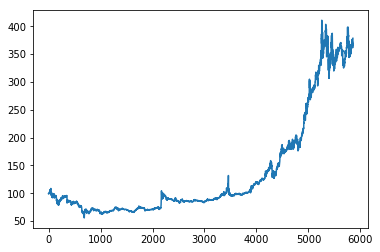

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(eiie.test_cumulative_returns)

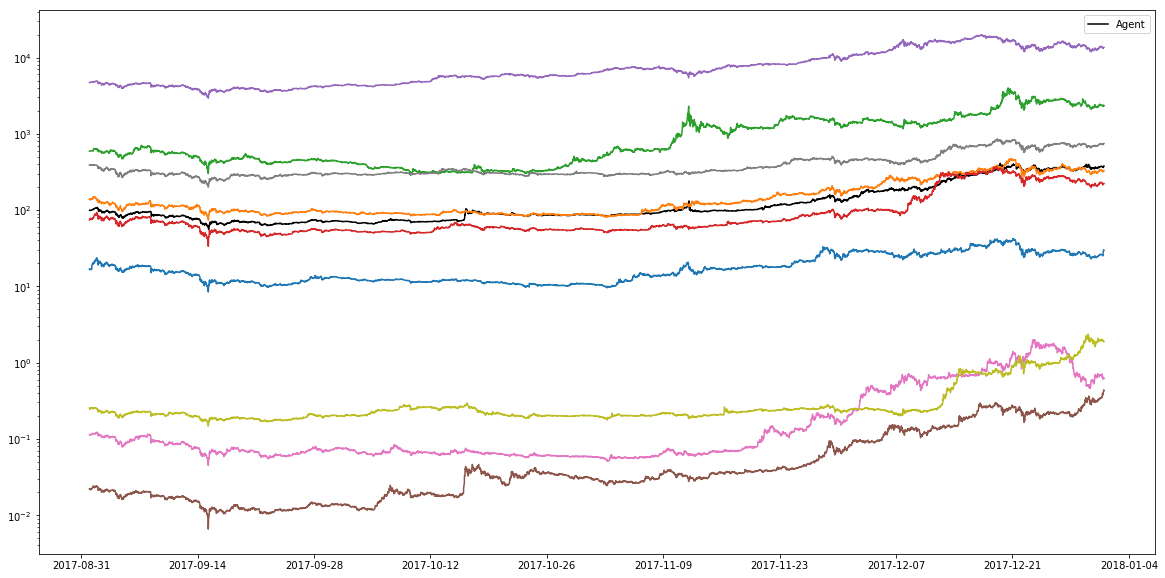

In [11]:
df_ = env.dfs['close']

test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-07-01 00:00:00'
# test_end = '2017-09-01 00:00:00'
# test_end = '2017-12-01 00:00:00'
# test_start = '2015-09-01 00:00:00'
# test_end = '2015-12-01 00:00:00'

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-11-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = pd.DataFrame(eiie.test_cumulative_returns, index=df_.index[1:])
agent_df = agent_df.loc[(agent_df.index >= test_start) & (agent_df.index <=  test_end)]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(9):
    ax.plot(pd.DataFrame(df.values[:, [i]], index=df.index))
ax.legend()
ax.set_yscale('log')
plt.savefig('2017-09-01 00:00:00-2018-01-01 00:00:00_test.png')

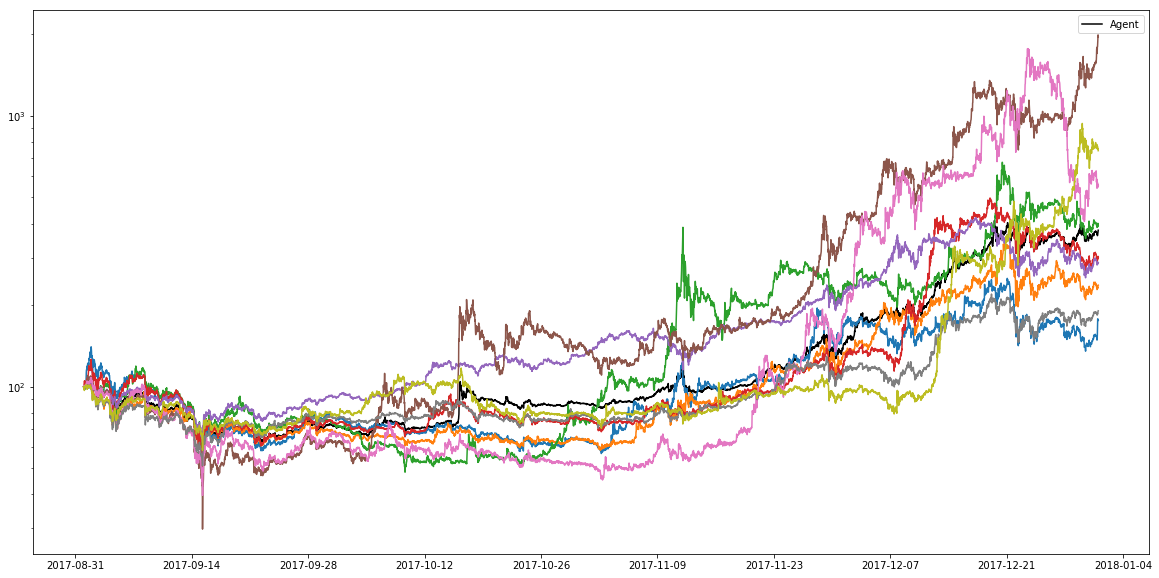

In [12]:
import numpy as np

df_ = env.dfs['close']

test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-07-01 00:00:00'
# test_end = '2017-08-01 00:00:00'
# test_end = '2017-12-01 00:00:00'

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-11-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = pd.DataFrame(eiie.test_cumulative_returns, index=df_.index[1:])
agent_df = agent_df.loc[(agent_df.index >= test_start) & (agent_df.index <=  test_end)]


df_val = df.values / df.values[0] * 100
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(9):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
ax.legend()
ax.set_yscale('log')
plt.savefig('2017-09-01 00:00:00-2018-01-01 00:00:00_test.png')

In [9]:
eiie.results['cumulative_returns'][-1]

162185.4188057186

In [3]:
x = tf.Variable([2, 3])

In [6]:
x.get_shape().as_list()

[2]

In [24]:
data['USDT_BCH'].keys()

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'quoteVolume',
       'weightedAverage'],
      dtype='object')

In [28]:
import numpy as np
np.mean([750.000001, 200.000000, 600.000000, 540.000000])
np.mean([200.000000, 600.000000, 540.000000])

446.66666666666669

In [29]:
436149.877928 / 994.980943

438.34998147095166

In [9]:
np.exp(0.1) - 1

0.10517091807564771